In [1]:
pip install Flask==1.1.1 # web framework 


  Using cached Flask-1.1.1-py2.py3-none-any.whl (94 kB)


In [3]:
pip install gunicorn==19.9.0 #A Web Server Gateway Interface (WSGI) server for UNIX

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#A'


In [4]:
pip install Jinja2==2.11.3

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install MarkupSafe==1.1.1

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install Werkzeug==0.15.5

  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.0.2
    Uninstalling Werkzeug-2.0.2:
      Successfully uninstalled Werkzeug-2.0.2
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install numpy>=1.9.2

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install scipy>=0.15.1

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install nltk==3.5

Using legacy 'setup.py install' for nltk, since package 'wheel' is not installed.
  Attempting uninstall: nltk
    Found existing installation: nltk 3.6.5
    Uninstalling nltk-3.6.5:
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'c:\\users\\abhin\\anaconda3\\scripts\\nltk.exe'
Consider using the `--user` option or check the permissions.



In [2]:
pip install -U scikit-learn>=0.18

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas>=0.19

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install beautifulsoup4==4.9.1

  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.10.0
    Uninstalling beautifulsoup4-4.10.0:
      Successfully uninstalled beautifulsoup4-4.10.0
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install jsonschema==3.2.0

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install tmdbv3api==1.6.1

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install lxml==4.6.3

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install urllib3==1.26.5

  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.7
    Uninstalling urllib3-1.26.7:
      Successfully uninstalled urllib3-1.26.7
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.


In [17]:
pip install requests==2.23.0

  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.5
    Uninstalling urllib3-1.26.5:
      Successfully uninstalled urllib3-1.26.5
  Attempting uninstall: idna
    Found existing installation: idna 3.2
    Uninstalling idna-3.2:
      Successfully uninstalled idna-3.2
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
    Uninstalling chardet-4.0.0:
      Successfully uninstalled chardet-4.0.0
  Attempting uninstall: requests
    Found existing installation: requests 2.26.0
    Uninstalling requests-2.26.0:
      Successfully uninstalled requests-2.26.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.


In [18]:
pip install pickleshare==0.7.5

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from flask import Flask, render_template, request
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import json
import bs4 as bs
import urllib.request
import pickle
import requests

# IMDB Movie Metadata

In [2]:
IMDB_data = pd.read_csv('IMDB_movie_metadata.csv')

In [3]:
IMDB_data.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
IMDB_data.shape

(5043, 28)

In [5]:
IMDB_data.tail(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
5034,Color,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,...,35.0,English,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,NaN,74
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0
5036,Color,Anthony Vallone,NaN,84.0,2.0,2.0,John Considine,45.0,NaN,Crime|Drama,...,1.0,English,USA,PG-13,3250.0,2005.0,44.0,7.8,NaN,4
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,...,14.0,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [6]:
IMDB_data['title_year'].max()

2016.0

In [7]:
IMDB_data['title_year'].min()

1916.0

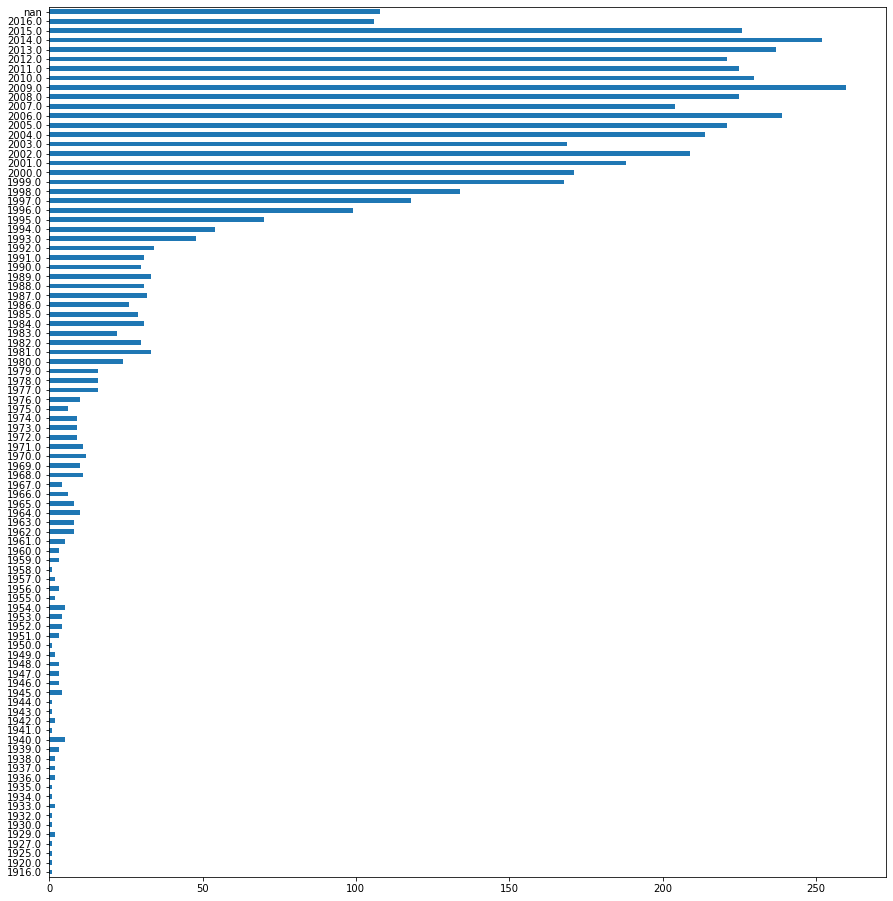

In [8]:
IMDB_data.title_year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))
plt.show()

In [9]:
IMDB_data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [10]:
# recommendation will be based on these features only
imdb_data = IMDB_data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]
imdb_data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy|Drama,Signed Sealed Delivered
5039,NaN,Natalie Zea,Valorie Curry,Sam Underwood,Crime|Drama|Mystery|Thriller,The Following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama|Horror|Thriller,A Plague So Pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy|Drama|Romance,Shanghai Calling


In [11]:
imdb_data['actor_1_name'] = imdb_data['actor_1_name'].replace(np.nan, 'unknown')
imdb_data['actor_2_name'] = imdb_data['actor_2_name'].replace(np.nan, 'unknown')
imdb_data['actor_3_name'] = imdb_data['actor_3_name'].replace(np.nan, 'unknown')
imdb_data['director_name'] = imdb_data['director_name'].replace(np.nan, 'unknown')
imdb_data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy|Drama,Signed Sealed Delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime|Drama|Mystery|Thriller,The Following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama|Horror|Thriller,A Plague So Pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy|Drama|Romance,Shanghai Calling


In [12]:
imdb_data['genres'] = imdb_data['genres'].str.replace('|', ' ')
imdb_data

C:\Users\abhin\AppData\Local\Temp/ipykernel_14616/3554411218.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  imdb_data['genres'] = imdb_data['genres'].str.replace('|', ' ')


,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,Signed Sealed Delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,The Following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,A Plague So Pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,Shanghai Calling


In [13]:
imdb_data['movie_title'] = imdb_data['movie_title'].str.lower()
imdb_data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,signed sealed delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,the following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,a plague so pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,shanghai calling


In [14]:
imdb_data['movie_title'][1]

"pirates of the caribbean: at world's end\xa0"

In [15]:
imdb_data['movie_title'] = imdb_data['movie_title'].apply(lambda x : x[:-1])

In [16]:
imdb_data['movie_title'][1]

"pirates of the caribbean: at world's end"

#### creating a imdb movies metadata 5000 rows and 6 columns csv file with required columns  
#### director_name,	actor_1_name,	actor_2_name,	actor_3_name,	genres,	movie_title

In [17]:
imdb_data.to_csv('dataimdb.csv',index=False)

In [18]:
#### Now we have the movies list till 2016 but we need to update the data till 2022 
#### we have imdb credits and imdb movies data where we get movies list of 2017 

#### we have Imdb credits (45000 rows x 3 coulmns) : cast, crew, id  
#### movies data with (45000 rows x 24 col) : adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime',  'spoken_languages', 'status', 'tagline', 'title', 'video',  'vote_average', 'vote_count'

In [19]:
IMDB_credits = pd.read_csv('IMDB_credits.csv')
IMDB_credits

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


In [20]:
IMDB_Movies = pd.read_csv('IMDB_movies_data.csv')
IMDB_Movies

C:\Users\abhin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [21]:
IMDB_credits.columns

Index(['cast', 'crew', 'id'], dtype='object')

In [22]:
IMDB_credits.shape

(45476, 3)

In [23]:
IMDB_Movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [24]:
IMDB_Movies.shape

(45466, 24)

### required columns : director_name	actor_1_name	actor_2_name	actor_3_name	genres	movie_title

In [25]:
IMDB_Movies['release_date'] = pd.to_datetime(IMDB_Movies['release_date'], errors='coerce')
IMDB_Movies['year'] = IMDB_Movies['release_date'].dt.year
IMDB_Movies['year'].value_counts().sort_index()

1874.0       1
1878.0       1
1883.0       1
1887.0       1
1888.0       2
          ... 
2015.0    1905
2016.0    1604
2017.0     532
2018.0       5
2020.0       1
Name: year, Length: 135, dtype: int64

In [26]:
new_IMDB_Movies = IMDB_Movies.loc[IMDB_Movies.year == 2017,['genres','id','title','year']]
new_IMDB_Movies

,genres,id,title,year
26560,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0
26561,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0
26565,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0
26566,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0
30536,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0
...,...,...,...,...
45398,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",468707,Thick Lashes of Lauri Mäntyvaara,2017.0
45417,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",461297,Cop and a Half: New Recruit,2017.0
45437,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",455661,In a Heartbeat,2017.0
45453,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",404604,Mom,2017.0


In [27]:
new_IMDB_Movies['id'] = new_IMDB_Movies['id'].astype(int)
new_IMDB_Movies

,genres,id,title,year
26560,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0
26561,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0
26565,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0
26566,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0
30536,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0
...,...,...,...,...
45398,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",468707,Thick Lashes of Lauri Mäntyvaara,2017.0
45417,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",461297,Cop and a Half: New Recruit,2017.0
45437,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",455661,In a Heartbeat,2017.0
45453,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",404604,Mom,2017.0


In [28]:
IMDB_movies_credits = pd.merge(new_IMDB_Movies, IMDB_credits , on='id')
IMDB_movies_credits 

,genres,id,title,year,cast,crew
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'de..."
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'de..."
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', '...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'de..."
3,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / St...","[{'credit_id': '59171547925141583c0315a6', 'de..."
4,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV',...","[{'credit_id': '5431de49c3a36825d300007e', 'de..."
...,...,...,...,...,...,...
526,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",468707,Thick Lashes of Lauri Mäntyvaara,2017.0,"[{'cast_id': 0, 'character': 'Satu', 'credit_i...","[{'credit_id': '597e22f69251415d7801c74a', 'de..."
527,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",461297,Cop and a Half: New Recruit,2017.0,"[{'cast_id': 0, 'character': 'Detective Simmon...","[{'credit_id': '593ba0c29251410593009be3', 'de..."
528,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",455661,In a Heartbeat,2017.0,[],"[{'credit_id': '5981a15c92514151e0011b51', 'de..."
529,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",404604,Mom,2017.0,"[{'cast_id': 1, 'character': 'Devki Sabarwal',...","[{'credit_id': '58ee55bbc3a3683df500bd0f', 'de..."


In [29]:
IMDB_movies_credits.shape

(531, 6)

In [30]:
pd.set_option('display.max_colwidth', 200)
IMDB_movies_credits

,genres,id,title,year,cast,crew
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': 14, 'name': 'Fantasy'}, {'id': 35, 'name': 'Comedy'}]",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Sparrow', 'credit_id': '52fe4c9cc3a36847f8236a53', 'gender': 2, 'id': 85, 'name': 'Johnny Depp', 'order': 0, 'profile_path': '/kbWValANhZI8rbWZXximXuMN4U...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'department': 'Production', 'gender': 2, 'id': 770, 'job': 'Producer', 'name': 'Jerry Bruckheimer', 'profile_path': '/lQu9eRzRX264j2LFQwvKC50wb9s.jpg'}, ..."
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 878, 'name': 'Science Fiction'}]",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Batman', 'credit_id': '535e68db0e0a264fe10065f5', 'gender': 2, 'id': 880, 'name': 'Ben Affleck', 'order': 0, 'profile_path': '/cPuPt6mYJ83DjvO3hbjNGug6F...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'department': 'Production', 'gender': 0, 'id': 282, 'job': 'Producer', 'name': 'Charles Roven', 'profile_path': '/4uJLoVstC1CBcArXFOe53N2fDr1.jpg'}, {'cr..."
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 878, 'name': 'Science Fiction'}]",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', 'credit_id': '545d46a80e0a261fb3004e81', 'gender': 2, 'id': 74568, 'name': 'Chris Hemsworth', 'order': 0, 'profile_path': '/tlkDiLn2G75Xr7m1ybK8QFzZBso...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'department': 'Writing', 'gender': 2, 'id': 105643, 'job': 'Storyboard', 'name': 'Jay Oliva', 'profile_path': '/y7EbnuoKFMvU7uZ4aD50jThyNoF.jpg'}, {'cred..."
3,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 35, 'name': 'Comedy'}, {'id': 878, 'name': 'Science Fiction'}]",283995,Guardians of the Galaxy Vol. 2,2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / Star-Lord', 'credit_id': '53dd76ba0e0a265a930008e7', 'gender': 2, 'id': 73457, 'name': 'Chris Pratt', 'order': 0, 'profile_path': '/n4DD1AYU7WEMNPLga1Tx...","[{'credit_id': '59171547925141583c0315a6', 'department': 'Sound', 'gender': 0, 'id': 1408316, 'job': 'ADR Supervisor', 'name': 'Lisa J. Levine', 'profile_path': None}, {'credit_id': '5917159192514..."
4,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}]",245842,The King's Daughter,2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV', 'credit_id': '5431dd580e0a265694002d09', 'gender': 2, 'id': 517, 'name': 'Pierce Brosnan', 'order': 1, 'profile_path': '/1JXL0zrA26JjdoX8sqf57fJRDVM....","[{'credit_id': '5431de49c3a36825d300007e', 'department': 'Directing', 'gender': 2, 'id': 129952, 'job': 'Director', 'name': 'Sean McNamara', 'profile_path': '/cJqKChoJhnyCdtkMCRo69fofxgD.jpg'}, {'..."
...,...,...,...,...,...,...
526,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",468707,Thick Lashes of Lauri Mäntyvaara,2017.0,"[{'cast_id': 0, 'character': 'Satu', 'credit_id': '597e2086c3a368544001b0b1', 'gender': 0, 'id': 1860857, 'name': 'Inka Haapamäki', 'order': 1, 'profile_path': None}, {'cast_id': 1, 'character': '...","[{'credit_id': '597e22f69251415d7801c74a', 'department': 'Directing', 'gender': 0, 'id': 1447791, 'job': 'Director', 'name': 'Hannaleena Hauru', 'profile_path': None}, {'credit_id': '597e2319c3a36..."
527,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}, {'id': 28, 'name': 'Action'}, {'id': 10751, 'name': 'Family'}]",461297,Cop and a Half: New Recruit,2017.0,"[{'cast_id': 0, 'character': 'Detective Simmons', 'credit_id': '593ba04e9251410593009b87', 'gender': 2, 'id': 38560, 'name': 'Lou Diamond Phillips', 'order': 0, 'profile_path': '/afXcQRss7rZ6Ocx7P...","[{'credit_id': '593ba0c29251410593009be3', 'department': 'Writing', 'gender': 0, 'id': 223007, 'job': 'Writer', 'name': 'Scott Bindley', 'profile_path': None}, {'credit_id': '593ba

In [31]:
import ast
IMDB_movies_credits['genres'] = IMDB_movies_credits['genres'].map(lambda x: ast.literal_eval(x))
IMDB_movies_credits['cast'] = IMDB_movies_credits['cast'].map(lambda x: ast.literal_eval(x))
IMDB_movies_credits['crew'] = IMDB_movies_credits['crew'].map(lambda x: ast.literal_eval(x))

In [32]:
def make_genresList(x):
    gen = []
    st = " "
    for i in x:
        if i.get('name') == 'Science Fiction':
            scifi = 'Sci-Fi'
            gen.append(scifi)
        else:
            gen.append(i.get('name'))
    if gen == []:
        return np.NaN
    else:
        return (st.join(gen))

In [33]:
IMDB_movies_credits['genres_list'] = IMDB_movies_credits['genres'].map(lambda x: make_genresList(x))

In [34]:
IMDB_movies_credits['genres_list']

0      Adventure Action Fantasy Comedy
1      Action Adventure Fantasy Sci-Fi
2      Action Adventure Fantasy Sci-Fi
3       Action Adventure Comedy Sci-Fi
4             Fantasy Action Adventure
                    ...               
526                     Romance Comedy
527         Crime Comedy Action Family
528    Family Animation Romance Comedy
529               Crime Drama Thriller
530                                NaN
Name: genres_list, Length: 531, dtype: object

In [35]:
def get_actor1(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == []:
        return np.NaN
    else:
        return (casts[0])

In [36]:
IMDB_movies_credits['actor_1_name'] = IMDB_movies_credits['cast'].map(lambda x: get_actor1(x))
IMDB_movies_credits['actor_1_name']

0               Johnny Depp
1               Ben Affleck
2           Chris Hemsworth
3               Chris Pratt
4            Pierce Brosnan
               ...         
526          Inka Haapamäki
527    Lou Diamond Phillips
528                     NaN
529          Sridevi Kapoor
530                     NaN
Name: actor_1_name, Length: 531, dtype: object

In [37]:
def get_actor2(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=1:
        return np.NaN
    else:
        return (casts[1])

In [38]:
IMDB_movies_credits['actor_2_name'] = IMDB_movies_credits['cast'].map(lambda x: get_actor2(x))
IMDB_movies_credits['actor_2_name']

0       Javier Bardem
1        Henry Cavill
2      Tom Hiddleston
3         Zoe Saldana
4        William Hurt
            ...      
526     Rosa Honkonen
527     Wallace Shawn
528               NaN
529         Sajal Ali
530               NaN
Name: actor_2_name, Length: 531, dtype: object

In [39]:
def get_actor3(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=2:
        return np.NaN
    else:
        return (casts[2])

In [40]:
IMDB_movies_credits['actor_3_name'] = IMDB_movies_credits['cast'].map(lambda x: get_actor3(x))
IMDB_movies_credits['actor_3_name']

0        Geoffrey Rush
1            Gal Gadot
2       Cate Blanchett
3        Dave Bautista
4      Benjamin Walker
            ...       
526     Tiitus Rantala
527        Gina Holden
528                NaN
529     Akshaye Khanna
530                NaN
Name: actor_3_name, Length: 531, dtype: object

In [41]:
def get_directors(x):
    dt = []
    st = " "
    for i in x:
        if i.get('job') == 'Director':
            dt.append(i.get('name'))
    if dt == []:
        return np.NaN
    else:
        return (st.join(dt))

In [42]:
IMDB_movies_credits['director_name'] = IMDB_movies_credits['crew'].map(lambda x: get_directors(x))

In [43]:
IMDB_movies_credits['director_name']

0      Joachim Rønning Espen Sandberg
1                         Zack Snyder
2                       Taika Waititi
3                          James Gunn
4                       Sean McNamara
                    ...              
526                  Hannaleena Hauru
527             Jonathan A. Rosenbaum
528          Beth David Esteban Bravo
529                      Ravi Udyawar
530                     Daisy Asquith
Name: director_name, Length: 531, dtype: object

In [44]:
IMDB_final_data = IMDB_movies_credits.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres_list','title']]
IMDB_final_data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres_list,title
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,Pirates of the Caribbean: Dead Men Tell No Tales
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,Justice League
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,Thor: Ragnarok
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,Guardians of the Galaxy Vol. 2
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,The King's Daughter
...,...,...,...,...,...,...
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,Thick Lashes of Lauri Mäntyvaara
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,Cop and a Half: New Recruit
528,Beth David Esteban Bravo,NaN,NaN,NaN,Family Animation Romance Comedy,In a Heartbeat
529,Ravi Udyawar,Sridevi Kapoor,Sajal Ali,Akshaye Khanna,Crime Drama Thriller,Mom


In [45]:
IMDB_final_data.isna().sum()

director_name     4
actor_1_name     22
actor_2_name     55
actor_3_name     70
genres_list       7
title             0
dtype: int64

In [46]:
IMDB_final_data = IMDB_final_data.dropna(how='any')

In [47]:
IMDB_final_data.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres_list      0
title            0
dtype: int64

In [48]:
IMDB_final_data = IMDB_final_data.rename(columns={'genres_list':'genres'})
IMDB_final_data = IMDB_final_data.rename(columns={'title':'movie_title'})

In [49]:
IMDB_final_data['movie_title'] = IMDB_final_data['movie_title'].str.lower()

In [50]:
IMDB_final_data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,pirates of the caribbean: dead men tell no tales
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,justice league
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,thor: ragnarok
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,guardians of the galaxy vol. 2
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,the king's daughter
...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit


In [51]:
IMDB_final_data['combine'] = IMDB_final_data['actor_1_name'] + ' ' + IMDB_final_data['actor_2_name'] + ' '+ IMDB_final_data['actor_3_name'] + ' '+ IMDB_final_data['director_name'] +' ' + IMDB_final_data['genres']

In [52]:
imdb_2 = IMDB_final_data
imdb_2 

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combine
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,pirates of the caribbean: dead men tell no tales,Johnny Depp Javier Bardem Geoffrey Rush Joachim Rønning Espen Sandberg Adventure Action Fantasy Comedy
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,justice league,Ben Affleck Henry Cavill Gal Gadot Zack Snyder Action Adventure Fantasy Sci-Fi
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,thor: ragnarok,Chris Hemsworth Tom Hiddleston Cate Blanchett Taika Waititi Action Adventure Fantasy Sci-Fi
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,guardians of the galaxy vol. 2,Chris Pratt Zoe Saldana Dave Bautista James Gunn Action Adventure Comedy Sci-Fi
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,the king's daughter,Pierce Brosnan William Hurt Benjamin Walker Sean McNamara Fantasy Action Adventure
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Comedy
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Crime Comedy Action Family


In [53]:
imdb_1 = pd.read_csv('dataimdb.csv')
imdb_1

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,signed sealed delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,the following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,a plague so pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,shanghai calling


In [54]:
imdb_1.shape

(5043, 6)

In [55]:
imdb_1['combine'] = imdb_1['actor_1_name'] + ' ' + imdb_1['actor_2_name'] + ' '+ imdb_1['actor_3_name'] + ' '+ imdb_1['director_name'] +' ' + imdb_1['genres']

In [56]:
imdb_1

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combine
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure Fantasy Sci-Fi
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventure Fantasy
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventure Thriller
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action Thriller
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,signed sealed delivered,Eric Mabius Daphne Zuniga Crystal Lowe Scott Smith Comedy Drama
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,the following,Natalie Zea Valorie Curry Sam Underwood unknown Crime Drama Mystery Thriller
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,a plague so pleasant,Eva Boehnke Maxwell Moody David Chandler Benjamin Roberds Drama Horror Thriller
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,shanghai calling,Alan Ruck Daniel Henney Eliza Coupe Daniel Hsia Comedy Drama Romance


In [57]:
final_IMDB_data = imdb_1.append(imdb_2)
final_IMDB_data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combine
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure Fantasy Sci-Fi
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventure Fantasy
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventure Thriller
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action Thriller
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Comedy
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Crime Comedy Action Family


In [58]:
final_IMDB_data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combine
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure Fantasy Sci-Fi
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventure Fantasy
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventure Thriller
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action Thriller
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Comedy
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Crime Comedy Action Family


In [59]:
final_IMDB_data.drop_duplicates(subset ="movie_title", keep = 'last', inplace = True)
final_IMDB_data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combine
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure Fantasy Sci-Fi
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventure Fantasy
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventure Thriller
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action Thriller
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Comedy
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Crime Comedy Action Family


##### final movie data is till 2017  American Films 

In [60]:
final_IMDB_data.to_csv('final_IMDB_data.csv',index=False)
final_IMDB_data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combine
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure Fantasy Sci-Fi
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventure Fantasy
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventure Thriller
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action Thriller
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Comedy
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Crime Comedy Action Family


In [61]:
final_IMDB_data.shape

(5364, 7)

In [62]:
rs1 = final_IMDB_data.copy()
rs1

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combine
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure Fantasy Sci-Fi
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventure Fantasy
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventure Thriller
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action Thriller
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Comedy
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Crime Comedy Action Family


## Create an account : https://www.themoviedb.org/
#### API KEY = 8837221305a6fd8fa52b57b78b84ff4f
#### https://api.themoviedb.org/3/movie/550?api_key=8837221305a6fd8fa52b57b78b84ff4f


## Extracting the movie list from wiki 

## American Movie List 2018 - 2022

##### 2018  movie list : https://en.wikipedia.org/wiki/List_of_American_films_of_2018
##### 2019  movie list : https://en.wikipedia.org/wiki/List_of_American_films_of_2019
##### 2021  movie list : https://en.wikipedia.org/wiki/List_of_American_films_of_2020
##### 2021  movie list : https://en.wikipedia.org/wiki/List_of_American_films_of_2021
##### 2022  movie list : https://en.wikipedia.org/wiki/List_of_American_films_of_2022

## Hindi Movie List 2018 - 2022

##### https://en.wikipedia.org/wiki/List_of_Hindi_films_of_2018
##### https://en.wikipedia.org/wiki/List_of_Hindi_films_of_2019
##### https://en.wikipedia.org/wiki/List_of_Hindi_films_of_2020
##### https://en.wikipedia.org/wiki/List_of_Hindi_films_of_2021
##### https://en.wikipedia.org/wiki/List_of_Hindi_films_of_2022


## Telugu Movie List 2018 - 2022

##### https://en.wikipedia.org/wiki/List_of_Telugu_films_of_2018
##### https://en.wikipedia.org/wiki/List_of_Telugu_films_of_2019
##### https://en.wikipedia.org/wiki/List_of_Telugu_films_of_2020
##### https://en.wikipedia.org/wiki/List_of_Telugu_films_of_2021
##### https://en.wikipedia.org/wiki/List_of_Telugu_films_of_2022
##### https://en.wikipedia.org/wiki/List_of_Telugu_films_of_2023

## Extracting American Movies 2018 to 2022

# 2018

In [63]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2018"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [64]:
df_2018 = df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)
df_2018

,Opening,Opening.1,Title,Production company,Cast and crew,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.
0,JANUARY,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / Stage 6 Films,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus Sampson, Leigh Whannell, Spencer Locke, Caitlin Gerard, Kirk Acevedo, Bruce Davison",[2],NaN
1,JANUARY,5,The Strange Ones,Vertical Entertainment,"Lauren Wolkstein (director); Christopher Radcliff (co-director/screenplay); Alex Pettyfer, James Freedson-Jackson, Emily Althaus, Gene Jones, Owen Campbell, Tobias Campbell",[3],NaN
2,JANUARY,5,Stratton,Momentum Pictures,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); Dominic Cooper, Austin Stowell, Gemma Chan, Thomas Kretschmann, Tyler Hoechlin, Tom Felton",[4],NaN
3,JANUARY,10,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay); Bryan Brown, Sam Neill",[5],NaN
4,JANUARY,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screenplay); Liam Neeson, Vera Farmiga, Patrick Wilson, Jonathan Banks, Elizabeth McGovern, Sam Neill",[6],NaN
...,...,...,...,...,...,...,...
267,DECEMBER,25,Holmes & Watson,Columbia Pictures / Gary Sanchez Productions,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca Hall, Ralph Fiennes, Rob Brydon, Kelly Macdonald, Steve Coogan, Lauren Lapkus, Pam Ferris, Hugh Laurie",NaN,[164]
268,DECEMBER,25,Vice,Annapurna Pictures / Plan B Entertainment,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Carell, Sam Rockwell, Tyler Perry, Alison Pill, Lily Rabe, Jesse Plemons",NaN,[137]
269,DECEMBER,25,On the Basis of Sex,Focus Features,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, Armie Hammer, Justin Theroux, Jack Reynor, Cailee Spaeny, Sam Waterston, Kathy Bates",NaN,[228]
270,DECEMBER,25,Destroyer,Annapurna Pictures,"Karyn Kusama (director); Phil Hay, Matt Manfredi (screenplay); Nicole Kidman, Sebastian Stan, Toby Kebbell, Tatiana Maslany, Bradley Whitford, Jade Pettyjohn, Scoot McNairy",NaN,[260]


In [65]:
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = '8837221305a6fd8fa52b57b78b84ff4f'

In [66]:
from tmdbv3api import Movie
tmdb_movie = Movie()
def get_genre(x):
    genres = []
    result = tmdb_movie.search(x)
    movie_id = result[0].id
    response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
    data_json = response.json()
    if data_json['genres']:
        genre_str = " " 
        for i in range(0,len(data_json['genres'])):
            genres.append(data_json['genres'][i]['name'])
        return genre_str.join(genres)
    else:
        np.NaN

In [67]:
df_2018['genres'] = df_2018['Title'].map(lambda x: get_genre(str(x)))
df_2018

,Opening,Opening.1,Title,Production company,Cast and crew,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.,genres
0,JANUARY,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / Stage 6 Films,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus Sampson, Leigh Whannell, Spencer Locke, Caitlin Gerard, Kirk Acevedo, Bruce Davison",[2],NaN,Horror Mystery Thriller
1,JANUARY,5,The Strange Ones,Vertical Entertainment,"Lauren Wolkstein (director); Christopher Radcliff (co-director/screenplay); Alex Pettyfer, James Freedson-Jackson, Emily Althaus, Gene Jones, Owen Campbell, Tobias Campbell",[3],NaN,Thriller Drama
2,JANUARY,5,Stratton,Momentum Pictures,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); Dominic Cooper, Austin Stowell, Gemma Chan, Thomas Kretschmann, Tyler Hoechlin, Tom Felton",[4],NaN,Action Thriller
3,JANUARY,10,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay); Bryan Brown, Sam Neill",[5],NaN,Drama History Western
4,JANUARY,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screenplay); Liam Neeson, Vera Farmiga, Patrick Wilson, Jonathan Banks, Elizabeth McGovern, Sam Neill",[6],NaN,Action Thriller Mystery
...,...,...,...,...,...,...,...,...
267,DECEMBER,25,Holmes & Watson,Columbia Pictures / Gary Sanchez Productions,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca Hall, Ralph Fiennes, Rob Brydon, Kelly Macdonald, Steve Coogan, Lauren Lapkus, Pam Ferris, Hugh Laurie",NaN,[164],Mystery Adventure Comedy Crime
268,DECEMBER,25,Vice,Annapurna Pictures / Plan B Entertainment,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Carell, Sam Rockwell, Tyler Perry, Alison Pill, Lily Rabe, Jesse Plemons",NaN,[137],Thriller Science Fiction Action Adventure
269,DECEMBER,25,On the Basis of Sex,Focus Features,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, Armie Hammer, Justin Theroux, Jack Reynor, Cailee Spaeny, Sam Waterston, Kathy Bates",NaN,[228],Drama History
270,DECEMBER,25,Destroyer,Annapurna Pictures,"Karyn Kusama (director); Phil Hay, Matt Manfredi (screenplay); Nicole Kidman, Sebastian Stan, Toby Kebbell, Tatiana Maslany, Bradley Whitford, Jade Pettyjohn, Scoot McNairy",NaN,[260],Thriller Crime Drama Action


In [68]:
df_2018 = df_2018[['Title','Cast and crew','genres']]
df_2018

,Title,Cast and crew,genres
0,Insidious: The Last Key,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus Sampson, Leigh Whannell, Spencer Locke, Caitlin Gerard, Kirk Acevedo, Bruce Davison",Horror Mystery Thriller
1,The Strange Ones,"Lauren Wolkstein (director); Christopher Radcliff (co-director/screenplay); Alex Pettyfer, James Freedson-Jackson, Emily Althaus, Gene Jones, Owen Campbell, Tobias Campbell",Thriller Drama
2,Stratton,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); Dominic Cooper, Austin Stowell, Gemma Chan, Thomas Kretschmann, Tyler Hoechlin, Tom Felton",Action Thriller
3,Sweet Country,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay); Bryan Brown, Sam Neill",Drama History Western
4,The Commuter,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screenplay); Liam Neeson, Vera Farmiga, Patrick Wilson, Jonathan Banks, Elizabeth McGovern, Sam Neill",Action Thriller Mystery
...,...,...,...
267,Holmes & Watson,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca Hall, Ralph Fiennes, Rob Brydon, Kelly Macdonald, Steve Coogan, Lauren Lapkus, Pam Ferris, Hugh Laurie",Mystery Adventure Comedy Crime
268,Vice,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Carell, Sam Rockwell, Tyler Perry, Alison Pill, Lily Rabe, Jesse Plemons",Thriller Science Fiction Action Adventure
269,On the Basis of Sex,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, Armie Hammer, Justin Theroux, Jack Reynor, Cailee Spaeny, Sam Waterston, Kathy Bates",Drama History
270,Destroyer,"Karyn Kusama (director); Phil Hay, Matt Manfredi (screenplay); Nicole Kidman, Sebastian Stan, Toby Kebbell, Tatiana Maslany, Bradley Whitford, Jade Pettyjohn, Scoot McNairy",Thriller Crime Drama Action


In [69]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [70]:
df_2018['director_name'] = df_2018['Cast and crew'].map(lambda x: get_director(x))


C:\Users\abhin\AppData\Local\Temp/ipykernel_14616/1424833719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['director_name'] = df_2018['Cast and crew'].map(lambda x: get_director(x))


In [71]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [72]:
df_2018['actor_1_name'] = df_2018['Cast and crew'].map(lambda x: get_actor1(x))

C:\Users\abhin\AppData\Local\Temp/ipykernel_14616/2274966287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['actor_1_name'] = df_2018['Cast and crew'].map(lambda x: get_actor1(x))


In [73]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [74]:
df_2018['actor_2_name'] = df_2018['Cast and crew'].map(lambda x: get_actor2(x))

C:\Users\abhin\AppData\Local\Temp/ipykernel_14616/3672495884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['actor_2_name'] = df_2018['Cast and crew'].map(lambda x: get_actor2(x))


In [75]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [76]:
df_2018['actor_3_name'] = df_2018['Cast and crew'].map(lambda x: get_actor3(x))

C:\Users\abhin\AppData\Local\Temp/ipykernel_14616/2517195254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['actor_3_name'] = df_2018['Cast and crew'].map(lambda x: get_actor3(x))


In [77]:
df_2018

,Title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,Insidious: The Last Key,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus Sampson, Leigh Whannell, Spencer Locke, Caitlin Gerard, Kirk Acevedo, Bruce Davison",Horror Mystery Thriller,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell
1,The Strange Ones,"Lauren Wolkstein (director); Christopher Radcliff (co-director/screenplay); Alex Pettyfer, James Freedson-Jackson, Emily Althaus, Gene Jones, Owen Campbell, Tobias Campbell",Thriller Drama,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus
2,Stratton,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); Dominic Cooper, Austin Stowell, Gemma Chan, Thomas Kretschmann, Tyler Hoechlin, Tom Felton",Action Thriller,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan
3,Sweet Country,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay); Bryan Brown, Sam Neill",Drama History Western,Warwick Thornton,Bryan Brown,Sam Neill,NaN
4,The Commuter,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screenplay); Liam Neeson, Vera Farmiga, Patrick Wilson, Jonathan Banks, Elizabeth McGovern, Sam Neill",Action Thriller Mystery,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson
...,...,...,...,...,...,...,...
267,Holmes & Watson,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca Hall, Ralph Fiennes, Rob Brydon, Kelly Macdonald, Steve Coogan, Lauren Lapkus, Pam Ferris, Hugh Laurie",Mystery Adventure Comedy Crime,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall
268,Vice,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Carell, Sam Rockwell, Tyler Perry, Alison Pill, Lily Rabe, Jesse Plemons",Thriller Science Fiction Action Adventure,Adam McKay,Christian Bale,Amy Adams,Steve Carell
269,On the Basis of Sex,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, Armie Hammer, Justin Theroux, Jack Reynor, Cailee Spaeny, Sam Waterston, Kathy Bates",Drama History,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux
270,Destroyer,"Karyn Kusama (director); Phil Hay, Matt Manfredi (screenplay); Nicole Kidman, Sebastian Stan, Toby Kebbell, Tatiana Maslany, Bradley Whitford, Jade Pettyjohn, Scoot McNairy",Thriller Crime Drama Action,Karyn Kusama,Nicole Kidman,Sebastian Stan,Toby Kebbell


In [78]:
df_2018 = df_2018.rename(columns={'Title':'movie_title'})

In [79]:
df18 = df_2018.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]
df18

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Mystery Thriller,Insidious: The Last Key
1,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Thriller Drama,The Strange Ones
2,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan,Action Thriller,Stratton
3,Warwick Thornton,Bryan Brown,Sam Neill,NaN,Drama History Western,Sweet Country
4,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller Mystery,The Commuter
...,...,...,...,...,...,...
267,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall,Mystery Adventure Comedy Crime,Holmes & Watson
268,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Thriller Science Fiction Action Adventure,Vice
269,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux,Drama History,On the Basis of Sex
270,Karyn Kusama,Nicole Kidman,Sebastian Stan,Toby Kebbell,Thriller Crime Drama Action,Destroyer


In [80]:
df18['actor_2_name'] = df18['actor_2_name'].replace(np.nan, 'unknown')
df18['actor_3_name'] = df18['actor_3_name'].replace(np.nan, 'unknown')

In [81]:
df18['movie_title'] = df18['movie_title'].str.lower()

In [82]:
df18['combine'] = df18['actor_1_name'] + ' ' + df18['actor_2_name'] + ' '+ df18['actor_3_name'] + ' '+ df18['director_name'] +' ' + df18['genres']

In [83]:
df18

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combine
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Mystery Thriller,insidious: the last key,Lin Shaye Angus Sampson Leigh Whannell Adam Robitel Horror Mystery Thriller
1,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Thriller Drama,the strange ones,Alex Pettyfer James Freedson-Jackson Emily Althaus Lauren Wolkstein Thriller Drama
2,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan,Action Thriller,stratton,Dominic Cooper Austin Stowell Gemma Chan Simon West Action Thriller
3,Warwick Thornton,Bryan Brown,Sam Neill,unknown,Drama History Western,sweet country,Bryan Brown Sam Neill unknown Warwick Thornton Drama History Western
4,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller Mystery,the commuter,Liam Neeson Vera Farmiga Patrick Wilson Jaume Collet-Serra Action Thriller Mystery
...,...,...,...,...,...,...,...
267,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall,Mystery Adventure Comedy Crime,holmes & watson,Will Ferrell John C. Reilly Rebecca Hall Etan Cohen Mystery Adventure Comedy Crime
268,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Thriller Science Fiction Action Adventure,vice,Christian Bale Amy Adams Steve Carell Adam McKay Thriller Science Fiction Action Adventure
269,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux,Drama History,on the basis of sex,Felicity Jones Armie Hammer Justin Theroux Mimi Leder Drama History
270,Karyn Kusama,Nicole Kidman,Sebastian Stan,Toby Kebbell,Thriller Crime Drama Action,destroyer,Nicole Kidman Sebastian Stan Toby Kebbell Karyn Kusama Thriller Crime Drama Action


In [84]:
rs2 = rs1.append(df18) 
rs2

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combine
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure Fantasy Sci-Fi
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventure Fantasy
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventure Thriller
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action Thriller
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
267,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall,Mystery Adventure Comedy Crime,holmes & watson,Will Ferrell John C. Reilly Rebecca Hall Etan Cohen Mystery Adventure Comedy Crime
268,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Thriller Science Fiction Action Adventure,vice,Christian Bale Amy Adams Steve Carell Adam McKay Thriller Science Fiction Action Adventure
269,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux,Drama History,on the basis of sex,Felicity Jones Armie Hammer Justin Theroux Mimi Leder Drama History
270,Karyn Kusama,Nicole Kidman,Sebastian Stan,Toby Kebbell,Thriller Crime Drama Action,destroyer,Nicole Kidman Sebastian Stan Toby Kebbell Karyn Kusama Thriller Crime Drama Action


## 2019

In [85]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2019"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [86]:
df_2019 = df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)
df_2019

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,JANUARY,4,Escape Room,Columbia Pictures / Original Film,"Adam Robitel (director); Bragi F. Schut, Maria Melnik (screenplay); Taylor Russell, Logan Miller, Deborah Ann Woll, Tyler Labine, Jay Ellis, Nik Dodani, Yorick van Wageningen",[2]
1,JANUARY,4,Rust Creek,IFC Films,"Jen McGowan (director); Julie Lipson (screenplay); Hermione Corfield, Jay Paulson, Sean O'Bryan, Micah Hauptman",[3]
2,JANUARY,4,American Hangman,Hangman Justice Productions,"Wilson Coneybeare (director/screenplay); Donald Sutherland, Vincent Kartheiser, Oliver Dennis, Paul Braunstein",[4]
3,JANUARY,11,A Dog's Way Home,Columbia Pictures,"Charles Martin Smith (director); W. Bruce Cameron (screenplay); Bryce Dallas Howard, Edward James Olmos, Alexandra Shipp, Ashley Judd, Jonah Haur-King, Wes Studi",[5]
4,JANUARY,11,The Upside,STX Entertainment,"Neil Burger (director); Jon Hartmere (screenplay); Bryan Cranston, Kevin Hart, Nicole Kidman",[6]
...,...,...,...,...,...,...
237,DECEMBER,25,Spies in Disguise,20th Century Fox / Blue Sky Studios / Chernin Entertainment,"Nick Bruno, Troy Quane (directors); Brad Copeland (screenplay); Will Smith, Tom Holland, Rashida Jones, Ben Mendelsohn, Reba McEntire, Rachel Brosnahan, Karen Gillan, DJ Khaled, Masi Oka",[132]
238,DECEMBER,25,Little Women,Columbia Pictures / Regency Enterprises,"Greta Gerwig (director/screenplay); Saoirse Ronan, Emma Watson, Florence Pugh, Eliza Scanlen, Laura Dern, Timothée Chalamet, Meryl Streep, Tracy Letts, Bob Odenkirk, James Norton, Louis Garrel, Ch...",[221]
239,DECEMBER,25,1917,Universal Pictures / DreamWorks Pictures,"Sam Mendes (director/screenplay); Krysty Wilson-Cairns (screenplay); George MacKay, Dean-Charles Chapman, Mark Strong, Andrew Scott, Richard Madden, Claire Duburcq, Colin Firth, Benedict Cumberbatch",[222]
240,DECEMBER,25,Just Mercy,Warner Bros. Pictures / Participant Media,"Destin Daniel Cretton (director/screenplay), Andrew Lanham (screenplay); Michael B. Jordan, Jamie Foxx, Brie Larson, Rob Morgan, Tim Blake Nelson, Rafe Spall, O'Shea Jackson Jr., C.J. LeBlanc",[223]


In [87]:
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = '8837221305a6fd8fa52b57b78b84ff4f'

In [88]:
from tmdbv3api import Movie
tmdb_movie = Movie()
def get_genre(x):
    genres = []
    result = tmdb_movie.search(x)
    movie_id = result[0].id
    response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
    data_json = response.json()
    if data_json['genres']:
        genre_str = " " 
        for i in range(0,len(data_json['genres'])):
            genres.append(data_json['genres'][i]['name'])
        return genre_str.join(genres)
    else:
        np.NaN

In [89]:
df_2019['genres'] = df_2019['Title'].map(lambda x: get_genre(str(x)))
df_2019

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.,genres
0,JANUARY,4,Escape Room,Columbia Pictures / Original Film,"Adam Robitel (director); Bragi F. Schut, Maria Melnik (screenplay); Taylor Russell, Logan Miller, Deborah Ann Woll, Tyler Labine, Jay Ellis, Nik Dodani, Yorick van Wageningen",[2],Horror Thriller Mystery
1,JANUARY,4,Rust Creek,IFC Films,"Jen McGowan (director); Julie Lipson (screenplay); Hermione Corfield, Jay Paulson, Sean O'Bryan, Micah Hauptman",[3],Thriller Drama
2,JANUARY,4,American Hangman,Hangman Justice Productions,"Wilson Coneybeare (director/screenplay); Donald Sutherland, Vincent Kartheiser, Oliver Dennis, Paul Braunstein",[4],Thriller
3,JANUARY,11,A Dog's Way Home,Columbia Pictures,"Charles Martin Smith (director); W. Bruce Cameron (screenplay); Bryce Dallas Howard, Edward James Olmos, Alexandra Shipp, Ashley Judd, Jonah Haur-King, Wes Studi",[5],Drama Adventure Family
4,JANUARY,11,The Upside,STX Entertainment,"Neil Burger (director); Jon Hartmere (screenplay); Bryan Cranston, Kevin Hart, Nicole Kidman",[6],Comedy Drama
...,...,...,...,...,...,...,...
237,DECEMBER,25,Spies in Disguise,20th Century Fox / Blue Sky Studios / Chernin Entertainment,"Nick Bruno, Troy Quane (directors); Brad Copeland (screenplay); Will Smith, Tom Holland, Rashida Jones, Ben Mendelsohn, Reba McEntire, Rachel Brosnahan, Karen Gillan, DJ Khaled, Masi Oka",[132],Animation Action Adventure Comedy Family
238,DECEMBER,25,Little Women,Columbia Pictures / Regency Enterprises,"Greta Gerwig (director/screenplay); Saoirse Ronan, Emma Watson, Florence Pugh, Eliza Scanlen, Laura Dern, Timothée Chalamet, Meryl Streep, Tracy Letts, Bob Odenkirk, James Norton, Louis Garrel, Ch...",[221],Drama Romance
239,DECEMBER,25,1917,Universal Pictures / DreamWorks Pictures,"Sam Mendes (director/screenplay); Krysty Wilson-Cairns (screenplay); George MacKay, Dean-Charles Chapman, Mark Strong, Andrew Scott, Richard Madden, Claire Duburcq, Colin Firth, Benedict Cumberbatch",[222],War Drama Action Thriller
240,DECEMBER,25,Just Mercy,Warner Bros. Pictures / Participant Media,"Destin Daniel Cretton (director/screenplay), Andrew Lanham (screenplay); Michael B. Jordan, Jamie Foxx, Brie Larson, Rob Morgan, Tim Blake Nelson, Rafe Spall, O'Shea Jackson Jr., C.J. LeBlanc",[223],Drama Crime History


In [90]:
df_2019 = df_2019[['Title','Cast and crew','genres']]
df_2019

,Title,Cast and crew,genres
0,Escape Room,"Adam Robitel (director); Bragi F. Schut, Maria Melnik (screenplay); Taylor Russell, Logan Miller, Deborah Ann Woll, Tyler Labine, Jay Ellis, Nik Dodani, Yorick van Wageningen",Horror Thriller Mystery
1,Rust Creek,"Jen McGowan (director); Julie Lipson (screenplay); Hermione Corfield, Jay Paulson, Sean O'Bryan, Micah Hauptman",Thriller Drama
2,American Hangman,"Wilson Coneybeare (director/screenplay); Donald Sutherland, Vincent Kartheiser, Oliver Dennis, Paul Braunstein",Thriller
3,A Dog's Way Home,"Charles Martin Smith (director); W. Bruce Cameron (screenplay); Bryce Dallas Howard, Edward James Olmos, Alexandra Shipp, Ashley Judd, Jonah Haur-King, Wes Studi",Drama Adventure Family
4,The Upside,"Neil Burger (director); Jon Hartmere (screenplay); Bryan Cranston, Kevin Hart, Nicole Kidman",Comedy Drama
...,...,...,...
237,Spies in Disguise,"Nick Bruno, Troy Quane (directors); Brad Copeland (screenplay); Will Smith, Tom Holland, Rashida Jones, Ben Mendelsohn, Reba McEntire, Rachel Brosnahan, Karen Gillan, DJ Khaled, Masi Oka",Animation Action Adventure Comedy Family
238,Little Women,"Greta Gerwig (director/screenplay); Saoirse Ronan, Emma Watson, Florence Pugh, Eliza Scanlen, Laura Dern, Timothée Chalamet, Meryl Streep, Tracy Letts, Bob Odenkirk, James Norton, Louis Garrel, Ch...",Drama Romance
239,1917,"Sam Mendes (director/screenplay); Krysty Wilson-Cairns (screenplay); George MacKay, Dean-Charles Chapman, Mark Strong, Andrew Scott, Richard Madden, Claire Duburcq, Colin Firth, Benedict Cumberbatch",War Drama Action Thriller
240,Just Mercy,"Destin Daniel Cretton (director/screenplay), Andrew Lanham (screenplay); Michael B. Jordan, Jamie Foxx, Brie Larson, Rob Morgan, Tim Blake Nelson, Rafe Spall, O'Shea Jackson Jr., C.J. LeBlanc",Drama Crime History


In [91]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [92]:
df_2019['director_name'] = df_2019['Cast and crew'].map(lambda x: get_director(x))

C:\Users\abhin\AppData\Local\Temp/ipykernel_14616/2296556331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['director_name'] = df_2019['Cast and crew'].map(lambda x: get_director(x))


In [93]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [94]:
df_2019['actor_1_name'] = df_2019['Cast and crew'].map(lambda x: get_actor1(x))

C:\Users\abhin\AppData\Local\Temp/ipykernel_14616/1562076556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['actor_1_name'] = df_2019['Cast and crew'].map(lambda x: get_actor1(x))


In [95]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [96]:
df_2019['actor_2_name'] = df_2019['Cast and crew'].map(lambda x: get_actor2(x))

C:\Users\abhin\AppData\Local\Temp/ipykernel_14616/3736213850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['actor_2_name'] = df_2019['Cast and crew'].map(lambda x: get_actor2(x))


In [97]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [98]:
df_2019['actor_3_name'] = df_2019['Cast and crew'].map(lambda x: get_actor3(x))

In [99]:
df_2019 = df_2019.rename(columns={'Title':'movie_title'})

In [100]:
df19 = df_2019.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [101]:
df19['actor_2_name'] = df19['actor_2_name'].replace(np.nan, 'unknown')
df19['actor_3_name'] = df19['actor_3_name'].replace(np.nan, 'unknown')

In [102]:
df19['movie_title'] = df19['movie_title'].str.lower()

In [103]:
df19['combine'] = df19['actor_1_name'] + ' ' + df19['actor_2_name'] + ' '+ df19['actor_3_name'] + ' '+ df19['director_name'] +' ' + df19['genres']

In [104]:
df19

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combine
0,Adam Robitel,Taylor Russell,Logan Miller,Deborah Ann Woll,Horror Thriller Mystery,escape room,Taylor Russell Logan Miller Deborah Ann Woll Adam Robitel Horror Thriller Mystery
1,Jen McGowan,Hermione Corfield,Jay Paulson,Sean O'Bryan,Thriller Drama,rust creek,Hermione Corfield Jay Paulson Sean O'Bryan Jen McGowan Thriller Drama
2,Wilson Coneybeare,Donald Sutherland,Vincent Kartheiser,Oliver Dennis,Thriller,american hangman,Donald Sutherland Vincent Kartheiser Oliver Dennis Wilson Coneybeare Thriller
3,Charles Martin Smith,Bryce Dallas Howard,Edward James Olmos,Alexandra Shipp,Drama Adventure Family,a dog's way home,Bryce Dallas Howard Edward James Olmos Alexandra Shipp Charles Martin Smith Drama Adventure Family
4,Neil Burger,Bryan Cranston,Kevin Hart,Nicole Kidman,Comedy Drama,the upside,Bryan Cranston Kevin Hart Nicole Kidman Neil Burger Comedy Drama
...,...,...,...,...,...,...,...
237,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,Animation Action Adventure Comedy Family,spies in disguise,"Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Animation Action Adventure Comedy Family"
238,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Romance,little women,Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama Romance
239,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,War Drama Action Thriller,1917,George MacKay Dean-Charles Chapman Mark Strong Sam Mendes War Drama Action Thriller
240,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime History,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama Crime History


In [105]:
rs3 = rs2.append(df19)
rs3

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combine
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure Fantasy Sci-Fi
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventure Fantasy
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventure Thriller
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action Thriller
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
237,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,Animation Action Adventure Comedy Family,spies in disguise,"Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Animation Action Adventure Comedy Family"
238,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Romance,little women,Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama Romance
239,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,War Drama Action Thriller,1917,George MacKay Dean-Charles Chapman Mark Strong Sam Mendes War Drama Action Thriller
240,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime History,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama Crime History


# 2020

In [106]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2020"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [107]:
df_2020 = df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)
df_2020

,Opening,Opening.1,Title,Production company,Cast and crew,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.
0,JANUARY,3,The Grudge,Screen Gems / Stage 6 Films / Ghost House Pictures,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir, John Cho, Betty Gilpin, Lin Shaye, Jacki Weaver",[2],NaN
1,JANUARY,10,Underwater,20th Century Fox / TSG Entertainment / Chernin Entertainment,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kristen Stewart, Vincent Cassel, Jessica Henwick, John Gallagher Jr., Mamoudou Athie, T.J. Miller",[3],NaN
2,JANUARY,10,Like a Boss,Paramount Pictures,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tiffany Haddish, Rose Byrne, Salma Hayek, Jennifer Coolidge, Billy Porter",[4],NaN
3,JANUARY,10,Three Christs,IFC Films,"Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Gere, Peter Dinklage, Walton Goggins, Bradley Whitford",NaN,NaN
4,JANUARY,10,Inherit the Viper,Barry Films / Tycor International Film Company,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett, Margarita Levieva, Chandler Riggs, Bruce Dern, Owen Teague",[5],NaN
...,...,...,...,...,...,...,...
269,DECEMBER,25,We Can Be Heroes,Netflix / Troublemaker Studios,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pascal, YaYa Gosselin, Boyd Holbrook, Adriana Barraza, Haley Reinhart, Sung Kang, Taylor Dooley, Christian Slater",NaN,[241]
270,DECEMBER,25,News of the World,Universal Pictures / Perfect World Pictures,"Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Hanks, Helena Zengel",NaN,[242]
271,DECEMBER,25,One Night in Miami...,Amazon Studios,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, Eli Goree, Aldis Hodge, Leslie Odom Jr., Lance Reddick, Joaquina Kalukango, Nicolette Robinson, Beau Bridges, Lance Reddick",NaN,[243]
272,DECEMBER,25,Promising Young Woman,Focus Features / FilmNation Entertainment,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alison Brie, Clancy Brown, Jennifer Coolidge, Laverne Cox, Connie Britton",NaN,[244]


In [108]:
df_2020 = df_2020[['Title','Cast and crew']]
df_2020

,Title,Cast and crew
0,The Grudge,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir, John Cho, Betty Gilpin, Lin Shaye, Jacki Weaver"
1,Underwater,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kristen Stewart, Vincent Cassel, Jessica Henwick, John Gallagher Jr., Mamoudou Athie, T.J. Miller"
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tiffany Haddish, Rose Byrne, Salma Hayek, Jennifer Coolidge, Billy Porter"
3,Three Christs,"Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Gere, Peter Dinklage, Walton Goggins, Bradley Whitford"
4,Inherit the Viper,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett, Margarita Levieva, Chandler Riggs, Bruce Dern, Owen Teague"
...,...,...
269,We Can Be Heroes,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pascal, YaYa Gosselin, Boyd Holbrook, Adriana Barraza, Haley Reinhart, Sung Kang, Taylor Dooley, Christian Slater"
270,News of the World,"Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Hanks, Helena Zengel"
271,One Night in Miami...,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, Eli Goree, Aldis Hodge, Leslie Odom Jr., Lance Reddick, Joaquina Kalukango, Nicolette Robinson, Beau Bridges, Lance Reddick"
272,Promising Young Woman,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alison Brie, Clancy Brown, Jennifer Coolidge, Laverne Cox, Connie Britton"


In [109]:
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = '8837221305a6fd8fa52b57b78b84ff4f'

In [110]:
from tmdbv3api import Movie
tmdb_movie = Movie()
def get_genre(x):
    genres = []
    result = tmdb_movie.search(x)
    if not result:
      return np.NaN
    else:
        movie_id = result[0].id
        response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
        data_json = response.json()
        if data_json['genres']:
            genre_str = " " 
            for i in range(0,len(data_json['genres'])):
                genres.append(data_json['genres'][i]['name'])
            return genre_str.join(genres)
        else:
            np.NaN

In [111]:
df_2020['genres'] = df_2020['Title'].map(lambda x: get_genre(str(x)))
df_2020

C:\Users\abhin\AppData\Local\Temp/ipykernel_14616/300723291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['genres'] = df_2020['Title'].map(lambda x: get_genre(str(x)))


,Title,Cast and crew,genres
0,The Grudge,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir, John Cho, Betty Gilpin, Lin Shaye, Jacki Weaver",Horror Mystery Thriller
1,Underwater,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kristen Stewart, Vincent Cassel, Jessica Henwick, John Gallagher Jr., Mamoudou Athie, T.J. Miller",Action Horror Science Fiction Thriller
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tiffany Haddish, Rose Byrne, Salma Hayek, Jennifer Coolidge, Billy Porter",Comedy
3,Three Christs,"Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Gere, Peter Dinklage, Walton Goggins, Bradley Whitford",Drama
4,Inherit the Viper,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett, Margarita Levieva, Chandler Riggs, Bruce Dern, Owen Teague",Crime Thriller Drama
...,...,...,...
269,We Can Be Heroes,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pascal, YaYa Gosselin, Boyd Holbrook, Adriana Barraza, Haley Reinhart, Sung Kang, Taylor Dooley, Christian Slater",Action Fantasy Family Comedy
270,News of the World,"Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Hanks, Helena Zengel",Drama Western Adventure
271,One Night in Miami...,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, Eli Goree, Aldis Hodge, Leslie Odom Jr., Lance Reddick, Joaquina Kalukango, Nicolette Robinson, Beau Bridges, Lance Reddick",Drama
272,Promising Young Woman,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alison Brie, Clancy Brown, Jennifer Coolidge, Laverne Cox, Connie Britton",Thriller Crime Drama


In [112]:
df_2020 = df_2020[['Title','Cast and crew','genres']]
df_2020

,Title,Cast and crew,genres
0,The Grudge,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir, John Cho, Betty Gilpin, Lin Shaye, Jacki Weaver",Horror Mystery Thriller
1,Underwater,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kristen Stewart, Vincent Cassel, Jessica Henwick, John Gallagher Jr., Mamoudou Athie, T.J. Miller",Action Horror Science Fiction Thriller
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tiffany Haddish, Rose Byrne, Salma Hayek, Jennifer Coolidge, Billy Porter",Comedy
3,Three Christs,"Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Gere, Peter Dinklage, Walton Goggins, Bradley Whitford",Drama
4,Inherit the Viper,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett, Margarita Levieva, Chandler Riggs, Bruce Dern, Owen Teague",Crime Thriller Drama
...,...,...,...
269,We Can Be Heroes,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pascal, YaYa Gosselin, Boyd Holbrook, Adriana Barraza, Haley Reinhart, Sung Kang, Taylor Dooley, Christian Slater",Action Fantasy Family Comedy
270,News of the World,"Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Hanks, Helena Zengel",Drama Western Adventure
271,One Night in Miami...,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, Eli Goree, Aldis Hodge, Leslie Odom Jr., Lance Reddick, Joaquina Kalukango, Nicolette Robinson, Beau Bridges, Lance Reddick",Drama
272,Promising Young Woman,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alison Brie, Clancy Brown, Jennifer Coolidge, Laverne Cox, Connie Britton",Thriller Crime Drama


In [113]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [114]:
df_2020['director_name'] = df_2020['Cast and crew'].map(lambda x: get_director(x))

In [115]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [116]:
df_2020['actor_1_name'] = df_2020['Cast and crew'].map(lambda x: get_actor1(x))

In [117]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [118]:
df_2020['actor_2_name'] = df_2020['Cast and crew'].map(lambda x: get_actor2(x))

In [119]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [120]:
df_2020['actor_3_name'] = df_2020['Cast and crew'].map(lambda x: get_actor3(x))
df_2020

,Title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,The Grudge,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir, John Cho, Betty Gilpin, Lin Shaye, Jacki Weaver",Horror Mystery Thriller,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho
1,Underwater,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kristen Stewart, Vincent Cassel, Jessica Henwick, John Gallagher Jr., Mamoudou Athie, T.J. Miller",Action Horror Science Fiction Thriller,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tiffany Haddish, Rose Byrne, Salma Hayek, Jennifer Coolidge, Billy Porter",Comedy,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek
3,Three Christs,"Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Gere, Peter Dinklage, Walton Goggins, Bradley Whitford",Drama,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins
4,Inherit the Viper,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett, Margarita Levieva, Chandler Riggs, Bruce Dern, Owen Teague",Crime Thriller Drama,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs
...,...,...,...,...,...,...,...
269,We Can Be Heroes,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pascal, YaYa Gosselin, Boyd Holbrook, Adriana Barraza, Haley Reinhart, Sung Kang, Taylor Dooley, Christian Slater",Action Fantasy Family Comedy,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin
270,News of the World,"Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Hanks, Helena Zengel",Drama Western Adventure,Paul Greengrass,Tom Hanks,Helena Zengel,NaN
271,One Night in Miami...,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, Eli Goree, Aldis Hodge, Leslie Odom Jr., Lance Reddick, Joaquina Kalukango, Nicolette Robinson, Beau Bridges, Lance Reddick",Drama,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge
272,Promising Young Woman,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alison Brie, Clancy Brown, Jennifer Coolidge, Laverne Cox, Connie Britton",Thriller Crime Drama,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie


In [121]:
df_2020 = df_2020.rename(columns={'Title':'movie_title'})
df_2020

,movie_title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,The Grudge,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir, John Cho, Betty Gilpin, Lin Shaye, Jacki Weaver",Horror Mystery Thriller,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho
1,Underwater,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kristen Stewart, Vincent Cassel, Jessica Henwick, John Gallagher Jr., Mamoudou Athie, T.J. Miller",Action Horror Science Fiction Thriller,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tiffany Haddish, Rose Byrne, Salma Hayek, Jennifer Coolidge, Billy Porter",Comedy,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek
3,Three Christs,"Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Gere, Peter Dinklage, Walton Goggins, Bradley Whitford",Drama,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins
4,Inherit the Viper,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett, Margarita Levieva, Chandler Riggs, Bruce Dern, Owen Teague",Crime Thriller Drama,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs
...,...,...,...,...,...,...,...
269,We Can Be Heroes,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pascal, YaYa Gosselin, Boyd Holbrook, Adriana Barraza, Haley Reinhart, Sung Kang, Taylor Dooley, Christian Slater",Action Fantasy Family Comedy,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin
270,News of the World,"Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Hanks, Helena Zengel",Drama Western Adventure,Paul Greengrass,Tom Hanks,Helena Zengel,NaN
271,One Night in Miami...,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, Eli Goree, Aldis Hodge, Leslie Odom Jr., Lance Reddick, Joaquina Kalukango, Nicolette Robinson, Beau Bridges, Lance Reddick",Drama,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge
272,Promising Young Woman,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alison Brie, Clancy Brown, Jennifer Coolidge, Laverne Cox, Connie Britton",Thriller Crime Drama,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie


In [122]:
df2020 = df_2020.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [123]:
df2020['actor_2_name'] = df2020['actor_2_name'].replace(np.nan, 'unknown')
df2020['actor_3_name'] = df2020['actor_3_name'].replace(np.nan, 'unknown')

In [124]:
df2020['movie_title'] = df2020['movie_title'].str.lower()

In [125]:
df2020['combine'] = df2020['actor_1_name'] + ' ' + df2020['actor_2_name'] + ' '+ df2020['actor_3_name'] + ' '+ df2020['director_name'] +' ' + df2020['genres']

In [126]:
df2020

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combine
0,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho,Horror Mystery Thriller,the grudge,Andrea Riseborough Demián Bichir John Cho Nicolas Pesce Horror Mystery Thriller
1,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick,Action Horror Science Fiction Thriller,underwater,Kristen Stewart Vincent Cassel Jessica Henwick William Eubank Action Horror Science Fiction Thriller
2,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek,Comedy,like a boss,Tiffany Haddish Rose Byrne Salma Hayek Miguel Arteta Comedy
3,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins,Drama,three christs,Richard Gere Peter Dinklage Walton Goggins Jon Avnet Drama
4,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs,Crime Thriller Drama,inherit the viper,Josh Hartnett Margarita Levieva Chandler Riggs Anthony Jerjen Crime Thriller Drama
...,...,...,...,...,...,...,...
269,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin,Action Fantasy Family Comedy,we can be heroes,Priyanka Chopra Jonas Pedro Pascal YaYa Gosselin Robert Rodriguez Action Fantasy Family Comedy
270,Paul Greengrass,Tom Hanks,Helena Zengel,unknown,Drama Western Adventure,news of the world,Tom Hanks Helena Zengel unknown Paul Greengrass Drama Western Adventure
271,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,one night in miami...,Kingsley Ben-Adir Eli Goree Aldis Hodge Regina King Drama
272,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie,Thriller Crime Drama,promising young woman,Carey Mulligan Bo Burnham Alison Brie Emerald Fennell Thriller Crime Drama


In [127]:
rs4 = rs3.append(df2020)
rs4

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combine
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure Fantasy Sci-Fi
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventure Fantasy
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventure Thriller
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action Thriller
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
269,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin,Action Fantasy Family Comedy,we can be heroes,Priyanka Chopra Jonas Pedro Pascal YaYa Gosselin Robert Rodriguez Action Fantasy Family Comedy
270,Paul Greengrass,Tom Hanks,Helena Zengel,unknown,Drama Western Adventure,news of the world,Tom Hanks Helena Zengel unknown Paul Greengrass Drama Western Adventure
271,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,one night in miami...,Kingsley Ben-Adir Eli Goree Aldis Hodge Regina King Drama
272,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie,Thriller Crime Drama,promising young woman,Carey Mulligan Bo Burnham Alison Brie Emerald Fennell Thriller Crime Drama


# 2021

In [128]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2021"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]
df5 = pd.read_html(link, header=0)[6]

In [129]:
df_2021 = df1.append(df2.append(df3.append(df4.append(df5,ignore_index = True),ignore_index=True),ignore_index=True),ignore_index=True)
df_2021

,Opening,Opening.1,Title,Production company,Cast and crew,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.,Unnamed: 0,"Wikimedia Commons has media related to Films of the United States, 2021."
0,JANUARY,1.0,Shadow in the Cloud,Vertical Entertainment,"Roseanne Liang (director/screenplay); Max Landis (screenplay); Chloë Grace Moretz, Taylor John Smith, Beulah Koale, Callan Mulvey, Nick Robinson",[2],NaN,NaN,NaN
1,JANUARY,13.0,The White Tiger,Netflix,"Ramin Bahrani (director/screenplay); Adarsh Gourav, Rajkummar Rao, Priyanka Chopra Jonas",NaN,NaN,NaN,NaN
2,JANUARY,14.0,Locked Down,HBO Max / Warner Bros. Pictures,"Doug Liman (director); Steven Knight (screenplay); Anne Hathaway, Chiwetel Ejiofor, Stephen Merchant, Mindy Kaling, Lucy Boynton, Dulé Hill, Jazmyn Simon, Mark Gatiss, Claes Bang, Ben Stiller, Ben...",[3],NaN,NaN,NaN
3,JANUARY,15.0,The Dig,Netflix / Clerkenwell Films,"Simon Stone (director); Moira Buffini (screenplay); Carey Mulligan, Ralph Fiennes, Lily James, Johnny Flynn, Ben Chaplin, Ken Stott, Archie Barnes, Monica Dolan",[4],NaN,NaN,NaN
4,JANUARY,15.0,Outside the Wire,Netflix,"Mikael Håfström (director); Rob Yescombe, Rowan Athale (screenplay); Anthony Mackie, Damson Idris, Emily Beecham, Michael Kelly, Pilou Asbæk",[5],NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
353,DECEMBER,25.0,The Tragedy of Macbeth,Apple TV+ / A24 / IAC Films,"Joel Coen (director/screenplay); Denzel Washington, Frances McDormand, Bertie Carvel, Alex Hassell, Corey Hawkins, Harry Melling, Kathryn Hunter, Brendan Gleeson",NaN,[271],NaN,NaN
354,DECEMBER,25.0,A Journal for Jordan,Columbia Pictures / Escape Artists / Bron Studios,"Denzel Washington (director); Virgil Williams (screenplay); Michael B. Jordan, Chanté Adams, Jalon Christian, Robert Wisdom, Tamara Tunie",NaN,[272],NaN,NaN
355,DECEMBER,25.0,American Underdog,Lionsgate,"Erwin brothers (directors); Jon Erwin, David Aaron Cohen, Jon Gunn (screenplay); Zachary Levi, Anna Paquin, Dennis Quaid",NaN,[273],NaN,NaN
356,DECEMBER,26.0,Memoria,Neon,"Apichatpong Weerasethakul (director/acreenplay); Tilda Swinton, Elkin Díaz, Jeanne Balibar, Juan Pablo Urrego, Daniel Giménez Cacho",NaN,[274],NaN,NaN


In [130]:
df_2021 = df_2021[['Title','Cast and crew']]
df_2021

,Title,Cast and crew
0,Shadow in the Cloud,"Roseanne Liang (director/screenplay); Max Landis (screenplay); Chloë Grace Moretz, Taylor John Smith, Beulah Koale, Callan Mulvey, Nick Robinson"
1,The White Tiger,"Ramin Bahrani (director/screenplay); Adarsh Gourav, Rajkummar Rao, Priyanka Chopra Jonas"
2,Locked Down,"Doug Liman (director); Steven Knight (screenplay); Anne Hathaway, Chiwetel Ejiofor, Stephen Merchant, Mindy Kaling, Lucy Boynton, Dulé Hill, Jazmyn Simon, Mark Gatiss, Claes Bang, Ben Stiller, Ben..."
3,The Dig,"Simon Stone (director); Moira Buffini (screenplay); Carey Mulligan, Ralph Fiennes, Lily James, Johnny Flynn, Ben Chaplin, Ken Stott, Archie Barnes, Monica Dolan"
4,Outside the Wire,"Mikael Håfström (director); Rob Yescombe, Rowan Athale (screenplay); Anthony Mackie, Damson Idris, Emily Beecham, Michael Kelly, Pilou Asbæk"
...,...,...
353,The Tragedy of Macbeth,"Joel Coen (director/screenplay); Denzel Washington, Frances McDormand, Bertie Carvel, Alex Hassell, Corey Hawkins, Harry Melling, Kathryn Hunter, Brendan Gleeson"
354,A Journal for Jordan,"Denzel Washington (director); Virgil Williams (screenplay); Michael B. Jordan, Chanté Adams, Jalon Christian, Robert Wisdom, Tamara Tunie"
355,American Underdog,"Erwin brothers (directors); Jon Erwin, David Aaron Cohen, Jon Gunn (screenplay); Zachary Levi, Anna Paquin, Dennis Quaid"
356,Memoria,"Apichatpong Weerasethakul (director/acreenplay); Tilda Swinton, Elkin Díaz, Jeanne Balibar, Juan Pablo Urrego, Daniel Giménez Cacho"


In [131]:
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = '8837221305a6fd8fa52b57b78b84ff4f'

In [132]:
from tmdbv3api import Movie
tmdb_movie = Movie()
def get_genre(x):
    genres = []
    result = tmdb_movie.search(x)
    if not result:
      return np.NaN
    else:
        movie_id = result[0].id
        response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
        data_json = response.json()
        if data_json['genres']:
            genre_str = " " 
            for i in range(0,len(data_json['genres'])):
                genres.append(data_json['genres'][i]['name'])
            return genre_str.join(genres)
        else:
            np.NaN

In [133]:
df_2021['genres'] = df_2021['Title'].map(lambda x: get_genre(str(x)))
df_2021

C:\Users\abhin\AppData\Local\Temp/ipykernel_14616/1511453919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['genres'] = df_2021['Title'].map(lambda x: get_genre(str(x)))


,Title,Cast and crew,genres
0,Shadow in the Cloud,"Roseanne Liang (director/screenplay); Max Landis (screenplay); Chloë Grace Moretz, Taylor John Smith, Beulah Koale, Callan Mulvey, Nick Robinson",Horror Action War
1,The White Tiger,"Ramin Bahrani (director/screenplay); Adarsh Gourav, Rajkummar Rao, Priyanka Chopra Jonas",Drama
2,Locked Down,"Doug Liman (director); Steven Knight (screenplay); Anne Hathaway, Chiwetel Ejiofor, Stephen Merchant, Mindy Kaling, Lucy Boynton, Dulé Hill, Jazmyn Simon, Mark Gatiss, Claes Bang, Ben Stiller, Ben...",Comedy Crime Drama
3,The Dig,"Simon Stone (director); Moira Buffini (screenplay); Carey Mulligan, Ralph Fiennes, Lily James, Johnny Flynn, Ben Chaplin, Ken Stott, Archie Barnes, Monica Dolan",Drama History
4,Outside the Wire,"Mikael Håfström (director); Rob Yescombe, Rowan Athale (screenplay); Anthony Mackie, Damson Idris, Emily Beecham, Michael Kelly, Pilou Asbæk",Thriller Action Science Fiction
...,...,...,...
353,The Tragedy of Macbeth,"Joel Coen (director/screenplay); Denzel Washington, Frances McDormand, Bertie Carvel, Alex Hassell, Corey Hawkins, Harry Melling, Kathryn Hunter, Brendan Gleeson",Drama War
354,A Journal for Jordan,"Denzel Washington (director); Virgil Williams (screenplay); Michael B. Jordan, Chanté Adams, Jalon Christian, Robert Wisdom, Tamara Tunie",Drama Romance
355,American Underdog,"Erwin brothers (directors); Jon Erwin, David Aaron Cohen, Jon Gunn (screenplay); Zachary Levi, Anna Paquin, Dennis Quaid",Drama
356,Memoria,"Apichatpong Weerasethakul (director/acreenplay); Tilda Swinton, Elkin Díaz, Jeanne Balibar, Juan Pablo Urrego, Daniel Giménez Cacho",Drama Fantasy Mystery


In [134]:
df_2021 = df_2021[['Title','Cast and crew','genres']]
df_2021

,Title,Cast and crew,genres
0,Shadow in the Cloud,"Roseanne Liang (director/screenplay); Max Landis (screenplay); Chloë Grace Moretz, Taylor John Smith, Beulah Koale, Callan Mulvey, Nick Robinson",Horror Action War
1,The White Tiger,"Ramin Bahrani (director/screenplay); Adarsh Gourav, Rajkummar Rao, Priyanka Chopra Jonas",Drama
2,Locked Down,"Doug Liman (director); Steven Knight (screenplay); Anne Hathaway, Chiwetel Ejiofor, Stephen Merchant, Mindy Kaling, Lucy Boynton, Dulé Hill, Jazmyn Simon, Mark Gatiss, Claes Bang, Ben Stiller, Ben...",Comedy Crime Drama
3,The Dig,"Simon Stone (director); Moira Buffini (screenplay); Carey Mulligan, Ralph Fiennes, Lily James, Johnny Flynn, Ben Chaplin, Ken Stott, Archie Barnes, Monica Dolan",Drama History
4,Outside the Wire,"Mikael Håfström (director); Rob Yescombe, Rowan Athale (screenplay); Anthony Mackie, Damson Idris, Emily Beecham, Michael Kelly, Pilou Asbæk",Thriller Action Science Fiction
...,...,...,...
353,The Tragedy of Macbeth,"Joel Coen (director/screenplay); Denzel Washington, Frances McDormand, Bertie Carvel, Alex Hassell, Corey Hawkins, Harry Melling, Kathryn Hunter, Brendan Gleeson",Drama War
354,A Journal for Jordan,"Denzel Washington (director); Virgil Williams (screenplay); Michael B. Jordan, Chanté Adams, Jalon Christian, Robert Wisdom, Tamara Tunie",Drama Romance
355,American Underdog,"Erwin brothers (directors); Jon Erwin, David Aaron Cohen, Jon Gunn (screenplay); Zachary Levi, Anna Paquin, Dennis Quaid",Drama
356,Memoria,"Apichatpong Weerasethakul (director/acreenplay); Tilda Swinton, Elkin Díaz, Jeanne Balibar, Juan Pablo Urrego, Daniel Giménez Cacho",Drama Fantasy Mystery


In [135]:
df2021 = df_2021.to_string()

In [136]:
df_2021

,Title,Cast and crew,genres
0,Shadow in the Cloud,"Roseanne Liang (director/screenplay); Max Landis (screenplay); Chloë Grace Moretz, Taylor John Smith, Beulah Koale, Callan Mulvey, Nick Robinson",Horror Action War
1,The White Tiger,"Ramin Bahrani (director/screenplay); Adarsh Gourav, Rajkummar Rao, Priyanka Chopra Jonas",Drama
2,Locked Down,"Doug Liman (director); Steven Knight (screenplay); Anne Hathaway, Chiwetel Ejiofor, Stephen Merchant, Mindy Kaling, Lucy Boynton, Dulé Hill, Jazmyn Simon, Mark Gatiss, Claes Bang, Ben Stiller, Ben...",Comedy Crime Drama
3,The Dig,"Simon Stone (director); Moira Buffini (screenplay); Carey Mulligan, Ralph Fiennes, Lily James, Johnny Flynn, Ben Chaplin, Ken Stott, Archie Barnes, Monica Dolan",Drama History
4,Outside the Wire,"Mikael Håfström (director); Rob Yescombe, Rowan Athale (screenplay); Anthony Mackie, Damson Idris, Emily Beecham, Michael Kelly, Pilou Asbæk",Thriller Action Science Fiction
...,...,...,...
353,The Tragedy of Macbeth,"Joel Coen (director/screenplay); Denzel Washington, Frances McDormand, Bertie Carvel, Alex Hassell, Corey Hawkins, Harry Melling, Kathryn Hunter, Brendan Gleeson",Drama War
354,A Journal for Jordan,"Denzel Washington (director); Virgil Williams (screenplay); Michael B. Jordan, Chanté Adams, Jalon Christian, Robert Wisdom, Tamara Tunie",Drama Romance
355,American Underdog,"Erwin brothers (directors); Jon Erwin, David Aaron Cohen, Jon Gunn (screenplay); Zachary Levi, Anna Paquin, Dennis Quaid",Drama
356,Memoria,"Apichatpong Weerasethakul (director/acreenplay); Tilda Swinton, Elkin Díaz, Jeanne Balibar, Juan Pablo Urrego, Daniel Giménez Cacho",Drama Fantasy Mystery


In [137]:
df_dir = df_2021['Cast and crew'].to_string(index =False)
type(df_dir)

str

In [138]:
df_dir

'                                                        Roseanne Liang (director/screenplay); Max Landis (screenplay); Chloë Grace Moretz, Taylor John Smith, Beulah Koale, Callan Mulvey, Nick Robinson\n                                                                                                                Ramin Bahrani (director/screenplay); Adarsh Gourav, Rajkummar Rao, Priyanka Chopra Jonas\nDoug Liman (director); Steven Knight (screenplay); Anne Hathaway, Chiwetel Ejiofor, Stephen Merchant, Mindy Kaling, Lucy Boynton, Dulé Hill, Jazmyn Simon, Mark Gatiss, Claes Bang, Ben Stiller, Ben ...\n                                        Simon Stone (director); Moira Buffini (screenplay); Carey Mulligan, Ralph Fiennes, Lily James, Johnny Flynn, Ben Chaplin, Ken Stott, Archie Barnes, Monica Dolan\n                                                            Mikael Håfström (director); Rob Yescombe, Rowan Athale (screenplay); Anthony Mackie, Damson Idris, Emily Beecham, Michael Kelly, Pi

In [139]:
result = ''.join(i for i in df_dir if not i.isdigit())
result

'                                                        Roseanne Liang (director/screenplay); Max Landis (screenplay); Chloë Grace Moretz, Taylor John Smith, Beulah Koale, Callan Mulvey, Nick Robinson\n                                                                                                                Ramin Bahrani (director/screenplay); Adarsh Gourav, Rajkummar Rao, Priyanka Chopra Jonas\nDoug Liman (director); Steven Knight (screenplay); Anne Hathaway, Chiwetel Ejiofor, Stephen Merchant, Mindy Kaling, Lucy Boynton, Dulé Hill, Jazmyn Simon, Mark Gatiss, Claes Bang, Ben Stiller, Ben ...\n                                        Simon Stone (director); Moira Buffini (screenplay); Carey Mulligan, Ralph Fiennes, Lily James, Johnny Flynn, Ben Chaplin, Ken Stott, Archie Barnes, Monica Dolan\n                                                            Mikael Håfström (director); Rob Yescombe, Rowan Athale (screenplay); Anthony Mackie, Damson Idris, Emily Beecham, Michael Kelly, Pi

In [140]:
import io 
import pandas as pd
from io import StringIO
StringData = StringIO(result)
colnames=['cast and crew'] 
dfdir = pd.read_csv(StringData , sep = '[;]', names=colnames, index_col = False)
dfdir

C:\Users\abhin\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,,cast and crew
Ramin Bahrani (director/screenplay),"Adarsh Gourav, Rajkummar Rao, Priyanka Chopra Jonas",
Ramin Bahrani (director/screenplay),"Adarsh Gourav, Rajkummar Rao, Priyanka Chopra Jonas",None
Doug Liman (director),Steven Knight (screenplay),"Anne Hathaway, Chiwetel Ejiofor, Stephen Merchant, Mindy Kaling, Lucy Boynton, Dulé Hill, Jazmyn Simon, Mark Gatiss, Claes Bang, Ben Stiller, Ben ..."
Simon Stone (director),Moira Buffini (screenplay),"Carey Mulligan, Ralph Fiennes, Lily James, Johnny Flynn, Ben Chaplin, Ken Stott, Archie Barnes, Monica Dolan"
Mikael Håfström (director),"Rob Yescombe, Rowan Athale (screenplay)","Anthony Mackie, Damson Idris, Emily Beecham, Michael Kelly, Pilou Asbæk"
Robert Lorenz (director/screenplay),"Chris Charles, Danny Kravitz (screenplay)","Liam Neeson, Katheryn Winnick, Juan Pablo Raba, Teresa Ruiz"
...,...,...
Joel Coen (director/screenplay),"Denzel Washington, Frances McDormand, Bertie Carvel, Alex Hassell, Corey Hawkins, Harry Melling, Kathryn Hunter, Brendan Gleeson",None
Denzel Washington (director),Virgil Williams (screenplay),"Michael B. Jordan, Chanté Adams, Jalon Christian, Robert Wisdom, Tamara Tunie"
Erwin brothers (directors),"Jon Erwin, David Aaron Cohen, Jon Gunn (screenplay)","Zachary Levi, Anna Paquin, Dennis Quaid"


In [141]:
type(dfdir)

pandas.core.frame.DataFrame

In [142]:
dfdir.columns

Index(['cast and crew'], dtype='object')

In [143]:
dfdir = dfdir.rename(columns={'cast and crew':'directors'})
dfdir

,,directors
Ramin Bahrani (director/screenplay),"Adarsh Gourav, Rajkummar Rao, Priyanka Chopra Jonas",
Ramin Bahrani (director/screenplay),"Adarsh Gourav, Rajkummar Rao, Priyanka Chopra Jonas",None
Doug Liman (director),Steven Knight (screenplay),"Anne Hathaway, Chiwetel Ejiofor, Stephen Merchant, Mindy Kaling, Lucy Boynton, Dulé Hill, Jazmyn Simon, Mark Gatiss, Claes Bang, Ben Stiller, Ben ..."
Simon Stone (director),Moira Buffini (screenplay),"Carey Mulligan, Ralph Fiennes, Lily James, Johnny Flynn, Ben Chaplin, Ken Stott, Archie Barnes, Monica Dolan"
Mikael Håfström (director),"Rob Yescombe, Rowan Athale (screenplay)","Anthony Mackie, Damson Idris, Emily Beecham, Michael Kelly, Pilou Asbæk"
Robert Lorenz (director/screenplay),"Chris Charles, Danny Kravitz (screenplay)","Liam Neeson, Katheryn Winnick, Juan Pablo Raba, Teresa Ruiz"
...,...,...
Joel Coen (director/screenplay),"Denzel Washington, Frances McDormand, Bertie Carvel, Alex Hassell, Corey Hawkins, Harry Melling, Kathryn Hunter, Brendan Gleeson",None
Denzel Washington (director),Virgil Williams (screenplay),"Michael B. Jordan, Chanté Adams, Jalon Christian, Robert Wisdom, Tamara Tunie"
Erwin brothers (directors),"Jon Erwin, David Aaron Cohen, Jon Gunn (screenplay)","Zachary Levi, Anna Paquin, Dennis Quaid"


In [147]:
directors = dfdir['directors'].tolist()
directors

[None,
 ' Anne Hathaway, Chiwetel Ejiofor, Stephen Merchant, Mindy Kaling, Lucy Boynton, Dulé Hill, Jazmyn Simon, Mark Gatiss, Claes Bang, Ben Stiller, Ben ...',
 ' Carey Mulligan, Ralph Fiennes, Lily James, Johnny Flynn, Ben Chaplin, Ken Stott, Archie Barnes, Monica Dolan',
 ' Anthony Mackie, Damson Idris, Emily Beecham, Michael Kelly, Pilou Asbæk',
 ' Liam Neeson, Katheryn Winnick, Juan Pablo Raba, Teresa Ruiz',
 ' Keean Johnson, Madeline Brewer, Rya Kihlstedt, Ian Gomez, Bonnie Hunt',
 None,
 None,
 ' Jason Segel, Dakota Johnson, Casey Affleck, Gwendoline Christie, Cherry Jones',
 ' Jake Allyn, Frank Grillo, Jorge A. Jiménez, Andie MacDowell, George Lopez',
 ' Sean Patrick Flanery, Dennis Quaid, Katrina Bowden',
 ' Charlotte Vega, Adain Bradley, Bill Sage, Emma Dumont, Dylan McTee, Daisy Head, Matthew Modine',
 ' Naomi Watts, Andrew Lincoln, Jacki Weaver, Rachel House',
 None,
 ' Kea Peahu, Alex Aiono, Lindsay Watson, Owen Vaccaro, Kelly Hu, Branscombe Richmond, Chris Parnell, Marc 

In [149]:
dfdir.columns

Index(['directors'], dtype='object')

In [152]:
dfdir['directors']

Ramin Bahrani (director/screenplay)               Adarsh Gourav, Rajkummar Rao, Priyanka Chopra Jonas                                                                             
Ramin Bahrani (director/screenplay)               Adarsh Gourav, Rajkummar Rao, Priyanka Chopra Jonas                                                                                                                                                                                                                                   None
Doug Liman (director)                             Steven Knight (screenplay)                                                                                                           Anne Hathaway, Chiwetel Ejiofor, Stephen Merchant, Mindy Kaling, Lucy Boynton, Dulé Hill, Jazmyn Simon, Mark Gatiss, Claes Bang, Ben Stiller, Ben ...
Simon Stone (director)                            Moira Buffini (screenplay)                                                                               

In [150]:
df_2021.columns

Index(['Title', 'Cast and crew', 'genres'], dtype='object')

In [151]:
# df_2021['directors'] = dfdir['directors']
# df_2021['directors']

ValueError: cannot handle a non-unique multi-index!

In [153]:
df_2021

,Title,Cast and crew,genres
0,Shadow in the Cloud,"Roseanne Liang (director/screenplay); Max Landis (screenplay); Chloë Grace Moretz, Taylor John Smith, Beulah Koale, Callan Mulvey, Nick Robinson",Horror Action War
1,The White Tiger,"Ramin Bahrani (director/screenplay); Adarsh Gourav, Rajkummar Rao, Priyanka Chopra Jonas",Drama
2,Locked Down,"Doug Liman (director); Steven Knight (screenplay); Anne Hathaway, Chiwetel Ejiofor, Stephen Merchant, Mindy Kaling, Lucy Boynton, Dulé Hill, Jazmyn Simon, Mark Gatiss, Claes Bang, Ben Stiller, Ben...",Comedy Crime Drama
3,The Dig,"Simon Stone (director); Moira Buffini (screenplay); Carey Mulligan, Ralph Fiennes, Lily James, Johnny Flynn, Ben Chaplin, Ken Stott, Archie Barnes, Monica Dolan",Drama History
4,Outside the Wire,"Mikael Håfström (director); Rob Yescombe, Rowan Athale (screenplay); Anthony Mackie, Damson Idris, Emily Beecham, Michael Kelly, Pilou Asbæk",Thriller Action Science Fiction
...,...,...,...
353,The Tragedy of Macbeth,"Joel Coen (director/screenplay); Denzel Washington, Frances McDormand, Bertie Carvel, Alex Hassell, Corey Hawkins, Harry Melling, Kathryn Hunter, Brendan Gleeson",Drama War
354,A Journal for Jordan,"Denzel Washington (director); Virgil Williams (screenplay); Michael B. Jordan, Chanté Adams, Jalon Christian, Robert Wisdom, Tamara Tunie",Drama Romance
355,American Underdog,"Erwin brothers (directors); Jon Erwin, David Aaron Cohen, Jon Gunn (screenplay); Zachary Levi, Anna Paquin, Dennis Quaid",Drama
356,Memoria,"Apichatpong Weerasethakul (director/acreenplay); Tilda Swinton, Elkin Díaz, Jeanne Balibar, Juan Pablo Urrego, Daniel Giménez Cacho",Drama Fantasy Mystery


In [155]:
# df_2021['directors'] = df_2021['directors'].fillna('Unknown')
# df_2021

KeyError: 'directors'

In [154]:
df_2021['Cast and crew'] = df_2021['Cast and crew'].fillna('Unknown')
df_2021

,Title,Cast and crew,genres
0,Shadow in the Cloud,"Roseanne Liang (director/screenplay); Max Landis (screenplay); Chloë Grace Moretz, Taylor John Smith, Beulah Koale, Callan Mulvey, Nick Robinson",Horror Action War
1,The White Tiger,"Ramin Bahrani (director/screenplay); Adarsh Gourav, Rajkummar Rao, Priyanka Chopra Jonas",Drama
2,Locked Down,"Doug Liman (director); Steven Knight (screenplay); Anne Hathaway, Chiwetel Ejiofor, Stephen Merchant, Mindy Kaling, Lucy Boynton, Dulé Hill, Jazmyn Simon, Mark Gatiss, Claes Bang, Ben Stiller, Ben...",Comedy Crime Drama
3,The Dig,"Simon Stone (director); Moira Buffini (screenplay); Carey Mulligan, Ralph Fiennes, Lily James, Johnny Flynn, Ben Chaplin, Ken Stott, Archie Barnes, Monica Dolan",Drama History
4,Outside the Wire,"Mikael Håfström (director); Rob Yescombe, Rowan Athale (screenplay); Anthony Mackie, Damson Idris, Emily Beecham, Michael Kelly, Pilou Asbæk",Thriller Action Science Fiction
...,...,...,...
353,The Tragedy of Macbeth,"Joel Coen (director/screenplay); Denzel Washington, Frances McDormand, Bertie Carvel, Alex Hassell, Corey Hawkins, Harry Melling, Kathryn Hunter, Brendan Gleeson",Drama War
354,A Journal for Jordan,"Denzel Washington (director); Virgil Williams (screenplay); Michael B. Jordan, Chanté Adams, Jalon Christian, Robert Wisdom, Tamara Tunie",Drama Romance
355,American Underdog,"Erwin brothers (directors); Jon Erwin, David Aaron Cohen, Jon Gunn (screenplay); Zachary Levi, Anna Paquin, Dennis Quaid",Drama
356,Memoria,"Apichatpong Weerasethakul (director/acreenplay); Tilda Swinton, Elkin Díaz, Jeanne Balibar, Juan Pablo Urrego, Daniel Giménez Cacho",Drama Fantasy Mystery


In [156]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [157]:
df_2021['director_name'] = df_2021['Cast and crew'].map(lambda x: get_director(x))

In [158]:
df_2021

,Title,Cast and crew,genres,director_name
0,Shadow in the Cloud,"Roseanne Liang (director/screenplay); Max Landis (screenplay); Chloë Grace Moretz, Taylor John Smith, Beulah Koale, Callan Mulvey, Nick Robinson",Horror Action War,Roseanne Liang
1,The White Tiger,"Ramin Bahrani (director/screenplay); Adarsh Gourav, Rajkummar Rao, Priyanka Chopra Jonas",Drama,Ramin Bahrani
2,Locked Down,"Doug Liman (director); Steven Knight (screenplay); Anne Hathaway, Chiwetel Ejiofor, Stephen Merchant, Mindy Kaling, Lucy Boynton, Dulé Hill, Jazmyn Simon, Mark Gatiss, Claes Bang, Ben Stiller, Ben...",Comedy Crime Drama,Doug Liman
3,The Dig,"Simon Stone (director); Moira Buffini (screenplay); Carey Mulligan, Ralph Fiennes, Lily James, Johnny Flynn, Ben Chaplin, Ken Stott, Archie Barnes, Monica Dolan",Drama History,Simon Stone
4,Outside the Wire,"Mikael Håfström (director); Rob Yescombe, Rowan Athale (screenplay); Anthony Mackie, Damson Idris, Emily Beecham, Michael Kelly, Pilou Asbæk",Thriller Action Science Fiction,Mikael Håfström
...,...,...,...,...
353,The Tragedy of Macbeth,"Joel Coen (director/screenplay); Denzel Washington, Frances McDormand, Bertie Carvel, Alex Hassell, Corey Hawkins, Harry Melling, Kathryn Hunter, Brendan Gleeson",Drama War,Joel Coen
354,A Journal for Jordan,"Denzel Washington (director); Virgil Williams (screenplay); Michael B. Jordan, Chanté Adams, Jalon Christian, Robert Wisdom, Tamara Tunie",Drama Romance,Denzel Washington
355,American Underdog,"Erwin brothers (directors); Jon Erwin, David Aaron Cohen, Jon Gunn (screenplay); Zachary Levi, Anna Paquin, Dennis Quaid",Drama,Erwin brothers
356,Memoria,"Apichatpong Weerasethakul (director/acreenplay); Tilda Swinton, Elkin Díaz, Jeanne Balibar, Juan Pablo Urrego, Daniel Giménez Cacho",Drama Fantasy Mystery,"Apichatpong Weerasethakul (director/acreenplay); Tilda Swinton, Elkin Díaz, Jeanne Balibar, Juan Pablo Urrego, Daniel Giménez Cacho"


In [159]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [160]:
df_2021['actor_1_name'] = df_2021['Cast and crew'].map(lambda x: get_actor1(x))

In [161]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [162]:
df_2021['actor_2_name'] = df_2021['Cast and crew'].map(lambda x: get_actor2(x))

In [163]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [164]:
df_2021['actor_3_name'] = df_2021['Cast and crew'].map(lambda x: get_actor3(x))

In [165]:
df_2021 = df_2021.rename(columns={'Title':'movie_title'})

In [166]:
df2021 = df_2021.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [167]:
df2021['actor_2_name'] = df2021['actor_2_name'].replace(np.nan, 'unknown')
df2021['actor_3_name'] = df2021['actor_3_name'].replace(np.nan, 'unknown')

In [168]:
df2021['movie_title'] = df2021['movie_title'].str.lower()

In [169]:
df2021['combine'] = df2021['actor_1_name'] + ' ' + df2021['actor_2_name'] + ' '+ df2021['actor_3_name'] + ' '+ df2021['director_name'] +' ' + df2021['genres']

In [170]:
df2021

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combine
0,Roseanne Liang,Chloë Grace Moretz,Taylor John Smith,Beulah Koale,Horror Action War,shadow in the cloud,Chloë Grace Moretz Taylor John Smith Beulah Koale Roseanne Liang Horror Action War
1,Ramin Bahrani,Adarsh Gourav,Rajkummar Rao,Priyanka Chopra Jonas,Drama,the white tiger,Adarsh Gourav Rajkummar Rao Priyanka Chopra Jonas Ramin Bahrani Drama
2,Doug Liman,Anne Hathaway,Chiwetel Ejiofor,Stephen Merchant,Comedy Crime Drama,locked down,Anne Hathaway Chiwetel Ejiofor Stephen Merchant Doug Liman Comedy Crime Drama
3,Simon Stone,Carey Mulligan,Ralph Fiennes,Lily James,Drama History,the dig,Carey Mulligan Ralph Fiennes Lily James Simon Stone Drama History
4,Mikael Håfström,Anthony Mackie,Damson Idris,Emily Beecham,Thriller Action Science Fiction,outside the wire,Anthony Mackie Damson Idris Emily Beecham Mikael Håfström Thriller Action Science Fiction
...,...,...,...,...,...,...,...
353,Joel Coen,Denzel Washington,Frances McDormand,Bertie Carvel,Drama War,the tragedy of macbeth,Denzel Washington Frances McDormand Bertie Carvel Joel Coen Drama War
354,Denzel Washington,Michael B. Jordan,Chanté Adams,Jalon Christian,Drama Romance,a journal for jordan,Michael B. Jordan Chanté Adams Jalon Christian Denzel Washington Drama Romance
355,Erwin brothers,Zachary Levi,Anna Paquin,Dennis Quaid,Drama,american underdog,Zachary Levi Anna Paquin Dennis Quaid Erwin brothers Drama
356,"Apichatpong Weerasethakul (director/acreenplay); Tilda Swinton, Elkin Díaz, Jeanne Balibar, Juan Pablo Urrego, Daniel Giménez Cacho",Apichatpong Weerasethakul (director/acreenplay); Tilda Swinton,Elkin Díaz,Jeanne Balibar,Drama Fantasy Mystery,memoria,"Apichatpong Weerasethakul (director/acreenplay); Tilda Swinton Elkin Díaz Jeanne Balibar Apichatpong Weerasethakul (director/acreenplay); Tilda Swinton, Elkin Díaz, Jeanne Balibar, Juan Pablo Urre..."


In [171]:
df2021[df2021['movie_title'] == 'spider-man: no way home']

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combine
344,Jon Watts,Tom Holland,Benedict Cumberbatch,Zendaya,Action Adventure Science Fiction,spider-man: no way home,Tom Holland Benedict Cumberbatch Zendaya Jon Watts Action Adventure Science Fiction


In [172]:
rs5 = rs4.append(df2021)
rs5

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combine
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure Fantasy Sci-Fi
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventure Fantasy
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventure Thriller
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action Thriller
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
353,Joel Coen,Denzel Washington,Frances McDormand,Bertie Carvel,Drama War,the tragedy of macbeth,Denzel Washington Frances McDormand Bertie Carvel Joel Coen Drama War
354,Denzel Washington,Michael B. Jordan,Chanté Adams,Jalon Christian,Drama Romance,a journal for jordan,Michael B. Jordan Chanté Adams Jalon Christian Denzel Washington Drama Romance
355,Erwin brothers,Zachary Levi,Anna Paquin,Dennis Quaid,Drama,american underdog,Zachary Levi Anna Paquin Dennis Quaid Erwin brothers Drama
356,"Apichatpong Weerasethakul (director/acreenplay); Tilda Swinton, Elkin Díaz, Jeanne Balibar, Juan Pablo Urrego, Daniel Giménez Cacho",Apichatpong Weerasethakul (director/acreenplay); Tilda Swinton,Elkin Díaz,Jeanne Balibar,Drama Fantasy Mystery,memoria,"Apichatpong Weerasethakul (director/acreenplay); Tilda Swinton Elkin Díaz Jeanne Balibar Apichatpong Weerasethakul (director/acreenplay); Tilda Swinton, Elkin Díaz, Jeanne Balibar, Juan Pablo Urre..."


# 2022

In [173]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2022"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]
df5 = pd.read_html(link, header=0)[6]

In [174]:
df_2022 = df1.append(df2.append(df3.append(df4.append(df5,ignore_index = True),ignore_index=True),ignore_index=True),ignore_index=True)
df_2022

,Rank,Title,Distributor,Domestic Gross,Opening,Opening.1,Production company,Cast and crew,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.
0,1.0,The Batman*,Warner Bros.,"$360,090,072",NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Uncharted*,Sony,"$142,937,039",NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Scream,Paramount,"$81,641,405",NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Sonic the Hedgehog 2*,Paramount,"$81,492,149",NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,The Lost City*,Paramount,"$68,716,972",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
168,NaN,Shazam! Fury of the Gods,NaN,NaN,DECEMBER,16.0,Warner Bros. Pictures / New Line Cinema / DC Films,"David F. Sandberg (director); Henry Gayden, Chris Morgan (screenplay); Zachary Levi, Jack Dylan Grazer, Rachel Zegler, Asher Angel, Djimon Hounsou, Lucy Liu, Helen Mirren",NaN,[141]
169,NaN,Untitled Mario film,NaN,NaN,DECEMBER,21.0,Universal Pictures / Illumination / Nintendo,"Aaron Horvath, Michael Jelenic (directors); Matthew Fogel (screenplay); Chris Pratt, Anya Taylor-Joy, Charlie Day, Jack Black, Keegan-Michael Key, Seth Rogen, Fred Armisen, Kevin Michael Richardso...",NaN,[142]
170,NaN,I Wanna Dance with Somebody,NaN,NaN,DECEMBER,21.0,TriStar Pictures / Black Label Media,"Kasi Lemmons (director); Anthony McCarten (screenplay); Naomi Ackie, Ashton Sanders, Stanley Tucci",NaN,[51]
171,NaN,Babylon,NaN,NaN,DECEMBER,25.0,Paramount Pictures,"Damien Chazelle (director/screenplay); Brad Pitt, Margot Robbie, Tobey Maguire, Katherine Waterston, Max Minghella, Flea, Samara Weaving, Lukas Haas, Olivia Wilde, Spike Jonze, Jean Smart",NaN,[143]


In [175]:
df_2022 = df_2022[['Title','Cast and crew']]
df_2022

,Title,Cast and crew
0,The Batman*,NaN
1,Uncharted*,NaN
2,Scream,NaN
3,Sonic the Hedgehog 2*,NaN
4,The Lost City*,NaN
...,...,...
168,Shazam! Fury of the Gods,"David F. Sandberg (director); Henry Gayden, Chris Morgan (screenplay); Zachary Levi, Jack Dylan Grazer, Rachel Zegler, Asher Angel, Djimon Hounsou, Lucy Liu, Helen Mirren"
169,Untitled Mario film,"Aaron Horvath, Michael Jelenic (directors); Matthew Fogel (screenplay); Chris Pratt, Anya Taylor-Joy, Charlie Day, Jack Black, Keegan-Michael Key, Seth Rogen, Fred Armisen, Kevin Michael Richardso..."
170,I Wanna Dance with Somebody,"Kasi Lemmons (director); Anthony McCarten (screenplay); Naomi Ackie, Ashton Sanders, Stanley Tucci"
171,Babylon,"Damien Chazelle (director/screenplay); Brad Pitt, Margot Robbie, Tobey Maguire, Katherine Waterston, Max Minghella, Flea, Samara Weaving, Lukas Haas, Olivia Wilde, Spike Jonze, Jean Smart"


In [176]:
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = '8837221305a6fd8fa52b57b78b84ff4f'

In [177]:
from tmdbv3api import Movie
tmdb_movie = Movie()
def get_genre(x):
    genres = []
    result = tmdb_movie.search(x)
    if not result:
      return np.NaN
    else:
        movie_id = result[0].id
        response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
        data_json = response.json()
        if data_json['genres']:
            genre_str = " " 
            for i in range(0,len(data_json['genres'])):
                genres.append(data_json['genres'][i]['name'])
            return genre_str.join(genres)
        else:
            np.NaN

In [178]:
df_2022['genres'] = df_2022['Title'].map(lambda x: get_genre(str(x)))
df_2022

C:\Users\abhin\AppData\Local\Temp/ipykernel_14616/3201691569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['genres'] = df_2022['Title'].map(lambda x: get_genre(str(x)))


,Title,Cast and crew,genres
0,The Batman*,NaN,Crime Mystery Thriller
1,Uncharted*,NaN,Action Adventure
2,Scream,NaN,Horror Mystery Thriller
3,Sonic the Hedgehog 2*,NaN,Action Science Fiction Comedy Family
4,The Lost City*,NaN,Action Adventure Comedy Romance
...,...,...,...
168,Shazam! Fury of the Gods,"David F. Sandberg (director); Henry Gayden, Chris Morgan (screenplay); Zachary Levi, Jack Dylan Grazer, Rachel Zegler, Asher Angel, Djimon Hounsou, Lucy Liu, Helen Mirren",Comedy Action Fantasy
169,Untitled Mario film,"Aaron Horvath, Michael Jelenic (directors); Matthew Fogel (screenplay); Chris Pratt, Anya Taylor-Joy, Charlie Day, Jack Black, Keegan-Michael Key, Seth Rogen, Fred Armisen, Kevin Michael Richardso...",NaN
170,I Wanna Dance with Somebody,"Kasi Lemmons (director); Anthony McCarten (screenplay); Naomi Ackie, Ashton Sanders, Stanley Tucci",Drama
171,Babylon,"Damien Chazelle (director/screenplay); Brad Pitt, Margot Robbie, Tobey Maguire, Katherine Waterston, Max Minghella, Flea, Samara Weaving, Lukas Haas, Olivia Wilde, Spike Jonze, Jean Smart",Action Adventure Science Fiction Thriller


In [179]:
df_2022['Cast and crew'] = df_2022['Cast and crew'].fillna('Unknown')
df_2022

C:\Users\abhin\AppData\Local\Temp/ipykernel_14616/2286928192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['Cast and crew'] = df_2022['Cast and crew'].fillna('Unknown')


,Title,Cast and crew,genres
0,The Batman*,Unknown,Crime Mystery Thriller
1,Uncharted*,Unknown,Action Adventure
2,Scream,Unknown,Horror Mystery Thriller
3,Sonic the Hedgehog 2*,Unknown,Action Science Fiction Comedy Family
4,The Lost City*,Unknown,Action Adventure Comedy Romance
...,...,...,...
168,Shazam! Fury of the Gods,"David F. Sandberg (director); Henry Gayden, Chris Morgan (screenplay); Zachary Levi, Jack Dylan Grazer, Rachel Zegler, Asher Angel, Djimon Hounsou, Lucy Liu, Helen Mirren",Comedy Action Fantasy
169,Untitled Mario film,"Aaron Horvath, Michael Jelenic (directors); Matthew Fogel (screenplay); Chris Pratt, Anya Taylor-Joy, Charlie Day, Jack Black, Keegan-Michael Key, Seth Rogen, Fred Armisen, Kevin Michael Richardso...",NaN
170,I Wanna Dance with Somebody,"Kasi Lemmons (director); Anthony McCarten (screenplay); Naomi Ackie, Ashton Sanders, Stanley Tucci",Drama
171,Babylon,"Damien Chazelle (director/screenplay); Brad Pitt, Margot Robbie, Tobey Maguire, Katherine Waterston, Max Minghella, Flea, Samara Weaving, Lukas Haas, Olivia Wilde, Spike Jonze, Jean Smart",Action Adventure Science Fiction Thriller


In [180]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [181]:
df_2022['director_name'] = df_2022['Cast and crew'].map(lambda x: get_director(x))

C:\Users\abhin\AppData\Local\Temp/ipykernel_14616/1906082619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['director_name'] = df_2022['Cast and crew'].map(lambda x: get_director(x))


In [182]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [183]:
df_2022['actor_1_name'] = df_2022['Cast and crew'].map(lambda x: get_actor1(x))

C:\Users\abhin\AppData\Local\Temp/ipykernel_14616/487376503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['actor_1_name'] = df_2022['Cast and crew'].map(lambda x: get_actor1(x))


In [184]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [185]:
df_2022['actor_2_name'] = df_2022['Cast and crew'].map(lambda x: get_actor2(x))

C:\Users\abhin\AppData\Local\Temp/ipykernel_14616/4213668404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['actor_2_name'] = df_2022['Cast and crew'].map(lambda x: get_actor2(x))


In [186]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [187]:
df_2022['actor_3_name'] = df_2022['Cast and crew'].map(lambda x: get_actor3(x))

C:\Users\abhin\AppData\Local\Temp/ipykernel_14616/1185580355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['actor_3_name'] = df_2022['Cast and crew'].map(lambda x: get_actor3(x))


In [188]:
df_2022 = df_2022.rename(columns={'Title':'movie_title'})

In [189]:
df2022 = df_2022.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [190]:
df2022['actor_2_name'] = df2022['actor_2_name'].replace(np.nan, 'unknown')
df2022['actor_3_name'] = df2022['actor_3_name'].replace(np.nan, 'unknown')

In [191]:
df2022['movie_title'] = df2022['movie_title'].str.lower()

In [192]:
df2022['combine'] = df2022['actor_1_name'] + ' ' + df2022['actor_2_name'] + ' '+ df2022['actor_3_name'] + ' '+ df2022['director_name'] +' ' + df2022['genres']

In [193]:
df2022

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combine
0,Unknown,Unknown,unknown,unknown,Crime Mystery Thriller,the batman*,Unknown unknown unknown Unknown Crime Mystery Thriller
1,Unknown,Unknown,unknown,unknown,Action Adventure,uncharted*,Unknown unknown unknown Unknown Action Adventure
2,Unknown,Unknown,unknown,unknown,Horror Mystery Thriller,scream,Unknown unknown unknown Unknown Horror Mystery Thriller
3,Unknown,Unknown,unknown,unknown,Action Science Fiction Comedy Family,sonic the hedgehog 2*,Unknown unknown unknown Unknown Action Science Fiction Comedy Family
4,Unknown,Unknown,unknown,unknown,Action Adventure Comedy Romance,the lost city*,Unknown unknown unknown Unknown Action Adventure Comedy Romance
...,...,...,...,...,...,...,...
168,David F. Sandberg,Zachary Levi,Jack Dylan Grazer,Rachel Zegler,Comedy Action Fantasy,shazam! fury of the gods,Zachary Levi Jack Dylan Grazer Rachel Zegler David F. Sandberg Comedy Action Fantasy
169,"Aaron Horvath, Michael Jelenic",Chris Pratt,Anya Taylor-Joy,Charlie Day,NaN,untitled mario film,NaN
170,Kasi Lemmons,Naomi Ackie,Ashton Sanders,Stanley Tucci,Drama,i wanna dance with somebody,Naomi Ackie Ashton Sanders Stanley Tucci Kasi Lemmons Drama
171,Damien Chazelle,Brad Pitt,Margot Robbie,Tobey Maguire,Action Adventure Science Fiction Thriller,babylon,Brad Pitt Margot Robbie Tobey Maguire Damien Chazelle Action Adventure Science Fiction Thriller


In [194]:
df2022[df2022['movie_title'] == 'fresh']

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combine
50,Mimi Cave,Daisy Edgar-Jones,Sebastian Stan,Jonica T. Gibbs,Thriller Horror Romance,fresh,Daisy Edgar-Jones Sebastian Stan Jonica T. Gibbs Mimi Cave Thriller Horror Romance


In [195]:
rs6 = rs5.append(df2022)
rs6

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combine
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure Fantasy Sci-Fi
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventure Fantasy
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventure Thriller
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action Thriller
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
168,David F. Sandberg,Zachary Levi,Jack Dylan Grazer,Rachel Zegler,Comedy Action Fantasy,shazam! fury of the gods,Zachary Levi Jack Dylan Grazer Rachel Zegler David F. Sandberg Comedy Action Fantasy
169,"Aaron Horvath, Michael Jelenic",Chris Pratt,Anya Taylor-Joy,Charlie Day,NaN,untitled mario film,NaN
170,Kasi Lemmons,Naomi Ackie,Ashton Sanders,Stanley Tucci,Drama,i wanna dance with somebody,Naomi Ackie Ashton Sanders Stanley Tucci Kasi Lemmons Drama
171,Damien Chazelle,Brad Pitt,Margot Robbie,Tobey Maguire,Action Adventure Science Fiction Thriller,babylon,Brad Pitt Margot Robbie Tobey Maguire Damien Chazelle Action Adventure Science Fiction Thriller


# Indian Movie List 

# Telugu Movie List 2018 - 2022

# 2018 Telugu movies 

In [196]:
link = "https://en.wikipedia.org/wiki/List_of_Telugu_films_of_2018"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]
df5 = pd.read_html(link, header=0)[6]

In [197]:
df_2018_t = df1.append(df2.append(df3.append(df4.append(df5,ignore_index = True),ignore_index=True),ignore_index=True),ignore_index=True)
df_2018_t

,Opening,Opening.1,Title,Director,Cast,Production house,Ref,Production House,Director(s),Original film,...,Date,Event,Host,Location,Month,Name,Age,Profession,Notable films,Ref.
0,JAN,6.0,Chilkur Balaji,Allani Sridhar,"Sunil Sharma, Saikumar, S. P. Balasubrahmanyam, Aamani, Bhanu Sri Mehra, Suman",Filmedia Productions,[13],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JAN,10.0,Agnyaathavaasi,Trivikram Srinivas,"Pawan Kalyan, Keerthy Suresh, Anu Emmanuel, Aadhi Pinisetty, Boman Irani",Haarika & Hassine Creations,[14],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JAN,12.0,Jai Simha,K. S. Ravikumar,"Nandamuri Balakrishna, Nayantara, Haripriya, Natasha Doshi, Prakash Raj, Ashutosh Rana",C. K. Entertainment,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JAN,14.0,Rangula Ratnam,Sri Rajani,"Raj Tarun, Chitra Shukla, Priyadarshi Pullikonda, Sithara",Annapurna Studios,[15],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,JAN,19.0,3 Mukhi,Aishwarya Addala,"Aishwarya Addala, Satyanand, Gopi Chand, Yadha Kumar",Ram Creations,[16],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14,NaN,NaN,NaN,July,Vinod,59.0,Actor,"Keerthi Kantha Kanakam, Chanti, Lorry Driver, Indra",[197]
200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31,NaN,NaN,NaN,July,K Raghava,105.0,Producer,"Tata Manavadu, Samsaram Sagaram, Intlo Ramayya Veedhilo Krishnayya, Jagat Kantrilu, Thoorpu Padamara, Chaduvu Samskaram, Tharangani, Surya Chandrulu",[198]
201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29,NaN,NaN,NaN,August,Nandamuri Harikrishna,61.0,"Politician, Actor, Film producer","Sri Krishnavataram, Daana Veera Soora Karna, Seetharama Raju, Lahiri Lahiri Lahirilo, Siva Rama Raju, Seetayya",[199]
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30,NaN,NaN,NaN,August,B. Jaya,54.0,Director,"Gundamma Gaari Manavadu, Lovely",[200]


In [198]:
df_2018_telugu = df_2018_t.iloc[:193,]
df_2018_telugu

,Opening,Opening.1,Title,Director,Cast,Production house,Ref,Production House,Director(s),Original film,...,Date,Event,Host,Location,Month,Name,Age,Profession,Notable films,Ref.
0,JAN,6.0,Chilkur Balaji,Allani Sridhar,"Sunil Sharma, Saikumar, S. P. Balasubrahmanyam, Aamani, Bhanu Sri Mehra, Suman",Filmedia Productions,[13],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JAN,10.0,Agnyaathavaasi,Trivikram Srinivas,"Pawan Kalyan, Keerthy Suresh, Anu Emmanuel, Aadhi Pinisetty, Boman Irani",Haarika & Hassine Creations,[14],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JAN,12.0,Jai Simha,K. S. Ravikumar,"Nandamuri Balakrishna, Nayantara, Haripriya, Natasha Doshi, Prakash Raj, Ashutosh Rana",C. K. Entertainment,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JAN,14.0,Rangula Ratnam,Sri Rajani,"Raj Tarun, Chitra Shukla, Priyadarshi Pullikonda, Sithara",Annapurna Studios,[15],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,JAN,19.0,3 Mukhi,Aishwarya Addala,"Aishwarya Addala, Satyanand, Gopi Chand, Yadha Kumar",Ram Creations,[16],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,8 December,NaN,Pelli Roju,NaN,"Attakathi Dinesh, Miya George, Nivetha Pethuraj, Riythvika",NaN,NaN,NaN,Nelson Venkatesan,Oru Naal Koothu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,14 December,NaN,Odiyan,NaN,"Mohanlal, Manju Warrier, Prakash Raj, Manoj Joshi, Narain, Innocent",NaN,NaN,NaN,V. A. Shrikumar Menon,Odiyan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,14 December,NaN,Samudra Puthrudu Aquaman,NaN,"Jason Momoa, Amber Heard, Patrick Wilson, Nicole Kidman, Willem Dafoe",NaN,NaN,NaN,James Wan,Aquaman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,21 December,NaN,KGF,NaN,"Yash, Srinidhi Shetty, Malavika Avinash, Achyuth Kumar",NaN,NaN,NaN,Prashanth Neel,KGF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
df_2018t = df_2018_telugu[['Title', 'Director', 'Cast','Director(s)']]
df_2018t

,Title,Director,Cast,Director(s)
0,Chilkur Balaji,Allani Sridhar,"Sunil Sharma, Saikumar, S. P. Balasubrahmanyam, Aamani, Bhanu Sri Mehra, Suman",NaN
1,Agnyaathavaasi,Trivikram Srinivas,"Pawan Kalyan, Keerthy Suresh, Anu Emmanuel, Aadhi Pinisetty, Boman Irani",NaN
2,Jai Simha,K. S. Ravikumar,"Nandamuri Balakrishna, Nayantara, Haripriya, Natasha Doshi, Prakash Raj, Ashutosh Rana",NaN
3,Rangula Ratnam,Sri Rajani,"Raj Tarun, Chitra Shukla, Priyadarshi Pullikonda, Sithara",NaN
4,3 Mukhi,Aishwarya Addala,"Aishwarya Addala, Satyanand, Gopi Chand, Yadha Kumar",NaN
...,...,...,...,...
188,Pelli Roju,NaN,"Attakathi Dinesh, Miya George, Nivetha Pethuraj, Riythvika",Nelson Venkatesan
189,Odiyan,NaN,"Mohanlal, Manju Warrier, Prakash Raj, Manoj Joshi, Narain, Innocent",V. A. Shrikumar Menon
190,Samudra Puthrudu Aquaman,NaN,"Jason Momoa, Amber Heard, Patrick Wilson, Nicole Kidman, Willem Dafoe",James Wan
191,KGF,NaN,"Yash, Srinidhi Shetty, Malavika Avinash, Achyuth Kumar",Prashanth Neel


In [200]:
df_2018_telugu.columns

Index(['Opening', 'Opening.1', 'Title', 'Director', 'Cast', 'Production house',
       'Ref', 'Production House', 'Director(s)', 'Original film',
       'Original film.1',
       '.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.',
       'Date', 'Event', 'Host', 'Location', 'Month', 'Name', 'Age',
       'Profession', 'Notable films', 'Ref.'],
      dtype='object')

In [201]:
df_2018t['Director'] = df_2018t['Director'].fillna('')
df_2018t

C:\Users\abhin\AppData\Local\Temp/ipykernel_14616/772803165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018t['Director'] = df_2018t['Director'].fillna('')


,Title,Director,Cast,Director(s)
0,Chilkur Balaji,Allani Sridhar,"Sunil Sharma, Saikumar, S. P. Balasubrahmanyam, Aamani, Bhanu Sri Mehra, Suman",NaN
1,Agnyaathavaasi,Trivikram Srinivas,"Pawan Kalyan, Keerthy Suresh, Anu Emmanuel, Aadhi Pinisetty, Boman Irani",NaN
2,Jai Simha,K. S. Ravikumar,"Nandamuri Balakrishna, Nayantara, Haripriya, Natasha Doshi, Prakash Raj, Ashutosh Rana",NaN
3,Rangula Ratnam,Sri Rajani,"Raj Tarun, Chitra Shukla, Priyadarshi Pullikonda, Sithara",NaN
4,3 Mukhi,Aishwarya Addala,"Aishwarya Addala, Satyanand, Gopi Chand, Yadha Kumar",NaN
...,...,...,...,...
188,Pelli Roju,,"Attakathi Dinesh, Miya George, Nivetha Pethuraj, Riythvika",Nelson Venkatesan
189,Odiyan,,"Mohanlal, Manju Warrier, Prakash Raj, Manoj Joshi, Narain, Innocent",V. A. Shrikumar Menon
190,Samudra Puthrudu Aquaman,,"Jason Momoa, Amber Heard, Patrick Wilson, Nicole Kidman, Willem Dafoe",James Wan
191,KGF,,"Yash, Srinidhi Shetty, Malavika Avinash, Achyuth Kumar",Prashanth Neel


In [202]:
df_2018t['Director(s)'] = df_2018t['Director(s)'].fillna('')
df_2018t

C:\Users\abhin\AppData\Local\Temp/ipykernel_14616/3744615175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018t['Director(s)'] = df_2018t['Director(s)'].fillna('')


,Title,Director,Cast,Director(s)
0,Chilkur Balaji,Allani Sridhar,"Sunil Sharma, Saikumar, S. P. Balasubrahmanyam, Aamani, Bhanu Sri Mehra, Suman",
1,Agnyaathavaasi,Trivikram Srinivas,"Pawan Kalyan, Keerthy Suresh, Anu Emmanuel, Aadhi Pinisetty, Boman Irani",
2,Jai Simha,K. S. Ravikumar,"Nandamuri Balakrishna, Nayantara, Haripriya, Natasha Doshi, Prakash Raj, Ashutosh Rana",
3,Rangula Ratnam,Sri Rajani,"Raj Tarun, Chitra Shukla, Priyadarshi Pullikonda, Sithara",
4,3 Mukhi,Aishwarya Addala,"Aishwarya Addala, Satyanand, Gopi Chand, Yadha Kumar",
...,...,...,...,...
188,Pelli Roju,,"Attakathi Dinesh, Miya George, Nivetha Pethuraj, Riythvika",Nelson Venkatesan
189,Odiyan,,"Mohanlal, Manju Warrier, Prakash Raj, Manoj Joshi, Narain, Innocent",V. A. Shrikumar Menon
190,Samudra Puthrudu Aquaman,,"Jason Momoa, Amber Heard, Patrick Wilson, Nicole Kidman, Willem Dafoe",James Wan
191,KGF,,"Yash, Srinidhi Shetty, Malavika Avinash, Achyuth Kumar",Prashanth Neel


In [203]:
df_2018t["director_list"] = df_2018t["Director"] + df_2018t["Director(s)"]
df_2018t

C:\Users\abhin\AppData\Local\Temp/ipykernel_14616/2100268983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018t["director_list"] = df_2018t["Director"] + df_2018t["Director(s)"]


,Title,Director,Cast,Director(s),director_list
0,Chilkur Balaji,Allani Sridhar,"Sunil Sharma, Saikumar, S. P. Balasubrahmanyam, Aamani, Bhanu Sri Mehra, Suman",,Allani Sridhar
1,Agnyaathavaasi,Trivikram Srinivas,"Pawan Kalyan, Keerthy Suresh, Anu Emmanuel, Aadhi Pinisetty, Boman Irani",,Trivikram Srinivas
2,Jai Simha,K. S. Ravikumar,"Nandamuri Balakrishna, Nayantara, Haripriya, Natasha Doshi, Prakash Raj, Ashutosh Rana",,K. S. Ravikumar
3,Rangula Ratnam,Sri Rajani,"Raj Tarun, Chitra Shukla, Priyadarshi Pullikonda, Sithara",,Sri Rajani
4,3 Mukhi,Aishwarya Addala,"Aishwarya Addala, Satyanand, Gopi Chand, Yadha Kumar",,Aishwarya Addala
...,...,...,...,...,...
188,Pelli Roju,,"Attakathi Dinesh, Miya George, Nivetha Pethuraj, Riythvika",Nelson Venkatesan,Nelson Venkatesan
189,Odiyan,,"Mohanlal, Manju Warrier, Prakash Raj, Manoj Joshi, Narain, Innocent",V. A. Shrikumar Menon,V. A. Shrikumar Menon
190,Samudra Puthrudu Aquaman,,"Jason Momoa, Amber Heard, Patrick Wilson, Nicole Kidman, Willem Dafoe",James Wan,James Wan
191,KGF,,"Yash, Srinidhi Shetty, Malavika Avinash, Achyuth Kumar",Prashanth Neel,Prashanth Neel


In [204]:
df_2018t = df_2018t.rename(columns={'Cast':'Cast and crew'})
df_2018t

,Title,Director,Cast and crew,Director(s),director_list
0,Chilkur Balaji,Allani Sridhar,"Sunil Sharma, Saikumar, S. P. Balasubrahmanyam, Aamani, Bhanu Sri Mehra, Suman",,Allani Sridhar
1,Agnyaathavaasi,Trivikram Srinivas,"Pawan Kalyan, Keerthy Suresh, Anu Emmanuel, Aadhi Pinisetty, Boman Irani",,Trivikram Srinivas
2,Jai Simha,K. S. Ravikumar,"Nandamuri Balakrishna, Nayantara, Haripriya, Natasha Doshi, Prakash Raj, Ashutosh Rana",,K. S. Ravikumar
3,Rangula Ratnam,Sri Rajani,"Raj Tarun, Chitra Shukla, Priyadarshi Pullikonda, Sithara",,Sri Rajani
4,3 Mukhi,Aishwarya Addala,"Aishwarya Addala, Satyanand, Gopi Chand, Yadha Kumar",,Aishwarya Addala
...,...,...,...,...,...
188,Pelli Roju,,"Attakathi Dinesh, Miya George, Nivetha Pethuraj, Riythvika",Nelson Venkatesan,Nelson Venkatesan
189,Odiyan,,"Mohanlal, Manju Warrier, Prakash Raj, Manoj Joshi, Narain, Innocent",V. A. Shrikumar Menon,V. A. Shrikumar Menon
190,Samudra Puthrudu Aquaman,,"Jason Momoa, Amber Heard, Patrick Wilson, Nicole Kidman, Willem Dafoe",James Wan,James Wan
191,KGF,,"Yash, Srinidhi Shetty, Malavika Avinash, Achyuth Kumar",Prashanth Neel,Prashanth Neel


In [205]:
df_2018t = df_2018t[['Title','Cast and crew','director_list']]
df_2018t

,Title,Cast and crew,director_list
0,Chilkur Balaji,"Sunil Sharma, Saikumar, S. P. Balasubrahmanyam, Aamani, Bhanu Sri Mehra, Suman",Allani Sridhar
1,Agnyaathavaasi,"Pawan Kalyan, Keerthy Suresh, Anu Emmanuel, Aadhi Pinisetty, Boman Irani",Trivikram Srinivas
2,Jai Simha,"Nandamuri Balakrishna, Nayantara, Haripriya, Natasha Doshi, Prakash Raj, Ashutosh Rana",K. S. Ravikumar
3,Rangula Ratnam,"Raj Tarun, Chitra Shukla, Priyadarshi Pullikonda, Sithara",Sri Rajani
4,3 Mukhi,"Aishwarya Addala, Satyanand, Gopi Chand, Yadha Kumar",Aishwarya Addala
...,...,...,...
188,Pelli Roju,"Attakathi Dinesh, Miya George, Nivetha Pethuraj, Riythvika",Nelson Venkatesan
189,Odiyan,"Mohanlal, Manju Warrier, Prakash Raj, Manoj Joshi, Narain, Innocent",V. A. Shrikumar Menon
190,Samudra Puthrudu Aquaman,"Jason Momoa, Amber Heard, Patrick Wilson, Nicole Kidman, Willem Dafoe",James Wan
191,KGF,"Yash, Srinidhi Shetty, Malavika Avinash, Achyuth Kumar",Prashanth Neel


In [206]:
df_2018t['director_list'] = df_2018t['director_list'].fillna('Unknown')
df_2018t

C:\Users\abhin\AppData\Local\Temp/ipykernel_14616/1469918721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018t['director_list'] = df_2018t['director_list'].fillna('Unknown')


,Title,Cast and crew,director_list
0,Chilkur Balaji,"Sunil Sharma, Saikumar, S. P. Balasubrahmanyam, Aamani, Bhanu Sri Mehra, Suman",Allani Sridhar
1,Agnyaathavaasi,"Pawan Kalyan, Keerthy Suresh, Anu Emmanuel, Aadhi Pinisetty, Boman Irani",Trivikram Srinivas
2,Jai Simha,"Nandamuri Balakrishna, Nayantara, Haripriya, Natasha Doshi, Prakash Raj, Ashutosh Rana",K. S. Ravikumar
3,Rangula Ratnam,"Raj Tarun, Chitra Shukla, Priyadarshi Pullikonda, Sithara",Sri Rajani
4,3 Mukhi,"Aishwarya Addala, Satyanand, Gopi Chand, Yadha Kumar",Aishwarya Addala
...,...,...,...
188,Pelli Roju,"Attakathi Dinesh, Miya George, Nivetha Pethuraj, Riythvika",Nelson Venkatesan
189,Odiyan,"Mohanlal, Manju Warrier, Prakash Raj, Manoj Joshi, Narain, Innocent",V. A. Shrikumar Menon
190,Samudra Puthrudu Aquaman,"Jason Momoa, Amber Heard, Patrick Wilson, Nicole Kidman, Willem Dafoe",James Wan
191,KGF,"Yash, Srinidhi Shetty, Malavika Avinash, Achyuth Kumar",Prashanth Neel


In [207]:
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = '8837221305a6fd8fa52b57b78b84ff4f'

In [208]:
from tmdbv3api import Movie
tmdb_movie = Movie()
def get_genre(x):
    genres = []
    result = tmdb_movie.search(x)
    if not result:
      return np.NaN
    else:
        movie_id = result[0].id
        response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
        data_json = response.json()
        if data_json['genres']:
            genre_str = " " 
            for i in range(0,len(data_json['genres'])):
                genres.append(data_json['genres'][i]['name'])
            return genre_str.join(genres)
        else:
            np.NaN

In [209]:
df_2018t['genres'] = df_2018t['Title'].map(lambda x: get_genre(str(x)))
df_2018t

C:\Users\abhin\AppData\Local\Temp/ipykernel_14616/1005365074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018t['genres'] = df_2018t['Title'].map(lambda x: get_genre(str(x)))


,Title,Cast and crew,director_list,genres
0,Chilkur Balaji,"Sunil Sharma, Saikumar, S. P. Balasubrahmanyam, Aamani, Bhanu Sri Mehra, Suman",Allani Sridhar,NaN
1,Agnyaathavaasi,"Pawan Kalyan, Keerthy Suresh, Anu Emmanuel, Aadhi Pinisetty, Boman Irani",Trivikram Srinivas,Drama Action
2,Jai Simha,"Nandamuri Balakrishna, Nayantara, Haripriya, Natasha Doshi, Prakash Raj, Ashutosh Rana",K. S. Ravikumar,Action Comedy Drama Family
3,Rangula Ratnam,"Raj Tarun, Chitra Shukla, Priyadarshi Pullikonda, Sithara",Sri Rajani,None
4,3 Mukhi,"Aishwarya Addala, Satyanand, Gopi Chand, Yadha Kumar",Aishwarya Addala,Thriller Horror
...,...,...,...,...
188,Pelli Roju,"Attakathi Dinesh, Miya George, Nivetha Pethuraj, Riythvika",Nelson Venkatesan,NaN
189,Odiyan,"Mohanlal, Manju Warrier, Prakash Raj, Manoj Joshi, Narain, Innocent",V. A. Shrikumar Menon,Drama Action Fantasy
190,Samudra Puthrudu Aquaman,"Jason Momoa, Amber Heard, Patrick Wilson, Nicole Kidman, Willem Dafoe",James Wan,NaN
191,KGF,"Yash, Srinidhi Shetty, Malavika Avinash, Achyuth Kumar",Prashanth Neel,None


In [210]:
df_2018t = df_2018t[['Title','Cast and crew','genres', 'director_list']]
df_2018t

,Title,Cast and crew,genres,director_list
0,Chilkur Balaji,"Sunil Sharma, Saikumar, S. P. Balasubrahmanyam, Aamani, Bhanu Sri Mehra, Suman",NaN,Allani Sridhar
1,Agnyaathavaasi,"Pawan Kalyan, Keerthy Suresh, Anu Emmanuel, Aadhi Pinisetty, Boman Irani",Drama Action,Trivikram Srinivas
2,Jai Simha,"Nandamuri Balakrishna, Nayantara, Haripriya, Natasha Doshi, Prakash Raj, Ashutosh Rana",Action Comedy Drama Family,K. S. Ravikumar
3,Rangula Ratnam,"Raj Tarun, Chitra Shukla, Priyadarshi Pullikonda, Sithara",None,Sri Rajani
4,3 Mukhi,"Aishwarya Addala, Satyanand, Gopi Chand, Yadha Kumar",Thriller Horror,Aishwarya Addala
...,...,...,...,...
188,Pelli Roju,"Attakathi Dinesh, Miya George, Nivetha Pethuraj, Riythvika",NaN,Nelson Venkatesan
189,Odiyan,"Mohanlal, Manju Warrier, Prakash Raj, Manoj Joshi, Narain, Innocent",Drama Action Fantasy,V. A. Shrikumar Menon
190,Samudra Puthrudu Aquaman,"Jason Momoa, Amber Heard, Patrick Wilson, Nicole Kidman, Willem Dafoe",NaN,James Wan
191,KGF,"Yash, Srinidhi Shetty, Malavika Avinash, Achyuth Kumar",None,Prashanth Neel


In [211]:
df_2018t['genres'] = df_2018t['genres'].fillna('Unknown')
df_2018t

,Title,Cast and crew,genres,director_list
0,Chilkur Balaji,"Sunil Sharma, Saikumar, S. P. Balasubrahmanyam, Aamani, Bhanu Sri Mehra, Suman",Unknown,Allani Sridhar
1,Agnyaathavaasi,"Pawan Kalyan, Keerthy Suresh, Anu Emmanuel, Aadhi Pinisetty, Boman Irani",Drama Action,Trivikram Srinivas
2,Jai Simha,"Nandamuri Balakrishna, Nayantara, Haripriya, Natasha Doshi, Prakash Raj, Ashutosh Rana",Action Comedy Drama Family,K. S. Ravikumar
3,Rangula Ratnam,"Raj Tarun, Chitra Shukla, Priyadarshi Pullikonda, Sithara",Unknown,Sri Rajani
4,3 Mukhi,"Aishwarya Addala, Satyanand, Gopi Chand, Yadha Kumar",Thriller Horror,Aishwarya Addala
...,...,...,...,...
188,Pelli Roju,"Attakathi Dinesh, Miya George, Nivetha Pethuraj, Riythvika",Unknown,Nelson Venkatesan
189,Odiyan,"Mohanlal, Manju Warrier, Prakash Raj, Manoj Joshi, Narain, Innocent",Drama Action Fantasy,V. A. Shrikumar Menon
190,Samudra Puthrudu Aquaman,"Jason Momoa, Amber Heard, Patrick Wilson, Nicole Kidman, Willem Dafoe",Unknown,James Wan
191,KGF,"Yash, Srinidhi Shetty, Malavika Avinash, Achyuth Kumar",Unknown,Prashanth Neel


In [212]:
df_2018t['Cast and crew'] = df_2018t['Cast and crew'].fillna('Unknown')
df_2018t

,Title,Cast and crew,genres,director_list
0,Chilkur Balaji,"Sunil Sharma, Saikumar, S. P. Balasubrahmanyam, Aamani, Bhanu Sri Mehra, Suman",Unknown,Allani Sridhar
1,Agnyaathavaasi,"Pawan Kalyan, Keerthy Suresh, Anu Emmanuel, Aadhi Pinisetty, Boman Irani",Drama Action,Trivikram Srinivas
2,Jai Simha,"Nandamuri Balakrishna, Nayantara, Haripriya, Natasha Doshi, Prakash Raj, Ashutosh Rana",Action Comedy Drama Family,K. S. Ravikumar
3,Rangula Ratnam,"Raj Tarun, Chitra Shukla, Priyadarshi Pullikonda, Sithara",Unknown,Sri Rajani
4,3 Mukhi,"Aishwarya Addala, Satyanand, Gopi Chand, Yadha Kumar",Thriller Horror,Aishwarya Addala
...,...,...,...,...
188,Pelli Roju,"Attakathi Dinesh, Miya George, Nivetha Pethuraj, Riythvika",Unknown,Nelson Venkatesan
189,Odiyan,"Mohanlal, Manju Warrier, Prakash Raj, Manoj Joshi, Narain, Innocent",Drama Action Fantasy,V. A. Shrikumar Menon
190,Samudra Puthrudu Aquaman,"Jason Momoa, Amber Heard, Patrick Wilson, Nicole Kidman, Willem Dafoe",Unknown,James Wan
191,KGF,"Yash, Srinidhi Shetty, Malavika Avinash, Achyuth Kumar",Unknown,Prashanth Neel


In [213]:
df_2018t = df_2018t.rename(columns={'director_list':'director_name'})
df_2018t

,Title,Cast and crew,genres,director_name
0,Chilkur Balaji,"Sunil Sharma, Saikumar, S. P. Balasubrahmanyam, Aamani, Bhanu Sri Mehra, Suman",Unknown,Allani Sridhar
1,Agnyaathavaasi,"Pawan Kalyan, Keerthy Suresh, Anu Emmanuel, Aadhi Pinisetty, Boman Irani",Drama Action,Trivikram Srinivas
2,Jai Simha,"Nandamuri Balakrishna, Nayantara, Haripriya, Natasha Doshi, Prakash Raj, Ashutosh Rana",Action Comedy Drama Family,K. S. Ravikumar
3,Rangula Ratnam,"Raj Tarun, Chitra Shukla, Priyadarshi Pullikonda, Sithara",Unknown,Sri Rajani
4,3 Mukhi,"Aishwarya Addala, Satyanand, Gopi Chand, Yadha Kumar",Thriller Horror,Aishwarya Addala
...,...,...,...,...
188,Pelli Roju,"Attakathi Dinesh, Miya George, Nivetha Pethuraj, Riythvika",Unknown,Nelson Venkatesan
189,Odiyan,"Mohanlal, Manju Warrier, Prakash Raj, Manoj Joshi, Narain, Innocent",Drama Action Fantasy,V. A. Shrikumar Menon
190,Samudra Puthrudu Aquaman,"Jason Momoa, Amber Heard, Patrick Wilson, Nicole Kidman, Willem Dafoe",Unknown,James Wan
191,KGF,"Yash, Srinidhi Shetty, Malavika Avinash, Achyuth Kumar",Unknown,Prashanth Neel


In [214]:
df_t18 = df_2018t.copy()
df_t18 

,Title,Cast and crew,genres,director_name
0,Chilkur Balaji,"Sunil Sharma, Saikumar, S. P. Balasubrahmanyam, Aamani, Bhanu Sri Mehra, Suman",Unknown,Allani Sridhar
1,Agnyaathavaasi,"Pawan Kalyan, Keerthy Suresh, Anu Emmanuel, Aadhi Pinisetty, Boman Irani",Drama Action,Trivikram Srinivas
2,Jai Simha,"Nandamuri Balakrishna, Nayantara, Haripriya, Natasha Doshi, Prakash Raj, Ashutosh Rana",Action Comedy Drama Family,K. S. Ravikumar
3,Rangula Ratnam,"Raj Tarun, Chitra Shukla, Priyadarshi Pullikonda, Sithara",Unknown,Sri Rajani
4,3 Mukhi,"Aishwarya Addala, Satyanand, Gopi Chand, Yadha Kumar",Thriller Horror,Aishwarya Addala
...,...,...,...,...
188,Pelli Roju,"Attakathi Dinesh, Miya George, Nivetha Pethuraj, Riythvika",Unknown,Nelson Venkatesan
189,Odiyan,"Mohanlal, Manju Warrier, Prakash Raj, Manoj Joshi, Narain, Innocent",Drama Action Fantasy,V. A. Shrikumar Menon
190,Samudra Puthrudu Aquaman,"Jason Momoa, Amber Heard, Patrick Wilson, Nicole Kidman, Willem Dafoe",Unknown,James Wan
191,KGF,"Yash, Srinidhi Shetty, Malavika Avinash, Achyuth Kumar",Unknown,Prashanth Neel


In [215]:
rs7 = rs6.append(df_t18)
rs7

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combine,Title,Cast and crew
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure Fantasy Sci-Fi,NaN,NaN
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventure Fantasy,NaN,NaN
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventure Thriller,NaN,NaN
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action Thriller,NaN,NaN
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary,NaN,NaN
...,...,...,...,...,...,...,...,...,...
188,Nelson Venkatesan,NaN,NaN,NaN,Unknown,NaN,NaN,Pelli Roju,"Attakathi Dinesh, Miya George, Nivetha Pethuraj, Riythvika"
189,V. A. Shrikumar Menon,NaN,NaN,NaN,Drama Action Fantasy,NaN,NaN,Odiyan,"Mohanlal, Manju Warrier, Prakash Raj, Manoj Joshi, Narain, Innocent"
190,James Wan,NaN,NaN,NaN,Unknown,NaN,NaN,Samudra Puthrudu Aquaman,"Jason Momoa, Amber Heard, Patrick Wilson, Nicole Kidman, Willem Dafoe"
191,Prashanth Neel,NaN,NaN,NaN,Unknown,NaN,NaN,KGF,"Yash, Srinidhi Shetty, Malavika Avinash, Achyuth Kumar"


# Telugu Movies 2019

In [216]:
link = "https://en.wikipedia.org/wiki/List_of_Telugu_films_of_2019"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]
df5 = pd.read_html(link, header=0)[6]

In [217]:
df_2019_t = df1.append(df2.append(df3.append(df4.append(df5,ignore_index = True),ignore_index=True),ignore_index=True),ignore_index=True)
df_2019_t

,Opening,Opening.1,Title,Director,Cast,Production,Ref,Production House,Director(s),Original film,...,Date,Event,Host,Location,Ref.,Month,Name,Age,Profession,Notable films
0,JAN,4.0,Ajay Passayyadu,Prem Deepak,"Aman Singh, Jhansi, Sivannarayana",Bharatam Creations,[13][14],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JAN,4.0,Natana,Bharathi Babu,"Mahidar, Sravya Rao, Raghu Babu, Prabhas Sreenu",Sree Kubhera Art Creations,[15][16],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JAN,9.0,N.T.R: Kathanayakudu,Krish,Nandamuri BalakrishnaVidya BalanRana DaggubatiSumanthRakul Preet SinghNithya MenenHansika Motwani,NBK FilmsVaaraahi Chalana ChitramVibri Media,[17][18],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JAN,11.0,Vinaya Vidheya Rama,Boyapati Srinu,"Ram Charan, Vivek Oberoi, Kiara Advani, Prasanth, Sneha",DVV Entertainment,[19][20],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,JAN,12.0,F2: Fun and Frustration,Anil Ravipudi,"Venkatesh, Varun Tej, Tamannaah Bhatia, Mehreen Pirzada, Prakash Raj, Nassar, Rajendra Prasad, Vennela Kishore",Sri Venkateswara Creations,[21],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,NaN,NaN,NaN,[249],August,Devadas Kanakala,74.0,"Director, Actor","Chettu Kinda Pleader, Gang Leader, Ammo! Okato Tareekhu, Manasantha Nuvve"
233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21,NaN,NaN,NaN,[250],September,Naramalli Sivaprasad,68.0,"Actor, Politician","Khalid, Yamudiki Mogudu, Master Kapuram, Tulasi, Pilla Zamindar"
234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25,NaN,NaN,NaN,[251],September,Venu Madhav,49.0,Actor,"Master, Tholi Prema, Dil, Sye, Hungama, Pokiri"
235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31,NaN,NaN,NaN,[252],October,Geetanjali,72.0,Actor,"Illalu, Sitarama Kalyanam, Dr. Chakravarthy, Murali Krishna, Abbayigaru Ammayigaru, Kaalam Marindi, Sambarala Rambabu"


In [218]:
df_2019_telugu = df_2019_t.iloc[:217,]
df_2019_telugu

,Opening,Opening.1,Title,Director,Cast,Production,Ref,Production House,Director(s),Original film,...,Date,Event,Host,Location,Ref.,Month,Name,Age,Profession,Notable films
0,JAN,4.0,Ajay Passayyadu,Prem Deepak,"Aman Singh, Jhansi, Sivannarayana",Bharatam Creations,[13][14],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JAN,4.0,Natana,Bharathi Babu,"Mahidar, Sravya Rao, Raghu Babu, Prabhas Sreenu",Sree Kubhera Art Creations,[15][16],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JAN,9.0,N.T.R: Kathanayakudu,Krish,Nandamuri BalakrishnaVidya BalanRana DaggubatiSumanthRakul Preet SinghNithya MenenHansika Motwani,NBK FilmsVaaraahi Chalana ChitramVibri Media,[17][18],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JAN,11.0,Vinaya Vidheya Rama,Boyapati Srinu,"Ram Charan, Vivek Oberoi, Kiara Advani, Prasanth, Sneha",DVV Entertainment,[19][20],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,JAN,12.0,F2: Fun and Frustration,Anil Ravipudi,"Venkatesh, Varun Tej, Tamannaah Bhatia, Mehreen Pirzada, Prakash Raj, Nassar, Rajendra Prasad, Vennela Kishore",Sri Venkateswara Creations,[21],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,29 November,NaN,Hotel Mumbai,NaN,"Dev Patel, Armie Hammer, Nazanin Boniadi, Tilda Cobham-Hervey, Anupam Kher, Jason Isaacs, Suhail Nayyar, Natasha Liu Bordizzo, Nagesh Bhosle, Pawan Chopra",NaN,NaN,NaN,Anthony Maras,Hotel Mumbai,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,12 December,NaN,Mamangam,NaN,"Mammootty, Prachi Tehlan, Unni Mukundan, Mohan Sharma, Anu Sithara, Prachi Desai, Malavika Menon, Abhirami V Iyer, Kaniha, Neeraj Madhav, Manikuttan, Achuthan, Sunil Sukhada, Meghanathan, Sudev Na...",NaN,NaN,NaN,M. Padmakumar,Mamangam,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,13 December,NaN,Jumanji: The Next Level,NaN,"Dwayne Johnson, Danny DeVito, Jack Black, Ser'Darius Blain, Madison Iseman, Kevin Hart, Danny Glover, Karen Gillan, Morgan Turner, Nick Jonas, Alex Wolff, Awkwafina, Rhys Darby, Colin Hanks, Dania...",NaN,NaN,NaN,Jake Kasdan,Jumanji: The Next Level,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,20 December,NaN,Donga,NaN,"Karthi, Jyothika, Sathyaraj, Anson Paul, Nikhila Vimal, Ilavarasu, Ammu Abhirami, Sowcar Janaki, Seetha, Ashwanth Ashokkumar",NaN,NaN,NaN,Jeethu Joseph,Thambi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [219]:
df_2019t = df_2019_telugu[['Title', 'Director', 'Cast','Director(s)']]
df_2019t

,Title,Director,Cast,Director(s)
0,Ajay Passayyadu,Prem Deepak,"Aman Singh, Jhansi, Sivannarayana",NaN
1,Natana,Bharathi Babu,"Mahidar, Sravya Rao, Raghu Babu, Prabhas Sreenu",NaN
2,N.T.R: Kathanayakudu,Krish,Nandamuri BalakrishnaVidya BalanRana DaggubatiSumanthRakul Preet SinghNithya MenenHansika Motwani,NaN
3,Vinaya Vidheya Rama,Boyapati Srinu,"Ram Charan, Vivek Oberoi, Kiara Advani, Prasanth, Sneha",NaN
4,F2: Fun and Frustration,Anil Ravipudi,"Venkatesh, Varun Tej, Tamannaah Bhatia, Mehreen Pirzada, Prakash Raj, Nassar, Rajendra Prasad, Vennela Kishore",NaN
...,...,...,...,...
212,Hotel Mumbai,NaN,"Dev Patel, Armie Hammer, Nazanin Boniadi, Tilda Cobham-Hervey, Anupam Kher, Jason Isaacs, Suhail Nayyar, Natasha Liu Bordizzo, Nagesh Bhosle, Pawan Chopra",Anthony Maras
213,Mamangam,NaN,"Mammootty, Prachi Tehlan, Unni Mukundan, Mohan Sharma, Anu Sithara, Prachi Desai, Malavika Menon, Abhirami V Iyer, Kaniha, Neeraj Madhav, Manikuttan, Achuthan, Sunil Sukhada, Meghanathan, Sudev Na...",M. Padmakumar
214,Jumanji: The Next Level,NaN,"Dwayne Johnson, Danny DeVito, Jack Black, Ser'Darius Blain, Madison Iseman, Kevin Hart, Danny Glover, Karen Gillan, Morgan Turner, Nick Jonas, Alex Wolff, Awkwafina, Rhys Darby, Colin Hanks, Dania...",Jake Kasdan
215,Donga,NaN,"Karthi, Jyothika, Sathyaraj, Anson Paul, Nikhila Vimal, Ilavarasu, Ammu Abhirami, Sowcar Janaki, Seetha, Ashwanth Ashokkumar",Jeethu Joseph


In [220]:
df_2019_telugu.columns

Index(['Opening', 'Opening.1', 'Title', 'Director', 'Cast', 'Production',
       'Ref', 'Production House', 'Director(s)', 'Original film',
       'Original film.1',
       '.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.',
       'Date', 'Event', 'Host', 'Location', 'Ref.', 'Month', 'Name', 'Age',
       'Profession', 'Notable films'],
      dtype='object')

In [221]:
df_2019t['Director'] = df_2019t['Director'].fillna('')
df_2019t

C:\Users\abhin\AppData\Local\Temp/ipykernel_14616/1439418952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019t['Director'] = df_2019t['Director'].fillna('')


,Title,Director,Cast,Director(s)
0,Ajay Passayyadu,Prem Deepak,"Aman Singh, Jhansi, Sivannarayana",NaN
1,Natana,Bharathi Babu,"Mahidar, Sravya Rao, Raghu Babu, Prabhas Sreenu",NaN
2,N.T.R: Kathanayakudu,Krish,Nandamuri BalakrishnaVidya BalanRana DaggubatiSumanthRakul Preet SinghNithya MenenHansika Motwani,NaN
3,Vinaya Vidheya Rama,Boyapati Srinu,"Ram Charan, Vivek Oberoi, Kiara Advani, Prasanth, Sneha",NaN
4,F2: Fun and Frustration,Anil Ravipudi,"Venkatesh, Varun Tej, Tamannaah Bhatia, Mehreen Pirzada, Prakash Raj, Nassar, Rajendra Prasad, Vennela Kishore",NaN
...,...,...,...,...
212,Hotel Mumbai,,"Dev Patel, Armie Hammer, Nazanin Boniadi, Tilda Cobham-Hervey, Anupam Kher, Jason Isaacs, Suhail Nayyar, Natasha Liu Bordizzo, Nagesh Bhosle, Pawan Chopra",Anthony Maras
213,Mamangam,,"Mammootty, Prachi Tehlan, Unni Mukundan, Mohan Sharma, Anu Sithara, Prachi Desai, Malavika Menon, Abhirami V Iyer, Kaniha, Neeraj Madhav, Manikuttan, Achuthan, Sunil Sukhada, Meghanathan, Sudev Na...",M. Padmakumar
214,Jumanji: The Next Level,,"Dwayne Johnson, Danny DeVito, Jack Black, Ser'Darius Blain, Madison Iseman, Kevin Hart, Danny Glover, Karen Gillan, Morgan Turner, Nick Jonas, Alex Wolff, Awkwafina, Rhys Darby, Colin Hanks, Dania...",Jake Kasdan
215,Donga,,"Karthi, Jyothika, Sathyaraj, Anson Paul, Nikhila Vimal, Ilavarasu, Ammu Abhirami, Sowcar Janaki, Seetha, Ashwanth Ashokkumar",Jeethu Joseph


In [222]:
df_2019t['Director(s)'] = df_2019t['Director(s)'].fillna('')
df_2019t

C:\Users\abhin\AppData\Local\Temp/ipykernel_14616/4111032114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019t['Director(s)'] = df_2019t['Director(s)'].fillna('')


,Title,Director,Cast,Director(s)
0,Ajay Passayyadu,Prem Deepak,"Aman Singh, Jhansi, Sivannarayana",
1,Natana,Bharathi Babu,"Mahidar, Sravya Rao, Raghu Babu, Prabhas Sreenu",
2,N.T.R: Kathanayakudu,Krish,Nandamuri BalakrishnaVidya BalanRana DaggubatiSumanthRakul Preet SinghNithya MenenHansika Motwani,
3,Vinaya Vidheya Rama,Boyapati Srinu,"Ram Charan, Vivek Oberoi, Kiara Advani, Prasanth, Sneha",
4,F2: Fun and Frustration,Anil Ravipudi,"Venkatesh, Varun Tej, Tamannaah Bhatia, Mehreen Pirzada, Prakash Raj, Nassar, Rajendra Prasad, Vennela Kishore",
...,...,...,...,...
212,Hotel Mumbai,,"Dev Patel, Armie Hammer, Nazanin Boniadi, Tilda Cobham-Hervey, Anupam Kher, Jason Isaacs, Suhail Nayyar, Natasha Liu Bordizzo, Nagesh Bhosle, Pawan Chopra",Anthony Maras
213,Mamangam,,"Mammootty, Prachi Tehlan, Unni Mukundan, Mohan Sharma, Anu Sithara, Prachi Desai, Malavika Menon, Abhirami V Iyer, Kaniha, Neeraj Madhav, Manikuttan, Achuthan, Sunil Sukhada, Meghanathan, Sudev Na...",M. Padmakumar
214,Jumanji: The Next Level,,"Dwayne Johnson, Danny DeVito, Jack Black, Ser'Darius Blain, Madison Iseman, Kevin Hart, Danny Glover, Karen Gillan, Morgan Turner, Nick Jonas, Alex Wolff, Awkwafina, Rhys Darby, Colin Hanks, Dania...",Jake Kasdan
215,Donga,,"Karthi, Jyothika, Sathyaraj, Anson Paul, Nikhila Vimal, Ilavarasu, Ammu Abhirami, Sowcar Janaki, Seetha, Ashwanth Ashokkumar",Jeethu Joseph


In [223]:
df_2019t["director_list"] = df_2019t["Director"] + df_2019t["Director(s)"]
df_2019t

C:\Users\abhin\AppData\Local\Temp/ipykernel_14616/3888629700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019t["director_list"] = df_2019t["Director"] + df_2019t["Director(s)"]


,Title,Director,Cast,Director(s),director_list
0,Ajay Passayyadu,Prem Deepak,"Aman Singh, Jhansi, Sivannarayana",,Prem Deepak
1,Natana,Bharathi Babu,"Mahidar, Sravya Rao, Raghu Babu, Prabhas Sreenu",,Bharathi Babu
2,N.T.R: Kathanayakudu,Krish,Nandamuri BalakrishnaVidya BalanRana DaggubatiSumanthRakul Preet SinghNithya MenenHansika Motwani,,Krish
3,Vinaya Vidheya Rama,Boyapati Srinu,"Ram Charan, Vivek Oberoi, Kiara Advani, Prasanth, Sneha",,Boyapati Srinu
4,F2: Fun and Frustration,Anil Ravipudi,"Venkatesh, Varun Tej, Tamannaah Bhatia, Mehreen Pirzada, Prakash Raj, Nassar, Rajendra Prasad, Vennela Kishore",,Anil Ravipudi
...,...,...,...,...,...
212,Hotel Mumbai,,"Dev Patel, Armie Hammer, Nazanin Boniadi, Tilda Cobham-Hervey, Anupam Kher, Jason Isaacs, Suhail Nayyar, Natasha Liu Bordizzo, Nagesh Bhosle, Pawan Chopra",Anthony Maras,Anthony Maras
213,Mamangam,,"Mammootty, Prachi Tehlan, Unni Mukundan, Mohan Sharma, Anu Sithara, Prachi Desai, Malavika Menon, Abhirami V Iyer, Kaniha, Neeraj Madhav, Manikuttan, Achuthan, Sunil Sukhada, Meghanathan, Sudev Na...",M. Padmakumar,M. Padmakumar
214,Jumanji: The Next Level,,"Dwayne Johnson, Danny DeVito, Jack Black, Ser'Darius Blain, Madison Iseman, Kevin Hart, Danny Glover, Karen Gillan, Morgan Turner, Nick Jonas, Alex Wolff, Awkwafina, Rhys Darby, Colin Hanks, Dania...",Jake Kasdan,Jake Kasdan
215,Donga,,"Karthi, Jyothika, Sathyaraj, Anson Paul, Nikhila Vimal, Ilavarasu, Ammu Abhirami, Sowcar Janaki, Seetha, Ashwanth Ashokkumar",Jeethu Joseph,Jeethu Joseph


In [224]:
df_2019t = df_2019t.rename(columns={'Cast':'Cast and crew'})
df_2019t

,Title,Director,Cast and crew,Director(s),director_list
0,Ajay Passayyadu,Prem Deepak,"Aman Singh, Jhansi, Sivannarayana",,Prem Deepak
1,Natana,Bharathi Babu,"Mahidar, Sravya Rao, Raghu Babu, Prabhas Sreenu",,Bharathi Babu
2,N.T.R: Kathanayakudu,Krish,Nandamuri BalakrishnaVidya BalanRana DaggubatiSumanthRakul Preet SinghNithya MenenHansika Motwani,,Krish
3,Vinaya Vidheya Rama,Boyapati Srinu,"Ram Charan, Vivek Oberoi, Kiara Advani, Prasanth, Sneha",,Boyapati Srinu
4,F2: Fun and Frustration,Anil Ravipudi,"Venkatesh, Varun Tej, Tamannaah Bhatia, Mehreen Pirzada, Prakash Raj, Nassar, Rajendra Prasad, Vennela Kishore",,Anil Ravipudi
...,...,...,...,...,...
212,Hotel Mumbai,,"Dev Patel, Armie Hammer, Nazanin Boniadi, Tilda Cobham-Hervey, Anupam Kher, Jason Isaacs, Suhail Nayyar, Natasha Liu Bordizzo, Nagesh Bhosle, Pawan Chopra",Anthony Maras,Anthony Maras
213,Mamangam,,"Mammootty, Prachi Tehlan, Unni Mukundan, Mohan Sharma, Anu Sithara, Prachi Desai, Malavika Menon, Abhirami V Iyer, Kaniha, Neeraj Madhav, Manikuttan, Achuthan, Sunil Sukhada, Meghanathan, Sudev Na...",M. Padmakumar,M. Padmakumar
214,Jumanji: The Next Level,,"Dwayne Johnson, Danny DeVito, Jack Black, Ser'Darius Blain, Madison Iseman, Kevin Hart, Danny Glover, Karen Gillan, Morgan Turner, Nick Jonas, Alex Wolff, Awkwafina, Rhys Darby, Colin Hanks, Dania...",Jake Kasdan,Jake Kasdan
215,Donga,,"Karthi, Jyothika, Sathyaraj, Anson Paul, Nikhila Vimal, Ilavarasu, Ammu Abhirami, Sowcar Janaki, Seetha, Ashwanth Ashokkumar",Jeethu Joseph,Jeethu Joseph


In [225]:
df_2019t = df_2019t[['Title','Cast and crew','director_list']]
df_2019t

,Title,Cast and crew,director_list
0,Ajay Passayyadu,"Aman Singh, Jhansi, Sivannarayana",Prem Deepak
1,Natana,"Mahidar, Sravya Rao, Raghu Babu, Prabhas Sreenu",Bharathi Babu
2,N.T.R: Kathanayakudu,Nandamuri BalakrishnaVidya BalanRana DaggubatiSumanthRakul Preet SinghNithya MenenHansika Motwani,Krish
3,Vinaya Vidheya Rama,"Ram Charan, Vivek Oberoi, Kiara Advani, Prasanth, Sneha",Boyapati Srinu
4,F2: Fun and Frustration,"Venkatesh, Varun Tej, Tamannaah Bhatia, Mehreen Pirzada, Prakash Raj, Nassar, Rajendra Prasad, Vennela Kishore",Anil Ravipudi
...,...,...,...
212,Hotel Mumbai,"Dev Patel, Armie Hammer, Nazanin Boniadi, Tilda Cobham-Hervey, Anupam Kher, Jason Isaacs, Suhail Nayyar, Natasha Liu Bordizzo, Nagesh Bhosle, Pawan Chopra",Anthony Maras
213,Mamangam,"Mammootty, Prachi Tehlan, Unni Mukundan, Mohan Sharma, Anu Sithara, Prachi Desai, Malavika Menon, Abhirami V Iyer, Kaniha, Neeraj Madhav, Manikuttan, Achuthan, Sunil Sukhada, Meghanathan, Sudev Na...",M. Padmakumar
214,Jumanji: The Next Level,"Dwayne Johnson, Danny DeVito, Jack Black, Ser'Darius Blain, Madison Iseman, Kevin Hart, Danny Glover, Karen Gillan, Morgan Turner, Nick Jonas, Alex Wolff, Awkwafina, Rhys Darby, Colin Hanks, Dania...",Jake Kasdan
215,Donga,"Karthi, Jyothika, Sathyaraj, Anson Paul, Nikhila Vimal, Ilavarasu, Ammu Abhirami, Sowcar Janaki, Seetha, Ashwanth Ashokkumar",Jeethu Joseph


In [226]:
df_2019t['director_list'] = df_2019t['director_list'].fillna('Unknown')
df_2019t

C:\Users\abhin\AppData\Local\Temp/ipykernel_14616/1262584504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019t['director_list'] = df_2019t['director_list'].fillna('Unknown')


,Title,Cast and crew,director_list
0,Ajay Passayyadu,"Aman Singh, Jhansi, Sivannarayana",Prem Deepak
1,Natana,"Mahidar, Sravya Rao, Raghu Babu, Prabhas Sreenu",Bharathi Babu
2,N.T.R: Kathanayakudu,Nandamuri BalakrishnaVidya BalanRana DaggubatiSumanthRakul Preet SinghNithya MenenHansika Motwani,Krish
3,Vinaya Vidheya Rama,"Ram Charan, Vivek Oberoi, Kiara Advani, Prasanth, Sneha",Boyapati Srinu
4,F2: Fun and Frustration,"Venkatesh, Varun Tej, Tamannaah Bhatia, Mehreen Pirzada, Prakash Raj, Nassar, Rajendra Prasad, Vennela Kishore",Anil Ravipudi
...,...,...,...
212,Hotel Mumbai,"Dev Patel, Armie Hammer, Nazanin Boniadi, Tilda Cobham-Hervey, Anupam Kher, Jason Isaacs, Suhail Nayyar, Natasha Liu Bordizzo, Nagesh Bhosle, Pawan Chopra",Anthony Maras
213,Mamangam,"Mammootty, Prachi Tehlan, Unni Mukundan, Mohan Sharma, Anu Sithara, Prachi Desai, Malavika Menon, Abhirami V Iyer, Kaniha, Neeraj Madhav, Manikuttan, Achuthan, Sunil Sukhada, Meghanathan, Sudev Na...",M. Padmakumar
214,Jumanji: The Next Level,"Dwayne Johnson, Danny DeVito, Jack Black, Ser'Darius Blain, Madison Iseman, Kevin Hart, Danny Glover, Karen Gillan, Morgan Turner, Nick Jonas, Alex Wolff, Awkwafina, Rhys Darby, Colin Hanks, Dania...",Jake Kasdan
215,Donga,"Karthi, Jyothika, Sathyaraj, Anson Paul, Nikhila Vimal, Ilavarasu, Ammu Abhirami, Sowcar Janaki, Seetha, Ashwanth Ashokkumar",Jeethu Joseph


# Api Key 

In [227]:
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = '8837221305a6fd8fa52b57b78b84ff4f'

In [228]:
from tmdbv3api import Movie
tmdb_movie = Movie()
def get_genre(x):
    genres = []
    result = tmdb_movie.search(x)
    if not result:
      return np.NaN
    else:
        movie_id = result[0].id
        response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
        data_json = response.json()
        if data_json['genres']:
            genre_str = " " 
            for i in range(0,len(data_json['genres'])):
                genres.append(data_json['genres'][i]['name'])
            return genre_str.join(genres)
        else:
            np.NaN

In [229]:
df_2019t['genres'] = df_2019t['Title'].map(lambda x: get_genre(str(x)))
df_2019t

C:\Users\abhin\AppData\Local\Temp/ipykernel_14616/4285957624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019t['genres'] = df_2019t['Title'].map(lambda x: get_genre(str(x)))


,Title,Cast and crew,director_list,genres
0,Ajay Passayyadu,"Aman Singh, Jhansi, Sivannarayana",Prem Deepak,NaN
1,Natana,"Mahidar, Sravya Rao, Raghu Babu, Prabhas Sreenu",Bharathi Babu,Romance Comedy
2,N.T.R: Kathanayakudu,Nandamuri BalakrishnaVidya BalanRana DaggubatiSumanthRakul Preet SinghNithya MenenHansika Motwani,Krish,Drama
3,Vinaya Vidheya Rama,"Ram Charan, Vivek Oberoi, Kiara Advani, Prasanth, Sneha",Boyapati Srinu,Action Drama
4,F2: Fun and Frustration,"Venkatesh, Varun Tej, Tamannaah Bhatia, Mehreen Pirzada, Prakash Raj, Nassar, Rajendra Prasad, Vennela Kishore",Anil Ravipudi,Comedy
...,...,...,...,...
212,Hotel Mumbai,"Dev Patel, Armie Hammer, Nazanin Boniadi, Tilda Cobham-Hervey, Anupam Kher, Jason Isaacs, Suhail Nayyar, Natasha Liu Bordizzo, Nagesh Bhosle, Pawan Chopra",Anthony Maras,Thriller History Drama Action
213,Mamangam,"Mammootty, Prachi Tehlan, Unni Mukundan, Mohan Sharma, Anu Sithara, Prachi Desai, Malavika Menon, Abhirami V Iyer, Kaniha, Neeraj Madhav, Manikuttan, Achuthan, Sunil Sukhada, Meghanathan, Sudev Na...",M. Padmakumar,Action War Thriller History Adventure
214,Jumanji: The Next Level,"Dwayne Johnson, Danny DeVito, Jack Black, Ser'Darius Blain, Madison Iseman, Kevin Hart, Danny Glover, Karen Gillan, Morgan Turner, Nick Jonas, Alex Wolff, Awkwafina, Rhys Darby, Colin Hanks, Dania...",Jake Kasdan,Adventure Comedy Fantasy
215,Donga,"Karthi, Jyothika, Sathyaraj, Anson Paul, Nikhila Vimal, Ilavarasu, Ammu Abhirami, Sowcar Janaki, Seetha, Ashwanth Ashokkumar",Jeethu Joseph,None


In [230]:
df_2019t = df_2019t[['Title','Cast and crew','genres', 'director_list']]
df_2019t

,Title,Cast and crew,genres,director_list
0,Ajay Passayyadu,"Aman Singh, Jhansi, Sivannarayana",NaN,Prem Deepak
1,Natana,"Mahidar, Sravya Rao, Raghu Babu, Prabhas Sreenu",Romance Comedy,Bharathi Babu
2,N.T.R: Kathanayakudu,Nandamuri BalakrishnaVidya BalanRana DaggubatiSumanthRakul Preet SinghNithya MenenHansika Motwani,Drama,Krish
3,Vinaya Vidheya Rama,"Ram Charan, Vivek Oberoi, Kiara Advani, Prasanth, Sneha",Action Drama,Boyapati Srinu
4,F2: Fun and Frustration,"Venkatesh, Varun Tej, Tamannaah Bhatia, Mehreen Pirzada, Prakash Raj, Nassar, Rajendra Prasad, Vennela Kishore",Comedy,Anil Ravipudi
...,...,...,...,...
212,Hotel Mumbai,"Dev Patel, Armie Hammer, Nazanin Boniadi, Tilda Cobham-Hervey, Anupam Kher, Jason Isaacs, Suhail Nayyar, Natasha Liu Bordizzo, Nagesh Bhosle, Pawan Chopra",Thriller History Drama Action,Anthony Maras
213,Mamangam,"Mammootty, Prachi Tehlan, Unni Mukundan, Mohan Sharma, Anu Sithara, Prachi Desai, Malavika Menon, Abhirami V Iyer, Kaniha, Neeraj Madhav, Manikuttan, Achuthan, Sunil Sukhada, Meghanathan, Sudev Na...",Action War Thriller History Adventure,M. Padmakumar
214,Jumanji: The Next Level,"Dwayne Johnson, Danny DeVito, Jack Black, Ser'Darius Blain, Madison Iseman, Kevin Hart, Danny Glover, Karen Gillan, Morgan Turner, Nick Jonas, Alex Wolff, Awkwafina, Rhys Darby, Colin Hanks, Dania...",Adventure Comedy Fantasy,Jake Kasdan
215,Donga,"Karthi, Jyothika, Sathyaraj, Anson Paul, Nikhila Vimal, Ilavarasu, Ammu Abhirami, Sowcar Janaki, Seetha, Ashwanth Ashokkumar",None,Jeethu Joseph


In [231]:
df_2019t['genres'] = df_2019t['genres'].fillna('Unknown')
df_2019t

,Title,Cast and crew,genres,director_list
0,Ajay Passayyadu,"Aman Singh, Jhansi, Sivannarayana",Unknown,Prem Deepak
1,Natana,"Mahidar, Sravya Rao, Raghu Babu, Prabhas Sreenu",Romance Comedy,Bharathi Babu
2,N.T.R: Kathanayakudu,Nandamuri BalakrishnaVidya BalanRana DaggubatiSumanthRakul Preet SinghNithya MenenHansika Motwani,Drama,Krish
3,Vinaya Vidheya Rama,"Ram Charan, Vivek Oberoi, Kiara Advani, Prasanth, Sneha",Action Drama,Boyapati Srinu
4,F2: Fun and Frustration,"Venkatesh, Varun Tej, Tamannaah Bhatia, Mehreen Pirzada, Prakash Raj, Nassar, Rajendra Prasad, Vennela Kishore",Comedy,Anil Ravipudi
...,...,...,...,...
212,Hotel Mumbai,"Dev Patel, Armie Hammer, Nazanin Boniadi, Tilda Cobham-Hervey, Anupam Kher, Jason Isaacs, Suhail Nayyar, Natasha Liu Bordizzo, Nagesh Bhosle, Pawan Chopra",Thriller History Drama Action,Anthony Maras
213,Mamangam,"Mammootty, Prachi Tehlan, Unni Mukundan, Mohan Sharma, Anu Sithara, Prachi Desai, Malavika Menon, Abhirami V Iyer, Kaniha, Neeraj Madhav, Manikuttan, Achuthan, Sunil Sukhada, Meghanathan, Sudev Na...",Action War Thriller History Adventure,M. Padmakumar
214,Jumanji: The Next Level,"Dwayne Johnson, Danny DeVito, Jack Black, Ser'Darius Blain, Madison Iseman, Kevin Hart, Danny Glover, Karen Gillan, Morgan Turner, Nick Jonas, Alex Wolff, Awkwafina, Rhys Darby, Colin Hanks, Dania...",Adventure Comedy Fantasy,Jake Kasdan
215,Donga,"Karthi, Jyothika, Sathyaraj, Anson Paul, Nikhila Vimal, Ilavarasu, Ammu Abhirami, Sowcar Janaki, Seetha, Ashwanth Ashokkumar",Unknown,Jeethu Joseph


In [232]:
df_2019t['Cast and crew'] = df_2019t['Cast and crew'].fillna('Unknown')
df_2019t

,Title,Cast and crew,genres,director_list
0,Ajay Passayyadu,"Aman Singh, Jhansi, Sivannarayana",Unknown,Prem Deepak
1,Natana,"Mahidar, Sravya Rao, Raghu Babu, Prabhas Sreenu",Romance Comedy,Bharathi Babu
2,N.T.R: Kathanayakudu,Nandamuri BalakrishnaVidya BalanRana DaggubatiSumanthRakul Preet SinghNithya MenenHansika Motwani,Drama,Krish
3,Vinaya Vidheya Rama,"Ram Charan, Vivek Oberoi, Kiara Advani, Prasanth, Sneha",Action Drama,Boyapati Srinu
4,F2: Fun and Frustration,"Venkatesh, Varun Tej, Tamannaah Bhatia, Mehreen Pirzada, Prakash Raj, Nassar, Rajendra Prasad, Vennela Kishore",Comedy,Anil Ravipudi
...,...,...,...,...
212,Hotel Mumbai,"Dev Patel, Armie Hammer, Nazanin Boniadi, Tilda Cobham-Hervey, Anupam Kher, Jason Isaacs, Suhail Nayyar, Natasha Liu Bordizzo, Nagesh Bhosle, Pawan Chopra",Thriller History Drama Action,Anthony Maras
213,Mamangam,"Mammootty, Prachi Tehlan, Unni Mukundan, Mohan Sharma, Anu Sithara, Prachi Desai, Malavika Menon, Abhirami V Iyer, Kaniha, Neeraj Madhav, Manikuttan, Achuthan, Sunil Sukhada, Meghanathan, Sudev Na...",Action War Thriller History Adventure,M. Padmakumar
214,Jumanji: The Next Level,"Dwayne Johnson, Danny DeVito, Jack Black, Ser'Darius Blain, Madison Iseman, Kevin Hart, Danny Glover, Karen Gillan, Morgan Turner, Nick Jonas, Alex Wolff, Awkwafina, Rhys Darby, Colin Hanks, Dania...",Adventure Comedy Fantasy,Jake Kasdan
215,Donga,"Karthi, Jyothika, Sathyaraj, Anson Paul, Nikhila Vimal, Ilavarasu, Ammu Abhirami, Sowcar Janaki, Seetha, Ashwanth Ashokkumar",Unknown,Jeethu Joseph


In [233]:
df_2019t = df_2019t.rename(columns={'director_list':'director_name'})
df_2019t

,Title,Cast and crew,genres,director_name
0,Ajay Passayyadu,"Aman Singh, Jhansi, Sivannarayana",Unknown,Prem Deepak
1,Natana,"Mahidar, Sravya Rao, Raghu Babu, Prabhas Sreenu",Romance Comedy,Bharathi Babu
2,N.T.R: Kathanayakudu,Nandamuri BalakrishnaVidya BalanRana DaggubatiSumanthRakul Preet SinghNithya MenenHansika Motwani,Drama,Krish
3,Vinaya Vidheya Rama,"Ram Charan, Vivek Oberoi, Kiara Advani, Prasanth, Sneha",Action Drama,Boyapati Srinu
4,F2: Fun and Frustration,"Venkatesh, Varun Tej, Tamannaah Bhatia, Mehreen Pirzada, Prakash Raj, Nassar, Rajendra Prasad, Vennela Kishore",Comedy,Anil Ravipudi
...,...,...,...,...
212,Hotel Mumbai,"Dev Patel, Armie Hammer, Nazanin Boniadi, Tilda Cobham-Hervey, Anupam Kher, Jason Isaacs, Suhail Nayyar, Natasha Liu Bordizzo, Nagesh Bhosle, Pawan Chopra",Thriller History Drama Action,Anthony Maras
213,Mamangam,"Mammootty, Prachi Tehlan, Unni Mukundan, Mohan Sharma, Anu Sithara, Prachi Desai, Malavika Menon, Abhirami V Iyer, Kaniha, Neeraj Madhav, Manikuttan, Achuthan, Sunil Sukhada, Meghanathan, Sudev Na...",Action War Thriller History Adventure,M. Padmakumar
214,Jumanji: The Next Level,"Dwayne Johnson, Danny DeVito, Jack Black, Ser'Darius Blain, Madison Iseman, Kevin Hart, Danny Glover, Karen Gillan, Morgan Turner, Nick Jonas, Alex Wolff, Awkwafina, Rhys Darby, Colin Hanks, Dania...",Adventure Comedy Fantasy,Jake Kasdan
215,Donga,"Karthi, Jyothika, Sathyaraj, Anson Paul, Nikhila Vimal, Ilavarasu, Ammu Abhirami, Sowcar Janaki, Seetha, Ashwanth Ashokkumar",Unknown,Jeethu Joseph


In [234]:
df_t19 = df_2019t.copy()
df_t19 

,Title,Cast and crew,genres,director_name
0,Ajay Passayyadu,"Aman Singh, Jhansi, Sivannarayana",Unknown,Prem Deepak
1,Natana,"Mahidar, Sravya Rao, Raghu Babu, Prabhas Sreenu",Romance Comedy,Bharathi Babu
2,N.T.R: Kathanayakudu,Nandamuri BalakrishnaVidya BalanRana DaggubatiSumanthRakul Preet SinghNithya MenenHansika Motwani,Drama,Krish
3,Vinaya Vidheya Rama,"Ram Charan, Vivek Oberoi, Kiara Advani, Prasanth, Sneha",Action Drama,Boyapati Srinu
4,F2: Fun and Frustration,"Venkatesh, Varun Tej, Tamannaah Bhatia, Mehreen Pirzada, Prakash Raj, Nassar, Rajendra Prasad, Vennela Kishore",Comedy,Anil Ravipudi
...,...,...,...,...
212,Hotel Mumbai,"Dev Patel, Armie Hammer, Nazanin Boniadi, Tilda Cobham-Hervey, Anupam Kher, Jason Isaacs, Suhail Nayyar, Natasha Liu Bordizzo, Nagesh Bhosle, Pawan Chopra",Thriller History Drama Action,Anthony Maras
213,Mamangam,"Mammootty, Prachi Tehlan, Unni Mukundan, Mohan Sharma, Anu Sithara, Prachi Desai, Malavika Menon, Abhirami V Iyer, Kaniha, Neeraj Madhav, Manikuttan, Achuthan, Sunil Sukhada, Meghanathan, Sudev Na...",Action War Thriller History Adventure,M. Padmakumar
214,Jumanji: The Next Level,"Dwayne Johnson, Danny DeVito, Jack Black, Ser'Darius Blain, Madison Iseman, Kevin Hart, Danny Glover, Karen Gillan, Morgan Turner, Nick Jonas, Alex Wolff, Awkwafina, Rhys Darby, Colin Hanks, Dania...",Adventure Comedy Fantasy,Jake Kasdan
215,Donga,"Karthi, Jyothika, Sathyaraj, Anson Paul, Nikhila Vimal, Ilavarasu, Ammu Abhirami, Sowcar Janaki, Seetha, Ashwanth Ashokkumar",Unknown,Jeethu Joseph


In [235]:
df_t19.at[2,'Cast and crew']='Nandamuri Balakrishna, Vidya BalanRana Daggubati, Sumanth, Rakul Preet Singh, Nithya Menen, Hansika Motwani'

In [236]:
df_t19 

,Title,Cast and crew,genres,director_name
0,Ajay Passayyadu,"Aman Singh, Jhansi, Sivannarayana",Unknown,Prem Deepak
1,Natana,"Mahidar, Sravya Rao, Raghu Babu, Prabhas Sreenu",Romance Comedy,Bharathi Babu
2,N.T.R: Kathanayakudu,"Nandamuri Balakrishna, Vidya BalanRana Daggubati, Sumanth, Rakul Preet Singh, Nithya Menen, Hansika Motwani",Drama,Krish
3,Vinaya Vidheya Rama,"Ram Charan, Vivek Oberoi, Kiara Advani, Prasanth, Sneha",Action Drama,Boyapati Srinu
4,F2: Fun and Frustration,"Venkatesh, Varun Tej, Tamannaah Bhatia, Mehreen Pirzada, Prakash Raj, Nassar, Rajendra Prasad, Vennela Kishore",Comedy,Anil Ravipudi
...,...,...,...,...
212,Hotel Mumbai,"Dev Patel, Armie Hammer, Nazanin Boniadi, Tilda Cobham-Hervey, Anupam Kher, Jason Isaacs, Suhail Nayyar, Natasha Liu Bordizzo, Nagesh Bhosle, Pawan Chopra",Thriller History Drama Action,Anthony Maras
213,Mamangam,"Mammootty, Prachi Tehlan, Unni Mukundan, Mohan Sharma, Anu Sithara, Prachi Desai, Malavika Menon, Abhirami V Iyer, Kaniha, Neeraj Madhav, Manikuttan, Achuthan, Sunil Sukhada, Meghanathan, Sudev Na...",Action War Thriller History Adventure,M. Padmakumar
214,Jumanji: The Next Level,"Dwayne Johnson, Danny DeVito, Jack Black, Ser'Darius Blain, Madison Iseman, Kevin Hart, Danny Glover, Karen Gillan, Morgan Turner, Nick Jonas, Alex Wolff, Awkwafina, Rhys Darby, Colin Hanks, Dania...",Adventure Comedy Fantasy,Jake Kasdan
215,Donga,"Karthi, Jyothika, Sathyaraj, Anson Paul, Nikhila Vimal, Ilavarasu, Ammu Abhirami, Sowcar Janaki, Seetha, Ashwanth Ashokkumar",Unknown,Jeethu Joseph


In [237]:
def actor1(x):
    if " " in x:
        return x.split(",")[0]
    elif " (directors)" in x:
        return x.split(", ")[0]
    else:
        return x.split(" ")[0]

In [238]:
df_t19['actor_1_name'] = df_t19['Cast and crew'].map(lambda x: get_actor1(x))

In [239]:
df_t19

,Title,Cast and crew,genres,director_name,actor_1_name
0,Ajay Passayyadu,"Aman Singh, Jhansi, Sivannarayana",Unknown,Prem Deepak,Aman Singh
1,Natana,"Mahidar, Sravya Rao, Raghu Babu, Prabhas Sreenu",Romance Comedy,Bharathi Babu,Mahidar
2,N.T.R: Kathanayakudu,"Nandamuri Balakrishna, Vidya BalanRana Daggubati, Sumanth, Rakul Preet Singh, Nithya Menen, Hansika Motwani",Drama,Krish,Nandamuri Balakrishna
3,Vinaya Vidheya Rama,"Ram Charan, Vivek Oberoi, Kiara Advani, Prasanth, Sneha",Action Drama,Boyapati Srinu,Ram Charan
4,F2: Fun and Frustration,"Venkatesh, Varun Tej, Tamannaah Bhatia, Mehreen Pirzada, Prakash Raj, Nassar, Rajendra Prasad, Vennela Kishore",Comedy,Anil Ravipudi,Venkatesh
...,...,...,...,...,...
212,Hotel Mumbai,"Dev Patel, Armie Hammer, Nazanin Boniadi, Tilda Cobham-Hervey, Anupam Kher, Jason Isaacs, Suhail Nayyar, Natasha Liu Bordizzo, Nagesh Bhosle, Pawan Chopra",Thriller History Drama Action,Anthony Maras,Dev Patel
213,Mamangam,"Mammootty, Prachi Tehlan, Unni Mukundan, Mohan Sharma, Anu Sithara, Prachi Desai, Malavika Menon, Abhirami V Iyer, Kaniha, Neeraj Madhav, Manikuttan, Achuthan, Sunil Sukhada, Meghanathan, Sudev Na...",Action War Thriller History Adventure,M. Padmakumar,Mammootty
214,Jumanji: The Next Level,"Dwayne Johnson, Danny DeVito, Jack Black, Ser'Darius Blain, Madison Iseman, Kevin Hart, Danny Glover, Karen Gillan, Morgan Turner, Nick Jonas, Alex Wolff, Awkwafina, Rhys Darby, Colin Hanks, Dania...",Adventure Comedy Fantasy,Jake Kasdan,Dwayne Johnson
215,Donga,"Karthi, Jyothika, Sathyaraj, Anson Paul, Nikhila Vimal, Ilavarasu, Ammu Abhirami, Sowcar Janaki, Seetha, Ashwanth Ashokkumar",Unknown,Jeethu Joseph,Karthi


In [240]:
df_t19[['actor1', 'actor2', 'actor3','a1','a2','a3','a4''a5','a6','a7','a8','a9','a10','a11','a12','a13','a14','a15','a16','a17','a18','a19','a20']] = df_t19['Cast and crew'].str.split(',', expand=True)
df_t19

,Title,Cast and crew,genres,director_name,actor_1_name,actor1,actor2,actor3,a1,a2,...,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20
0,Ajay Passayyadu,"Aman Singh, Jhansi, Sivannarayana",Unknown,Prem Deepak,Aman Singh,Aman Singh,Jhansi,Sivannarayana,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Natana,"Mahidar, Sravya Rao, Raghu Babu, Prabhas Sreenu",Romance Comedy,Bharathi Babu,Mahidar,Mahidar,Sravya Rao,Raghu Babu,Prabhas Sreenu,None,...,None,None,None,None,None,None,None,None,None,None
2,N.T.R: Kathanayakudu,"Nandamuri Balakrishna, Vidya BalanRana Daggubati, Sumanth, Rakul Preet Singh, Nithya Menen, Hansika Motwani",Drama,Krish,Nandamuri Balakrishna,Nandamuri Balakrishna,Vidya BalanRana Daggubati,Sumanth,Rakul Preet Singh,Nithya Menen,...,None,None,None,None,None,None,None,None,None,None
3,Vinaya Vidheya Rama,"Ram Charan, Vivek Oberoi, Kiara Advani, Prasanth, Sneha",Action Drama,Boyapati Srinu,Ram Charan,Ram Charan,Vivek Oberoi,Kiara Advani,Prasanth,Sneha,...,None,None,None,None,None,None,None,None,None,None
4,F2: Fun and Frustration,"Venkatesh, Varun Tej, Tamannaah Bhatia, Mehreen Pirzada, Prakash Raj, Nassar, Rajendra Prasad, Vennela Kishore",Comedy,Anil Ravipudi,Venkatesh,Venkatesh,Varun Tej,Tamannaah Bhatia,Mehreen Pirzada,Prakash Raj,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Hotel Mumbai,"Dev Patel, Armie Hammer, Nazanin Boniadi, Tilda Cobham-Hervey, Anupam Kher, Jason Isaacs, Suhail Nayyar, Natasha Liu Bordizzo, Nagesh Bhosle, Pawan Chopra",Thriller History Drama Action,Anthony Maras,Dev Patel,Dev Patel,Armie Hammer,Nazanin Boniadi,Tilda Cobham-Hervey,Anupam Kher,...,None,None,None,None,None,None,None,None,None,None
213,Mamangam,"Mammootty, Prachi Tehlan, Unni Mukundan, Mohan Sharma, Anu Sithara, Prachi Desai, Malavika Menon, Abhirami V Iyer, Kaniha, Neeraj Madhav, Manikuttan, Achuthan, Sunil Sukhada, Meghanathan, Sudev Na...",Action War Thriller History Adventure,M. Padmakumar,Mammootty,Mammootty,Prachi Tehlan,Unni Mukundan,Mohan Sharma,Anu Sithara,...,Sunil Sukhada,Meghanathan,Sudev Nair,Tarun Arora,Suresh Krishna,Siddique,Valsala Menon,Iniya,None,None
214,Jumanji: The Next Level,"Dwayne Johnson, Danny DeVito, Jack Black, Ser'Darius Blain, Madison Iseman, Kevin Hart, Danny Glover, Karen Gillan, Morgan Turner, Nick Jonas, Alex Wolff, Awkwafina, Rhys Darby, Colin Hanks, Dania...",Adventure Comedy Fantasy,Jake Kasdan,Dwayne Johnson,Dwayne Johnson,Danny DeVito,Jack Black,Ser'Darius Blain,Madison Iseman,...,Rhys Darby,Colin Hanks,Dania Ramirez,Rory McCann,Massi Furlan,Ashley Scott,Bebe Neuwirth,None,None,None
215,Donga,"Karthi, Jyothika, Sathyaraj, Anson Paul, Nikhila Vimal, Ilavarasu, Ammu Abhirami, Sowcar Janaki, Seetha, Ashwanth Ashokkumar",Unknown,Jeethu Joseph,Karthi,Karthi,Jyothika,Sathyaraj,Anson Paul,Nikhila Vimal,...,None,None,None,None,None,None,None,None,None,None


In [241]:
df_t19 = df_t19.drop(['a1','a2','a3','a4''a5','a6','a7','a8','a9','a10','a11','a12','a13','a14','a15','a16','a17','a18','a19','a20'], axis =1)
df_t19

,Title,Cast and crew,genres,director_name,actor_1_name,actor1,actor2,actor3
0,Ajay Passayyadu,"Aman Singh, Jhansi, Sivannarayana",Unknown,Prem Deepak,Aman Singh,Aman Singh,Jhansi,Sivannarayana
1,Natana,"Mahidar, Sravya Rao, Raghu Babu, Prabhas Sreenu",Romance Comedy,Bharathi Babu,Mahidar,Mahidar,Sravya Rao,Raghu Babu
2,N.T.R: Kathanayakudu,"Nandamuri Balakrishna, Vidya BalanRana Daggubati, Sumanth, Rakul Preet Singh, Nithya Menen, Hansika Motwani",Drama,Krish,Nandamuri Balakrishna,Nandamuri Balakrishna,Vidya BalanRana Daggubati,Sumanth
3,Vinaya Vidheya Rama,"Ram Charan, Vivek Oberoi, Kiara Advani, Prasanth, Sneha",Action Drama,Boyapati Srinu,Ram Charan,Ram Charan,Vivek Oberoi,Kiara Advani
4,F2: Fun and Frustration,"Venkatesh, Varun Tej, Tamannaah Bhatia, Mehreen Pirzada, Prakash Raj, Nassar, Rajendra Prasad, Vennela Kishore",Comedy,Anil Ravipudi,Venkatesh,Venkatesh,Varun Tej,Tamannaah Bhatia
...,...,...,...,...,...,...,...,...
212,Hotel Mumbai,"Dev Patel, Armie Hammer, Nazanin Boniadi, Tilda Cobham-Hervey, Anupam Kher, Jason Isaacs, Suhail Nayyar, Natasha Liu Bordizzo, Nagesh Bhosle, Pawan Chopra",Thriller History Drama Action,Anthony Maras,Dev Patel,Dev Patel,Armie Hammer,Nazanin Boniadi
213,Mamangam,"Mammootty, Prachi Tehlan, Unni Mukundan, Mohan Sharma, Anu Sithara, Prachi Desai, Malavika Menon, Abhirami V Iyer, Kaniha, Neeraj Madhav, Manikuttan, Achuthan, Sunil Sukhada, Meghanathan, Sudev Na...",Action War Thriller History Adventure,M. Padmakumar,Mammootty,Mammootty,Prachi Tehlan,Unni Mukundan
214,Jumanji: The Next Level,"Dwayne Johnson, Danny DeVito, Jack Black, Ser'Darius Blain, Madison Iseman, Kevin Hart, Danny Glover, Karen Gillan, Morgan Turner, Nick Jonas, Alex Wolff, Awkwafina, Rhys Darby, Colin Hanks, Dania...",Adventure Comedy Fantasy,Jake Kasdan,Dwayne Johnson,Dwayne Johnson,Danny DeVito,Jack Black
215,Donga,"Karthi, Jyothika, Sathyaraj, Anson Paul, Nikhila Vimal, Ilavarasu, Ammu Abhirami, Sowcar Janaki, Seetha, Ashwanth Ashokkumar",Unknown,Jeethu Joseph,Karthi,Karthi,Jyothika,Sathyaraj


In [242]:
df_t19.columns

Index(['Title', 'Cast and crew', 'genres', 'director_name', 'actor_1_name',
       'actor1', 'actor2', 'actor3'],
      dtype='object')

In [243]:
df_t19 = df_t19.drop(['actor_1_name'], axis =1)
df_t19

,Title,Cast and crew,genres,director_name,actor1,actor2,actor3
0,Ajay Passayyadu,"Aman Singh, Jhansi, Sivannarayana",Unknown,Prem Deepak,Aman Singh,Jhansi,Sivannarayana
1,Natana,"Mahidar, Sravya Rao, Raghu Babu, Prabhas Sreenu",Romance Comedy,Bharathi Babu,Mahidar,Sravya Rao,Raghu Babu
2,N.T.R: Kathanayakudu,"Nandamuri Balakrishna, Vidya BalanRana Daggubati, Sumanth, Rakul Preet Singh, Nithya Menen, Hansika Motwani",Drama,Krish,Nandamuri Balakrishna,Vidya BalanRana Daggubati,Sumanth
3,Vinaya Vidheya Rama,"Ram Charan, Vivek Oberoi, Kiara Advani, Prasanth, Sneha",Action Drama,Boyapati Srinu,Ram Charan,Vivek Oberoi,Kiara Advani
4,F2: Fun and Frustration,"Venkatesh, Varun Tej, Tamannaah Bhatia, Mehreen Pirzada, Prakash Raj, Nassar, Rajendra Prasad, Vennela Kishore",Comedy,Anil Ravipudi,Venkatesh,Varun Tej,Tamannaah Bhatia
...,...,...,...,...,...,...,...
212,Hotel Mumbai,"Dev Patel, Armie Hammer, Nazanin Boniadi, Tilda Cobham-Hervey, Anupam Kher, Jason Isaacs, Suhail Nayyar, Natasha Liu Bordizzo, Nagesh Bhosle, Pawan Chopra",Thriller History Drama Action,Anthony Maras,Dev Patel,Armie Hammer,Nazanin Boniadi
213,Mamangam,"Mammootty, Prachi Tehlan, Unni Mukundan, Mohan Sharma, Anu Sithara, Prachi Desai, Malavika Menon, Abhirami V Iyer, Kaniha, Neeraj Madhav, Manikuttan, Achuthan, Sunil Sukhada, Meghanathan, Sudev Na...",Action War Thriller History Adventure,M. Padmakumar,Mammootty,Prachi Tehlan,Unni Mukundan
214,Jumanji: The Next Level,"Dwayne Johnson, Danny DeVito, Jack Black, Ser'Darius Blain, Madison Iseman, Kevin Hart, Danny Glover, Karen Gillan, Morgan Turner, Nick Jonas, Alex Wolff, Awkwafina, Rhys Darby, Colin Hanks, Dania...",Adventure Comedy Fantasy,Jake Kasdan,Dwayne Johnson,Danny DeVito,Jack Black
215,Donga,"Karthi, Jyothika, Sathyaraj, Anson Paul, Nikhila Vimal, Ilavarasu, Ammu Abhirami, Sowcar Janaki, Seetha, Ashwanth Ashokkumar",Unknown,Jeethu Joseph,Karthi,Jyothika,Sathyaraj


In [244]:
df_t19 = df_t19.rename(columns={'Title':'movie_title'})
df_t19 = df_t19.rename(columns={'actor1':'actor_1_name'})
df_t19 = df_t19.rename(columns={'actor2':'actor_2_name'})
df_t19 = df_t19.rename(columns={'actor3':'actor_3_name'})
df_t19

,movie_title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,Ajay Passayyadu,"Aman Singh, Jhansi, Sivannarayana",Unknown,Prem Deepak,Aman Singh,Jhansi,Sivannarayana
1,Natana,"Mahidar, Sravya Rao, Raghu Babu, Prabhas Sreenu",Romance Comedy,Bharathi Babu,Mahidar,Sravya Rao,Raghu Babu
2,N.T.R: Kathanayakudu,"Nandamuri Balakrishna, Vidya BalanRana Daggubati, Sumanth, Rakul Preet Singh, Nithya Menen, Hansika Motwani",Drama,Krish,Nandamuri Balakrishna,Vidya BalanRana Daggubati,Sumanth
3,Vinaya Vidheya Rama,"Ram Charan, Vivek Oberoi, Kiara Advani, Prasanth, Sneha",Action Drama,Boyapati Srinu,Ram Charan,Vivek Oberoi,Kiara Advani
4,F2: Fun and Frustration,"Venkatesh, Varun Tej, Tamannaah Bhatia, Mehreen Pirzada, Prakash Raj, Nassar, Rajendra Prasad, Vennela Kishore",Comedy,Anil Ravipudi,Venkatesh,Varun Tej,Tamannaah Bhatia
...,...,...,...,...,...,...,...
212,Hotel Mumbai,"Dev Patel, Armie Hammer, Nazanin Boniadi, Tilda Cobham-Hervey, Anupam Kher, Jason Isaacs, Suhail Nayyar, Natasha Liu Bordizzo, Nagesh Bhosle, Pawan Chopra",Thriller History Drama Action,Anthony Maras,Dev Patel,Armie Hammer,Nazanin Boniadi
213,Mamangam,"Mammootty, Prachi Tehlan, Unni Mukundan, Mohan Sharma, Anu Sithara, Prachi Desai, Malavika Menon, Abhirami V Iyer, Kaniha, Neeraj Madhav, Manikuttan, Achuthan, Sunil Sukhada, Meghanathan, Sudev Na...",Action War Thriller History Adventure,M. Padmakumar,Mammootty,Prachi Tehlan,Unni Mukundan
214,Jumanji: The Next Level,"Dwayne Johnson, Danny DeVito, Jack Black, Ser'Darius Blain, Madison Iseman, Kevin Hart, Danny Glover, Karen Gillan, Morgan Turner, Nick Jonas, Alex Wolff, Awkwafina, Rhys Darby, Colin Hanks, Dania...",Adventure Comedy Fantasy,Jake Kasdan,Dwayne Johnson,Danny DeVito,Jack Black
215,Donga,"Karthi, Jyothika, Sathyaraj, Anson Paul, Nikhila Vimal, Ilavarasu, Ammu Abhirami, Sowcar Janaki, Seetha, Ashwanth Ashokkumar",Unknown,Jeethu Joseph,Karthi,Jyothika,Sathyaraj


In [245]:
df_t19['actor_1_name'] = df_t19['actor_1_name'].replace(np.nan, 'unknown')
df_t19['actor_2_name'] = df_t19['actor_2_name'].replace(np.nan, 'unknown')
df_t19['actor_3_name'] = df_t19['actor_3_name'].replace(np.nan, 'unknown')
df_t19

,movie_title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,Ajay Passayyadu,"Aman Singh, Jhansi, Sivannarayana",Unknown,Prem Deepak,Aman Singh,Jhansi,Sivannarayana
1,Natana,"Mahidar, Sravya Rao, Raghu Babu, Prabhas Sreenu",Romance Comedy,Bharathi Babu,Mahidar,Sravya Rao,Raghu Babu
2,N.T.R: Kathanayakudu,"Nandamuri Balakrishna, Vidya BalanRana Daggubati, Sumanth, Rakul Preet Singh, Nithya Menen, Hansika Motwani",Drama,Krish,Nandamuri Balakrishna,Vidya BalanRana Daggubati,Sumanth
3,Vinaya Vidheya Rama,"Ram Charan, Vivek Oberoi, Kiara Advani, Prasanth, Sneha",Action Drama,Boyapati Srinu,Ram Charan,Vivek Oberoi,Kiara Advani
4,F2: Fun and Frustration,"Venkatesh, Varun Tej, Tamannaah Bhatia, Mehreen Pirzada, Prakash Raj, Nassar, Rajendra Prasad, Vennela Kishore",Comedy,Anil Ravipudi,Venkatesh,Varun Tej,Tamannaah Bhatia
...,...,...,...,...,...,...,...
212,Hotel Mumbai,"Dev Patel, Armie Hammer, Nazanin Boniadi, Tilda Cobham-Hervey, Anupam Kher, Jason Isaacs, Suhail Nayyar, Natasha Liu Bordizzo, Nagesh Bhosle, Pawan Chopra",Thriller History Drama Action,Anthony Maras,Dev Patel,Armie Hammer,Nazanin Boniadi
213,Mamangam,"Mammootty, Prachi Tehlan, Unni Mukundan, Mohan Sharma, Anu Sithara, Prachi Desai, Malavika Menon, Abhirami V Iyer, Kaniha, Neeraj Madhav, Manikuttan, Achuthan, Sunil Sukhada, Meghanathan, Sudev Na...",Action War Thriller History Adventure,M. Padmakumar,Mammootty,Prachi Tehlan,Unni Mukundan
214,Jumanji: The Next Level,"Dwayne Johnson, Danny DeVito, Jack Black, Ser'Darius Blain, Madison Iseman, Kevin Hart, Danny Glover, Karen Gillan, Morgan Turner, Nick Jonas, Alex Wolff, Awkwafina, Rhys Darby, Colin Hanks, Dania...",Adventure Comedy Fantasy,Jake Kasdan,Dwayne Johnson,Danny DeVito,Jack Black
215,Donga,"Karthi, Jyothika, Sathyaraj, Anson Paul, Nikhila Vimal, Ilavarasu, Ammu Abhirami, Sowcar Janaki, Seetha, Ashwanth Ashokkumar",Unknown,Jeethu Joseph,Karthi,Jyothika,Sathyaraj


In [246]:
df_t19['movie_title'] = df_t19['movie_title'].str.lower()

In [247]:
df19 = df_t19.copy()
df19

,movie_title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,ajay passayyadu,"Aman Singh, Jhansi, Sivannarayana",Unknown,Prem Deepak,Aman Singh,Jhansi,Sivannarayana
1,natana,"Mahidar, Sravya Rao, Raghu Babu, Prabhas Sreenu",Romance Comedy,Bharathi Babu,Mahidar,Sravya Rao,Raghu Babu
2,n.t.r: kathanayakudu,"Nandamuri Balakrishna, Vidya BalanRana Daggubati, Sumanth, Rakul Preet Singh, Nithya Menen, Hansika Motwani",Drama,Krish,Nandamuri Balakrishna,Vidya BalanRana Daggubati,Sumanth
3,vinaya vidheya rama,"Ram Charan, Vivek Oberoi, Kiara Advani, Prasanth, Sneha",Action Drama,Boyapati Srinu,Ram Charan,Vivek Oberoi,Kiara Advani
4,f2: fun and frustration,"Venkatesh, Varun Tej, Tamannaah Bhatia, Mehreen Pirzada, Prakash Raj, Nassar, Rajendra Prasad, Vennela Kishore",Comedy,Anil Ravipudi,Venkatesh,Varun Tej,Tamannaah Bhatia
...,...,...,...,...,...,...,...
212,hotel mumbai,"Dev Patel, Armie Hammer, Nazanin Boniadi, Tilda Cobham-Hervey, Anupam Kher, Jason Isaacs, Suhail Nayyar, Natasha Liu Bordizzo, Nagesh Bhosle, Pawan Chopra",Thriller History Drama Action,Anthony Maras,Dev Patel,Armie Hammer,Nazanin Boniadi
213,mamangam,"Mammootty, Prachi Tehlan, Unni Mukundan, Mohan Sharma, Anu Sithara, Prachi Desai, Malavika Menon, Abhirami V Iyer, Kaniha, Neeraj Madhav, Manikuttan, Achuthan, Sunil Sukhada, Meghanathan, Sudev Na...",Action War Thriller History Adventure,M. Padmakumar,Mammootty,Prachi Tehlan,Unni Mukundan
214,jumanji: the next level,"Dwayne Johnson, Danny DeVito, Jack Black, Ser'Darius Blain, Madison Iseman, Kevin Hart, Danny Glover, Karen Gillan, Morgan Turner, Nick Jonas, Alex Wolff, Awkwafina, Rhys Darby, Colin Hanks, Dania...",Adventure Comedy Fantasy,Jake Kasdan,Dwayne Johnson,Danny DeVito,Jack Black
215,donga,"Karthi, Jyothika, Sathyaraj, Anson Paul, Nikhila Vimal, Ilavarasu, Ammu Abhirami, Sowcar Janaki, Seetha, Ashwanth Ashokkumar",Unknown,Jeethu Joseph,Karthi,Jyothika,Sathyaraj


In [248]:
df19['combine'] = df19['actor_1_name'] + ' ' + df19['actor_2_name'] + ' '+ df19['actor_3_name'] + ' '+ df19['director_name'] +' ' + df19['genres']

In [249]:
df19

,movie_title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name,combine
0,ajay passayyadu,"Aman Singh, Jhansi, Sivannarayana",Unknown,Prem Deepak,Aman Singh,Jhansi,Sivannarayana,Aman Singh Jhansi Sivannarayana Prem Deepak Unknown
1,natana,"Mahidar, Sravya Rao, Raghu Babu, Prabhas Sreenu",Romance Comedy,Bharathi Babu,Mahidar,Sravya Rao,Raghu Babu,Mahidar Sravya Rao Raghu Babu Bharathi Babu Romance Comedy
2,n.t.r: kathanayakudu,"Nandamuri Balakrishna, Vidya BalanRana Daggubati, Sumanth, Rakul Preet Singh, Nithya Menen, Hansika Motwani",Drama,Krish,Nandamuri Balakrishna,Vidya BalanRana Daggubati,Sumanth,Nandamuri Balakrishna Vidya BalanRana Daggubati Sumanth Krish Drama
3,vinaya vidheya rama,"Ram Charan, Vivek Oberoi, Kiara Advani, Prasanth, Sneha",Action Drama,Boyapati Srinu,Ram Charan,Vivek Oberoi,Kiara Advani,Ram Charan Vivek Oberoi Kiara Advani Boyapati Srinu Action Drama
4,f2: fun and frustration,"Venkatesh, Varun Tej, Tamannaah Bhatia, Mehreen Pirzada, Prakash Raj, Nassar, Rajendra Prasad, Vennela Kishore",Comedy,Anil Ravipudi,Venkatesh,Varun Tej,Tamannaah Bhatia,Venkatesh Varun Tej Tamannaah Bhatia Anil Ravipudi Comedy
...,...,...,...,...,...,...,...,...
212,hotel mumbai,"Dev Patel, Armie Hammer, Nazanin Boniadi, Tilda Cobham-Hervey, Anupam Kher, Jason Isaacs, Suhail Nayyar, Natasha Liu Bordizzo, Nagesh Bhosle, Pawan Chopra",Thriller History Drama Action,Anthony Maras,Dev Patel,Armie Hammer,Nazanin Boniadi,Dev Patel Armie Hammer Nazanin Boniadi Anthony Maras Thriller History Drama Action
213,mamangam,"Mammootty, Prachi Tehlan, Unni Mukundan, Mohan Sharma, Anu Sithara, Prachi Desai, Malavika Menon, Abhirami V Iyer, Kaniha, Neeraj Madhav, Manikuttan, Achuthan, Sunil Sukhada, Meghanathan, Sudev Na...",Action War Thriller History Adventure,M. Padmakumar,Mammootty,Prachi Tehlan,Unni Mukundan,Mammootty Prachi Tehlan Unni Mukundan M. Padmakumar Action War Thriller History Adventure
214,jumanji: the next level,"Dwayne Johnson, Danny DeVito, Jack Black, Ser'Darius Blain, Madison Iseman, Kevin Hart, Danny Glover, Karen Gillan, Morgan Turner, Nick Jonas, Alex Wolff, Awkwafina, Rhys Darby, Colin Hanks, Dania...",Adventure Comedy Fantasy,Jake Kasdan,Dwayne Johnson,Danny DeVito,Jack Black,Dwayne Johnson Danny DeVito Jack Black Jake Kasdan Adventure Comedy Fantasy
215,donga,"Karthi, Jyothika, Sathyaraj, Anson Paul, Nikhila Vimal, Ilavarasu, Ammu Abhirami, Sowcar Janaki, Seetha, Ashwanth Ashokkumar",Unknown,Jeethu Joseph,Karthi,Jyothika,Sathyaraj,Karthi Jyothika Sathyaraj Jeethu Joseph Unknown


In [250]:
rs8 = rs7.append(df19)
rs8

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combine,Title,Cast and crew
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure Fantasy Sci-Fi,NaN,NaN
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventure Fantasy,NaN,NaN
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventure Thriller,NaN,NaN
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action Thriller,NaN,NaN
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary,NaN,NaN
...,...,...,...,...,...,...,...,...,...
212,Anthony Maras,Dev Patel,Armie Hammer,Nazanin Boniadi,Thriller History Drama Action,hotel mumbai,Dev Patel Armie Hammer Nazanin Boniadi Anthony Maras Thriller History Drama Action,NaN,"Dev Patel, Armie Hammer, Nazanin Boniadi, Tilda Cobham-Hervey, Anupam Kher, Jason Isaacs, Suhail Nayyar, Natasha Liu Bordizzo, Nagesh Bhosle, Pawan Chopra"
213,M. Padmakumar,Mammootty,Prachi Tehlan,Unni Mukundan,Action War Thriller History Adventure,mamangam,Mammootty Prachi Tehlan Unni Mukundan M. Padmakumar Action War Thriller History Adventure,NaN,"Mammootty, Prachi Tehlan, Unni Mukundan, Mohan Sharma, Anu Sithara, Prachi Desai, Malavika Menon, Abhirami V Iyer, Kaniha, Neeraj Madhav, Manikuttan, Achuthan, Sunil Sukhada, Meghanathan, Sudev Na..."
214,Jake Kasdan,Dwayne Johnson,Danny DeVito,Jack Black,Adventure Comedy Fantasy,jumanji: the next level,Dwayne Johnson Danny DeVito Jack Black Jake Kasdan Adventure Comedy Fantasy,NaN,"Dwayne Johnson, Danny DeVito, Jack Black, Ser'Darius Blain, Madison Iseman, Kevin Hart, Danny Glover, Karen Gillan, Morgan Turner, Nick Jonas, Alex Wolff, Awkwafina, Rhys Darby, Colin Hanks, Dania..."
215,Jeethu Joseph,Karthi,Jyothika,Sathyaraj,Unknown,donga,Karthi Jyothika Sathyaraj Jeethu Joseph Unknown,NaN,"Karthi, Jyothika, Sathyaraj, Anson Paul, Nikhila Vimal, Ilavarasu, Ammu Abhirami, Sowcar Janaki, Seetha, Ashwanth Ashokkumar"


# 2020 Movie List 

In [251]:
link = "https://en.wikipedia.org/wiki/List_of_Telugu_films_of_2020"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]
df5 = pd.read_html(link, header=0)[6]

In [252]:
df_2020_t = df1.append(df2.append(df3.append(df4.append(df5,ignore_index = True),ignore_index=True),ignore_index=True),ignore_index=True)
df_2020_t

,Opening,Opening.1,Title,Director,Cast,Production House,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.,Date,Event,Host,Location,Preceded byTelugu films 2019,Telugu films 2020,Succeeded byTelugu films 2021
0,JAN,1.0,Beautiful,Agasthya Manju,Parth SuriNaina Ganguly,Tiger / Company Production,[9],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JAN,1.0,Oollalla Oollalla,Satya Prakash,NatarajNoorin ShereefAnkeeta R Maharanaa,M/s. Sukhibhava Movies And Cinemas,[10],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JAN,3.0,Utthara,SR Thirupathi,SreeramKarronya KatrynnAjay Ghosh,Live In C CreationsGangothri Art Creations,[11],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JAN,3.0,"Wife,i",GSSP Kalyan,Abhishek ReddySakshi SidiyaKavya,Lakshmi Charitha Arts,[12],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,JAN,11.0,Sarileru Neekevvaru,Anil Ravipudi,Mahesh BabuRashmika MandannaVijayashantiPrakash RajRajendra PrasadRao RameshPosani Krishna MuraliBrahmajiTanikella BharaniVennela KishoreSatyadev KancharanaAjaySubbarajuMurali SharmaJaya Prakash R...,AK Entertainments Sri Venkateswara CreationsG. Mahesh Babu Entertainment Pvt. Ltd,[13],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,DEC,24.0,Murder,Anand Chandra,Avancha SahitiKrishnaswamy Srikanth,Nattis Entertainments Kwity Entertainments,NaN,[70],NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,DEC,25.0,Solo Brathuke So Better,Subbu,Sai Dharam TejNabha NateshRajendra Prasad,Sri Venkateswara Cine Chitra,NaN,[citation needed],NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,DEC,25.0,Oka Yodhudu,Haari,Daryakish,Sampreeth Cinema productions,NaN,[71][72],NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[73],11 January,3rd Zee Cine Awards Telugu,Zee Entertainment Enterprises,"G. M. C. Balayogi SATS Indoor Stadium, Gachibowli, Hyderabad, Telangana, India",NaN,NaN,NaN


In [253]:
df_2020t = df_2020_t[['Title', 'Director', 'Cast']]
df_2020t

,Title,Director,Cast
0,Beautiful,Agasthya Manju,Parth SuriNaina Ganguly
1,Oollalla Oollalla,Satya Prakash,NatarajNoorin ShereefAnkeeta R Maharanaa
2,Utthara,SR Thirupathi,SreeramKarronya KatrynnAjay Ghosh
3,"Wife,i",GSSP Kalyan,Abhishek ReddySakshi SidiyaKavya
4,Sarileru Neekevvaru,Anil Ravipudi,Mahesh BabuRashmika MandannaVijayashantiPrakash RajRajendra PrasadRao RameshPosani Krishna MuraliBrahmajiTanikella BharaniVennela KishoreSatyadev KancharanaAjaySubbarajuMurali SharmaJaya Prakash R...
...,...,...,...
60,Murder,Anand Chandra,Avancha SahitiKrishnaswamy Srikanth
61,Solo Brathuke So Better,Subbu,Sai Dharam TejNabha NateshRajendra Prasad
62,Oka Yodhudu,Haari,Daryakish
63,NaN,NaN,NaN


In [254]:
df_2020t['Director'] = df_2020t['Director'].fillna('Unknown')
df_2020t['Title'] = df_2020t['Title'].fillna('Unknown')
df_2020t['Cast'] = df_2020t['Cast'].fillna('Unknown')
df_2020t

C:\Users\abhin\AppData\Local\Temp/ipykernel_14616/296618373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020t['Director'] = df_2020t['Director'].fillna('Unknown')
C:\Users\abhin\AppData\Local\Temp/ipykernel_14616/296618373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020t['Title'] = df_2020t['Title'].fillna('Unknown')
C:\Users\abhin\AppData\Local\Temp/ipykernel_14616/296618373.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

,Title,Director,Cast
0,Beautiful,Agasthya Manju,Parth SuriNaina Ganguly
1,Oollalla Oollalla,Satya Prakash,NatarajNoorin ShereefAnkeeta R Maharanaa
2,Utthara,SR Thirupathi,SreeramKarronya KatrynnAjay Ghosh
3,"Wife,i",GSSP Kalyan,Abhishek ReddySakshi SidiyaKavya
4,Sarileru Neekevvaru,Anil Ravipudi,Mahesh BabuRashmika MandannaVijayashantiPrakash RajRajendra PrasadRao RameshPosani Krishna MuraliBrahmajiTanikella BharaniVennela KishoreSatyadev KancharanaAjaySubbarajuMurali SharmaJaya Prakash R...
...,...,...,...
60,Murder,Anand Chandra,Avancha SahitiKrishnaswamy Srikanth
61,Solo Brathuke So Better,Subbu,Sai Dharam TejNabha NateshRajendra Prasad
62,Oka Yodhudu,Haari,Daryakish
63,Unknown,Unknown,Unknown


In [255]:
df20t = df_2020t.copy()
df20t

,Title,Director,Cast
0,Beautiful,Agasthya Manju,Parth SuriNaina Ganguly
1,Oollalla Oollalla,Satya Prakash,NatarajNoorin ShereefAnkeeta R Maharanaa
2,Utthara,SR Thirupathi,SreeramKarronya KatrynnAjay Ghosh
3,"Wife,i",GSSP Kalyan,Abhishek ReddySakshi SidiyaKavya
4,Sarileru Neekevvaru,Anil Ravipudi,Mahesh BabuRashmika MandannaVijayashantiPrakash RajRajendra PrasadRao RameshPosani Krishna MuraliBrahmajiTanikella BharaniVennela KishoreSatyadev KancharanaAjaySubbarajuMurali SharmaJaya Prakash R...
...,...,...,...
60,Murder,Anand Chandra,Avancha SahitiKrishnaswamy Srikanth
61,Solo Brathuke So Better,Subbu,Sai Dharam TejNabha NateshRajendra Prasad
62,Oka Yodhudu,Haari,Daryakish
63,Unknown,Unknown,Unknown


In [256]:
cast_list20 = df20t['Cast'].tolist()
cast_list20

['Parth SuriNaina Ganguly',
 'NatarajNoorin ShereefAnkeeta R Maharanaa',
 'SreeramKarronya KatrynnAjay Ghosh',
 'Abhishek ReddySakshi SidiyaKavya',
 'Mahesh BabuRashmika MandannaVijayashantiPrakash RajRajendra PrasadRao RameshPosani Krishna MuraliBrahmajiTanikella BharaniVennela KishoreSatyadev KancharanaAjaySubbarajuMurali SharmaJaya Prakash ReddyRaghu BabuRajiv KanakalaBandla GaneshSangeetaHari TejaSatya',
 'Allu ArjunPooja HegdeTabuJayaramSushanthNavdeepNivetha PethurajSamuthirakaniMurali SharmaRajendra PrasadSunilSachin KhedekarHarsha VardhanGovind PadmasooryaRohiniRahul RamakrishnaBrahmajiVennela KishoreAjayTanikella Bharani',
 'Kalyan RamMehreen PirzadaNareshSarath BabuSuhasini ManiratnamVijayakumarBaladityaVennela KishoreRajeev KanakalaPavitra LokeshPraveenPrabhas SreenuSubhalekha SudhakarTanikella BharaniSivannarayana NaripeddiRavi Varma',
 'Adith ArunSapthagiriMadhunandanSimran Gupta',
 'Ravi TejaPayal RajputNabha NateshTanya HopeBobby SimhaSunilVennela KishoreSatyaRamkiNaresh

In [257]:
res = []
 
# loop to iterate all strings
for ele in cast_list20:
    temp = [[]]
    for char in ele:
         
        # checking for upper case character
        if char.isupper():
            temp.append([])
             
        # appending character at latest list
        temp[-1].append(char)
     
    # joining lists after adding space
    res.append(' '.join(''.join(ele) for ele in temp))
 
# printing result
print("The space added list of strings : " + str(res))

The space added list of strings : [' Parth  Suri Naina  Ganguly', ' Nataraj Noorin  Shereef Ankeeta  R  Maharanaa', ' Sreeram Karronya  Katrynn Ajay  Ghosh', ' Abhishek  Reddy Sakshi  Sidiya Kavya', ' Mahesh  Babu Rashmika  Mandanna Vijayashanti Prakash  Raj Rajendra  Prasad Rao  Ramesh Posani  Krishna  Murali Brahmaji Tanikella  Bharani Vennela  Kishore Satyadev  Kancharana Ajay Subbaraju Murali  Sharma Jaya  Prakash  Reddy Raghu  Babu Rajiv  Kanakala Bandla  Ganesh Sangeeta Hari  Teja Satya', ' Allu  Arjun Pooja  Hegde Tabu Jayaram Sushanth Navdeep Nivetha  Pethuraj Samuthirakani Murali  Sharma Rajendra  Prasad Sunil Sachin  Khedekar Harsha  Vardhan Govind  Padmasoorya Rohini Rahul  Ramakrishna Brahmaji Vennela  Kishore Ajay Tanikella  Bharani', ' Kalyan  Ram Mehreen  Pirzada Naresh Sarath  Babu Suhasini  Maniratnam Vijayakumar Baladitya Vennela  Kishore Rajeev  Kanakala Pavitra  Lokesh Praveen Prabhas  Sreenu Subhalekha  Sudhakar Tanikella  Bharani Sivannarayana  Naripeddi Ravi  Var

In [258]:
df20t['cast and crew'] = pd.DataFrame(res)
df20t

,Title,Director,Cast,cast and crew
0,Beautiful,Agasthya Manju,Parth SuriNaina Ganguly,Parth Suri Naina Ganguly
1,Oollalla Oollalla,Satya Prakash,NatarajNoorin ShereefAnkeeta R Maharanaa,Nataraj Noorin Shereef Ankeeta R Maharanaa
2,Utthara,SR Thirupathi,SreeramKarronya KatrynnAjay Ghosh,Sreeram Karronya Katrynn Ajay Ghosh
3,"Wife,i",GSSP Kalyan,Abhishek ReddySakshi SidiyaKavya,Abhishek Reddy Sakshi Sidiya Kavya
4,Sarileru Neekevvaru,Anil Ravipudi,Mahesh BabuRashmika MandannaVijayashantiPrakash RajRajendra PrasadRao RameshPosani Krishna MuraliBrahmajiTanikella BharaniVennela KishoreSatyadev KancharanaAjaySubbarajuMurali SharmaJaya Prakash R...,Mahesh Babu Rashmika Mandanna Vijayashanti Prakash Raj Rajendra Prasad Rao Ramesh Posani Krishna Murali Brahmaji Tanikella Bharani Vennela Kishore Satyadev Kancharana Ajay Subbaraju Mur...
...,...,...,...,...
60,Murder,Anand Chandra,Avancha SahitiKrishnaswamy Srikanth,Avancha Sahiti Krishnaswamy Srikanth
61,Solo Brathuke So Better,Subbu,Sai Dharam TejNabha NateshRajendra Prasad,Sai Dharam Tej Nabha Natesh Rajendra Prasad
62,Oka Yodhudu,Haari,Daryakish,Daryakish
63,Unknown,Unknown,Unknown,Unknown


In [259]:
df20t = df20t[['Title', 'Director','cast and crew']]
df20t

,Title,Director,cast and crew
0,Beautiful,Agasthya Manju,Parth Suri Naina Ganguly
1,Oollalla Oollalla,Satya Prakash,Nataraj Noorin Shereef Ankeeta R Maharanaa
2,Utthara,SR Thirupathi,Sreeram Karronya Katrynn Ajay Ghosh
3,"Wife,i",GSSP Kalyan,Abhishek Reddy Sakshi Sidiya Kavya
4,Sarileru Neekevvaru,Anil Ravipudi,Mahesh Babu Rashmika Mandanna Vijayashanti Prakash Raj Rajendra Prasad Rao Ramesh Posani Krishna Murali Brahmaji Tanikella Bharani Vennela Kishore Satyadev Kancharana Ajay Subbaraju Mur...
...,...,...,...
60,Murder,Anand Chandra,Avancha Sahiti Krishnaswamy Srikanth
61,Solo Brathuke So Better,Subbu,Sai Dharam Tej Nabha Natesh Rajendra Prasad
62,Oka Yodhudu,Haari,Daryakish
63,Unknown,Unknown,Unknown


In [260]:
df20tnew = df20t.copy()

In [261]:
df20tnew['cast and crew'] = df20tnew['cast and crew'].replace('  ', '', regex=True)
df20tnew

,Title,Director,cast and crew
0,Beautiful,Agasthya Manju,ParthSuri NainaGanguly
1,Oollalla Oollalla,Satya Prakash,Nataraj NoorinShereef AnkeetaRMaharanaa
2,Utthara,SR Thirupathi,Sreeram KarronyaKatrynn AjayGhosh
3,"Wife,i",GSSP Kalyan,AbhishekReddy SakshiSidiya Kavya
4,Sarileru Neekevvaru,Anil Ravipudi,MaheshBabu RashmikaMandanna Vijayashanti PrakashRaj RajendraPrasad RaoRamesh PosaniKrishnaMurali Brahmaji TanikellaBharani VennelaKishore SatyadevKancharana Ajay Subbaraju MuraliSharma JayaPrakas...
...,...,...,...
60,Murder,Anand Chandra,AvanchaSahiti KrishnaswamySrikanth
61,Solo Brathuke So Better,Subbu,SaiDharamTej NabhaNatesh RajendraPrasad
62,Oka Yodhudu,Haari,Daryakish
63,Unknown,Unknown,Unknown


In [262]:
df20tnew['cast and crew'] = df20tnew['cast and crew'].replace(' ', ', ', regex=True)
df20tnew

,Title,Director,cast and crew
0,Beautiful,Agasthya Manju,", ParthSuri, NainaGanguly"
1,Oollalla Oollalla,Satya Prakash,", Nataraj, NoorinShereef, AnkeetaRMaharanaa"
2,Utthara,SR Thirupathi,", Sreeram, KarronyaKatrynn, AjayGhosh"
3,"Wife,i",GSSP Kalyan,", AbhishekReddy, SakshiSidiya, Kavya"
4,Sarileru Neekevvaru,Anil Ravipudi,", MaheshBabu, RashmikaMandanna, Vijayashanti, PrakashRaj, RajendraPrasad, RaoRamesh, PosaniKrishnaMurali, Brahmaji, TanikellaBharani, VennelaKishore, SatyadevKancharana, Ajay, Subbaraju, MuraliSha..."
...,...,...,...
60,Murder,Anand Chandra,", AvanchaSahiti, KrishnaswamySrikanth"
61,Solo Brathuke So Better,Subbu,", SaiDharamTej, NabhaNatesh, RajendraPrasad"
62,Oka Yodhudu,Haari,", Daryakish"
63,Unknown,Unknown,", Unknown"


In [263]:
cast_list20t = df20tnew['cast and crew'].tolist()
cast_list20t

[', ParthSuri, NainaGanguly',
 ', Nataraj, NoorinShereef, AnkeetaRMaharanaa',
 ', Sreeram, KarronyaKatrynn, AjayGhosh',
 ', AbhishekReddy, SakshiSidiya, Kavya',
 ', MaheshBabu, RashmikaMandanna, Vijayashanti, PrakashRaj, RajendraPrasad, RaoRamesh, PosaniKrishnaMurali, Brahmaji, TanikellaBharani, VennelaKishore, SatyadevKancharana, Ajay, Subbaraju, MuraliSharma, JayaPrakashReddy, RaghuBabu, RajivKanakala, BandlaGanesh, Sangeeta, HariTeja, Satya',
 ', AlluArjun, PoojaHegde, Tabu, Jayaram, Sushanth, Navdeep, NivethaPethuraj, Samuthirakani, MuraliSharma, RajendraPrasad, Sunil, SachinKhedekar, HarshaVardhan, GovindPadmasoorya, Rohini, RahulRamakrishna, Brahmaji, VennelaKishore, Ajay, TanikellaBharani',
 ', KalyanRam, MehreenPirzada, Naresh, SarathBabu, SuhasiniManiratnam, Vijayakumar, Baladitya, VennelaKishore, RajeevKanakala, PavitraLokesh, Praveen, PrabhasSreenu, SubhalekhaSudhakar, TanikellaBharani, SivannarayanaNaripeddi, RaviVarma',
 ', AdithArun, Sapthagiri, Madhunandan, SimranGupta',

In [264]:
def FindMaxLength(lst):
    maxList = max((x) for x in lst)
    maxLength = max(len(x) for x in lst )
    print(maxList)
    return maxList, maxLength
      
# Driver Code
print(FindMaxLength(cast_list20t))

, ViswantDuddumpudi, SanjayRao, NithyaShetty, Brahmaji
(', ViswantDuddumpudi, SanjayRao, NithyaShetty, Brahmaji', 284)


In [265]:
df20 = df20tnew['cast and crew'].str.split(', ', expand=True)
df20

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,,ParthSuri,NainaGanguly,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,,Nataraj,NoorinShereef,AnkeetaRMaharanaa,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,,Sreeram,KarronyaKatrynn,AjayGhosh,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,,AbhishekReddy,SakshiSidiya,Kavya,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,,MaheshBabu,RashmikaMandanna,Vijayashanti,PrakashRaj,RajendraPrasad,RaoRamesh,PosaniKrishnaMurali,Brahmaji,TanikellaBharani,...,Ajay,Subbaraju,MuraliSharma,JayaPrakashReddy,RaghuBabu,RajivKanakala,BandlaGanesh,Sangeeta,HariTeja,Satya
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,,AvanchaSahiti,KrishnaswamySrikanth,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
61,,SaiDharamTej,NabhaNatesh,RajendraPrasad,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
62,,Daryakish,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
63,,Unknown,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [266]:
df_20 = pd.concat([df20, df20tnew], axis=1)
df_20

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,Title,Director,cast and crew
0,,ParthSuri,NainaGanguly,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,Beautiful,Agasthya Manju,", ParthSuri, NainaGanguly"
1,,Nataraj,NoorinShereef,AnkeetaRMaharanaa,None,None,None,None,None,None,...,None,None,None,None,None,None,None,Oollalla Oollalla,Satya Prakash,", Nataraj, NoorinShereef, AnkeetaRMaharanaa"
2,,Sreeram,KarronyaKatrynn,AjayGhosh,None,None,None,None,None,None,...,None,None,None,None,None,None,None,Utthara,SR Thirupathi,", Sreeram, KarronyaKatrynn, AjayGhosh"
3,,AbhishekReddy,SakshiSidiya,Kavya,None,None,None,None,None,None,...,None,None,None,None,None,None,None,"Wife,i",GSSP Kalyan,", AbhishekReddy, SakshiSidiya, Kavya"
4,,MaheshBabu,RashmikaMandanna,Vijayashanti,PrakashRaj,RajendraPrasad,RaoRamesh,PosaniKrishnaMurali,Brahmaji,TanikellaBharani,...,JayaPrakashReddy,RaghuBabu,RajivKanakala,BandlaGanesh,Sangeeta,HariTeja,Satya,Sarileru Neekevvaru,Anil Ravipudi,", MaheshBabu, RashmikaMandanna, Vijayashanti, PrakashRaj, RajendraPrasad, RaoRamesh, PosaniKrishnaMurali, Brahmaji, TanikellaBharani, VennelaKishore, SatyadevKancharana, Ajay, Subbaraju, MuraliSha..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,,AvanchaSahiti,KrishnaswamySrikanth,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,Murder,Anand Chandra,", AvanchaSahiti, KrishnaswamySrikanth"
61,,SaiDharamTej,NabhaNatesh,RajendraPrasad,None,None,None,None,None,None,...,None,None,None,None,None,None,None,Solo Brathuke So Better,Subbu,", SaiDharamTej, NabhaNatesh, RajendraPrasad"
62,,Daryakish,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,Oka Yodhudu,Haari,", Daryakish"
63,,Unknown,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,Unknown,Unknown,", Unknown"


In [267]:
df20_t = df_20.copy()

In [268]:
df_2020t = df20_t.copy()
df_2020t

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,Title,Director,cast and crew
0,,ParthSuri,NainaGanguly,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,Beautiful,Agasthya Manju,", ParthSuri, NainaGanguly"
1,,Nataraj,NoorinShereef,AnkeetaRMaharanaa,None,None,None,None,None,None,...,None,None,None,None,None,None,None,Oollalla Oollalla,Satya Prakash,", Nataraj, NoorinShereef, AnkeetaRMaharanaa"
2,,Sreeram,KarronyaKatrynn,AjayGhosh,None,None,None,None,None,None,...,None,None,None,None,None,None,None,Utthara,SR Thirupathi,", Sreeram, KarronyaKatrynn, AjayGhosh"
3,,AbhishekReddy,SakshiSidiya,Kavya,None,None,None,None,None,None,...,None,None,None,None,None,None,None,"Wife,i",GSSP Kalyan,", AbhishekReddy, SakshiSidiya, Kavya"
4,,MaheshBabu,RashmikaMandanna,Vijayashanti,PrakashRaj,RajendraPrasad,RaoRamesh,PosaniKrishnaMurali,Brahmaji,TanikellaBharani,...,JayaPrakashReddy,RaghuBabu,RajivKanakala,BandlaGanesh,Sangeeta,HariTeja,Satya,Sarileru Neekevvaru,Anil Ravipudi,", MaheshBabu, RashmikaMandanna, Vijayashanti, PrakashRaj, RajendraPrasad, RaoRamesh, PosaniKrishnaMurali, Brahmaji, TanikellaBharani, VennelaKishore, SatyadevKancharana, Ajay, Subbaraju, MuraliSha..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,,AvanchaSahiti,KrishnaswamySrikanth,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,Murder,Anand Chandra,", AvanchaSahiti, KrishnaswamySrikanth"
61,,SaiDharamTej,NabhaNatesh,RajendraPrasad,None,None,None,None,None,None,...,None,None,None,None,None,None,None,Solo Brathuke So Better,Subbu,", SaiDharamTej, NabhaNatesh, RajendraPrasad"
62,,Daryakish,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,Oka Yodhudu,Haari,", Daryakish"
63,,Unknown,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,Unknown,Unknown,", Unknown"


In [269]:
df_2020t.columns

Index([              0,               1,               2,               3,
                     4,               5,               6,               7,
                     8,               9,              10,              11,
                    12,              13,              14,              15,
                    16,              17,              18,              19,
                    20,              21,         'Title',      'Director',
       'cast and crew'],
      dtype='object')

In [270]:
df_2020t = df_2020t.drop([0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],axis =1)
df_2020t 

,1,2,3,Title,Director,cast and crew
0,ParthSuri,NainaGanguly,None,Beautiful,Agasthya Manju,", ParthSuri, NainaGanguly"
1,Nataraj,NoorinShereef,AnkeetaRMaharanaa,Oollalla Oollalla,Satya Prakash,", Nataraj, NoorinShereef, AnkeetaRMaharanaa"
2,Sreeram,KarronyaKatrynn,AjayGhosh,Utthara,SR Thirupathi,", Sreeram, KarronyaKatrynn, AjayGhosh"
3,AbhishekReddy,SakshiSidiya,Kavya,"Wife,i",GSSP Kalyan,", AbhishekReddy, SakshiSidiya, Kavya"
4,MaheshBabu,RashmikaMandanna,Vijayashanti,Sarileru Neekevvaru,Anil Ravipudi,", MaheshBabu, RashmikaMandanna, Vijayashanti, PrakashRaj, RajendraPrasad, RaoRamesh, PosaniKrishnaMurali, Brahmaji, TanikellaBharani, VennelaKishore, SatyadevKancharana, Ajay, Subbaraju, MuraliSha..."
...,...,...,...,...,...,...
60,AvanchaSahiti,KrishnaswamySrikanth,None,Murder,Anand Chandra,", AvanchaSahiti, KrishnaswamySrikanth"
61,SaiDharamTej,NabhaNatesh,RajendraPrasad,Solo Brathuke So Better,Subbu,", SaiDharamTej, NabhaNatesh, RajendraPrasad"
62,Daryakish,None,None,Oka Yodhudu,Haari,", Daryakish"
63,Unknown,None,None,Unknown,Unknown,", Unknown"


In [271]:
df_2020t = df_2020t.rename(columns={'Title':'movie_title'})
df_2020t = df_2020t.rename(columns={1:'actor_1_name'})
df_2020t = df_2020t.rename(columns={2:'actor_2_name'})
df_2020t = df_2020t.rename(columns={3:'actor_3_name'})
df_2020t = df_2020t.rename(columns={'Director':'director_name'})
df_2020t

,actor_1_name,actor_2_name,actor_3_name,movie_title,director_name,cast and crew
0,ParthSuri,NainaGanguly,None,Beautiful,Agasthya Manju,", ParthSuri, NainaGanguly"
1,Nataraj,NoorinShereef,AnkeetaRMaharanaa,Oollalla Oollalla,Satya Prakash,", Nataraj, NoorinShereef, AnkeetaRMaharanaa"
2,Sreeram,KarronyaKatrynn,AjayGhosh,Utthara,SR Thirupathi,", Sreeram, KarronyaKatrynn, AjayGhosh"
3,AbhishekReddy,SakshiSidiya,Kavya,"Wife,i",GSSP Kalyan,", AbhishekReddy, SakshiSidiya, Kavya"
4,MaheshBabu,RashmikaMandanna,Vijayashanti,Sarileru Neekevvaru,Anil Ravipudi,", MaheshBabu, RashmikaMandanna, Vijayashanti, PrakashRaj, RajendraPrasad, RaoRamesh, PosaniKrishnaMurali, Brahmaji, TanikellaBharani, VennelaKishore, SatyadevKancharana, Ajay, Subbaraju, MuraliSha..."
...,...,...,...,...,...,...
60,AvanchaSahiti,KrishnaswamySrikanth,None,Murder,Anand Chandra,", AvanchaSahiti, KrishnaswamySrikanth"
61,SaiDharamTej,NabhaNatesh,RajendraPrasad,Solo Brathuke So Better,Subbu,", SaiDharamTej, NabhaNatesh, RajendraPrasad"
62,Daryakish,None,None,Oka Yodhudu,Haari,", Daryakish"
63,Unknown,None,None,Unknown,Unknown,", Unknown"


In [272]:
df_2020t['actor_1_name'] = df_2020t['actor_1_name'].fillna('Unknown')
df_2020t['actor_2_name'] = df_2020t['actor_2_name'].fillna('Unknown')
df_2020t['actor_3_name'] = df_2020t['actor_3_name'].fillna('Unknown')
df_2020t['movie_title'] =  df_2020t['movie_title'].fillna('Unknown')
df_2020t['director_name'] = df_2020t['director_name'].fillna('Unknown')
df_2020t['cast and crew'] = df_2020t['cast and crew'].fillna('Unknown')
df_2020t

,actor_1_name,actor_2_name,actor_3_name,movie_title,director_name,cast and crew
0,ParthSuri,NainaGanguly,Unknown,Beautiful,Agasthya Manju,", ParthSuri, NainaGanguly"
1,Nataraj,NoorinShereef,AnkeetaRMaharanaa,Oollalla Oollalla,Satya Prakash,", Nataraj, NoorinShereef, AnkeetaRMaharanaa"
2,Sreeram,KarronyaKatrynn,AjayGhosh,Utthara,SR Thirupathi,", Sreeram, KarronyaKatrynn, AjayGhosh"
3,AbhishekReddy,SakshiSidiya,Kavya,"Wife,i",GSSP Kalyan,", AbhishekReddy, SakshiSidiya, Kavya"
4,MaheshBabu,RashmikaMandanna,Vijayashanti,Sarileru Neekevvaru,Anil Ravipudi,", MaheshBabu, RashmikaMandanna, Vijayashanti, PrakashRaj, RajendraPrasad, RaoRamesh, PosaniKrishnaMurali, Brahmaji, TanikellaBharani, VennelaKishore, SatyadevKancharana, Ajay, Subbaraju, MuraliSha..."
...,...,...,...,...,...,...
60,AvanchaSahiti,KrishnaswamySrikanth,Unknown,Murder,Anand Chandra,", AvanchaSahiti, KrishnaswamySrikanth"
61,SaiDharamTej,NabhaNatesh,RajendraPrasad,Solo Brathuke So Better,Subbu,", SaiDharamTej, NabhaNatesh, RajendraPrasad"
62,Daryakish,Unknown,Unknown,Oka Yodhudu,Haari,", Daryakish"
63,Unknown,Unknown,Unknown,Unknown,Unknown,", Unknown"


In [273]:
df_2020t['movie_title'] = df_2020t['movie_title'].str.lower()

In [274]:
df20t = df_2020t.copy()
df20t

,actor_1_name,actor_2_name,actor_3_name,movie_title,director_name,cast and crew
0,ParthSuri,NainaGanguly,Unknown,beautiful,Agasthya Manju,", ParthSuri, NainaGanguly"
1,Nataraj,NoorinShereef,AnkeetaRMaharanaa,oollalla oollalla,Satya Prakash,", Nataraj, NoorinShereef, AnkeetaRMaharanaa"
2,Sreeram,KarronyaKatrynn,AjayGhosh,utthara,SR Thirupathi,", Sreeram, KarronyaKatrynn, AjayGhosh"
3,AbhishekReddy,SakshiSidiya,Kavya,"wife,i",GSSP Kalyan,", AbhishekReddy, SakshiSidiya, Kavya"
4,MaheshBabu,RashmikaMandanna,Vijayashanti,sarileru neekevvaru,Anil Ravipudi,", MaheshBabu, RashmikaMandanna, Vijayashanti, PrakashRaj, RajendraPrasad, RaoRamesh, PosaniKrishnaMurali, Brahmaji, TanikellaBharani, VennelaKishore, SatyadevKancharana, Ajay, Subbaraju, MuraliSha..."
...,...,...,...,...,...,...
60,AvanchaSahiti,KrishnaswamySrikanth,Unknown,murder,Anand Chandra,", AvanchaSahiti, KrishnaswamySrikanth"
61,SaiDharamTej,NabhaNatesh,RajendraPrasad,solo brathuke so better,Subbu,", SaiDharamTej, NabhaNatesh, RajendraPrasad"
62,Daryakish,Unknown,Unknown,oka yodhudu,Haari,", Daryakish"
63,Unknown,Unknown,Unknown,unknown,Unknown,", Unknown"


# extract the genres with movie title

In [275]:
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = '8837221305a6fd8fa52b57b78b84ff4f'

In [276]:
from tmdbv3api import Movie
tmdb_movie = Movie()
def get_genre(x):
    genres = []
    result = tmdb_movie.search(x)
    if not result:
      return np.NaN
    else:
        movie_id = result[0].id
        response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
        data_json = response.json()
        if data_json['genres']:
            genre_str = " " 
            for i in range(0,len(data_json['genres'])):
                genres.append(data_json['genres'][i]['name'])
            return genre_str.join(genres)
        else:
            np.NaN

In [277]:
df20t['genres'] = df20t['movie_title'].map(lambda x: get_genre(str(x)))
df20t

,actor_1_name,actor_2_name,actor_3_name,movie_title,director_name,cast and crew,genres
0,ParthSuri,NainaGanguly,Unknown,beautiful,Agasthya Manju,", ParthSuri, NainaGanguly",Drama
1,Nataraj,NoorinShereef,AnkeetaRMaharanaa,oollalla oollalla,Satya Prakash,", Nataraj, NoorinShereef, AnkeetaRMaharanaa",NaN
2,Sreeram,KarronyaKatrynn,AjayGhosh,utthara,SR Thirupathi,", Sreeram, KarronyaKatrynn, AjayGhosh",None
3,AbhishekReddy,SakshiSidiya,Kavya,"wife,i",GSSP Kalyan,", AbhishekReddy, SakshiSidiya, Kavya",Comedy
4,MaheshBabu,RashmikaMandanna,Vijayashanti,sarileru neekevvaru,Anil Ravipudi,", MaheshBabu, RashmikaMandanna, Vijayashanti, PrakashRaj, RajendraPrasad, RaoRamesh, PosaniKrishnaMurali, Brahmaji, TanikellaBharani, VennelaKishore, SatyadevKancharana, Ajay, Subbaraju, MuraliSha...",Action
...,...,...,...,...,...,...,...
60,AvanchaSahiti,KrishnaswamySrikanth,Unknown,murder,Anand Chandra,", AvanchaSahiti, KrishnaswamySrikanth",Comedy
61,SaiDharamTej,NabhaNatesh,RajendraPrasad,solo brathuke so better,Subbu,", SaiDharamTej, NabhaNatesh, RajendraPrasad",Comedy Romance
62,Daryakish,Unknown,Unknown,oka yodhudu,Haari,", Daryakish",NaN
63,Unknown,Unknown,Unknown,unknown,Unknown,", Unknown",Action Mystery Thriller


In [278]:
df20t['genres'] = df20t['genres'].fillna('Unknown')

In [279]:
 df20t['combine'] = df20t['actor_1_name'] + ' ' +  df20t['actor_2_name'] + ' '+  df20t['actor_3_name'] + ' '+  df20t['director_name'] +' ' +  df20t['genres']

In [280]:
df20t

,actor_1_name,actor_2_name,actor_3_name,movie_title,director_name,cast and crew,genres,combine
0,ParthSuri,NainaGanguly,Unknown,beautiful,Agasthya Manju,", ParthSuri, NainaGanguly",Drama,ParthSuri NainaGanguly Unknown Agasthya Manju Drama
1,Nataraj,NoorinShereef,AnkeetaRMaharanaa,oollalla oollalla,Satya Prakash,", Nataraj, NoorinShereef, AnkeetaRMaharanaa",Unknown,Nataraj NoorinShereef AnkeetaRMaharanaa Satya Prakash Unknown
2,Sreeram,KarronyaKatrynn,AjayGhosh,utthara,SR Thirupathi,", Sreeram, KarronyaKatrynn, AjayGhosh",Unknown,Sreeram KarronyaKatrynn AjayGhosh SR Thirupathi Unknown
3,AbhishekReddy,SakshiSidiya,Kavya,"wife,i",GSSP Kalyan,", AbhishekReddy, SakshiSidiya, Kavya",Comedy,AbhishekReddy SakshiSidiya Kavya GSSP Kalyan Comedy
4,MaheshBabu,RashmikaMandanna,Vijayashanti,sarileru neekevvaru,Anil Ravipudi,", MaheshBabu, RashmikaMandanna, Vijayashanti, PrakashRaj, RajendraPrasad, RaoRamesh, PosaniKrishnaMurali, Brahmaji, TanikellaBharani, VennelaKishore, SatyadevKancharana, Ajay, Subbaraju, MuraliSha...",Action,MaheshBabu RashmikaMandanna Vijayashanti Anil Ravipudi Action
...,...,...,...,...,...,...,...,...
60,AvanchaSahiti,KrishnaswamySrikanth,Unknown,murder,Anand Chandra,", AvanchaSahiti, KrishnaswamySrikanth",Comedy,AvanchaSahiti KrishnaswamySrikanth Unknown Anand Chandra Comedy
61,SaiDharamTej,NabhaNatesh,RajendraPrasad,solo brathuke so better,Subbu,", SaiDharamTej, NabhaNatesh, RajendraPrasad",Comedy Romance,SaiDharamTej NabhaNatesh RajendraPrasad Subbu Comedy Romance
62,Daryakish,Unknown,Unknown,oka yodhudu,Haari,", Daryakish",Unknown,Daryakish Unknown Unknown Haari Unknown
63,Unknown,Unknown,Unknown,unknown,Unknown,", Unknown",Action Mystery Thriller,Unknown Unknown Unknown Unknown Action Mystery Thriller


In [281]:
rs9 = rs8.append(df20t)
rs9

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combine,Title,Cast and crew,cast and crew
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure Fantasy Sci-Fi,NaN,NaN,NaN
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventure Fantasy,NaN,NaN,NaN
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventure Thriller,NaN,NaN,NaN
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action Thriller,NaN,NaN,NaN
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
60,Anand Chandra,AvanchaSahiti,KrishnaswamySrikanth,Unknown,Comedy,murder,AvanchaSahiti KrishnaswamySrikanth Unknown Anand Chandra Comedy,NaN,NaN,", AvanchaSahiti, KrishnaswamySrikanth"
61,Subbu,SaiDharamTej,NabhaNatesh,RajendraPrasad,Comedy Romance,solo brathuke so better,SaiDharamTej NabhaNatesh RajendraPrasad Subbu Comedy Romance,NaN,NaN,", SaiDharamTej, NabhaNatesh, RajendraPrasad"
62,Haari,Daryakish,Unknown,Unknown,Unknown,oka yodhudu,Daryakish Unknown Unknown Haari Unknown,NaN,NaN,", Daryakish"
63,Unknown,Unknown,Unknown,Unknown,Action Mystery Thriller,unknown,Unknown Unknown Unknown Unknown Action Mystery Thriller,NaN,NaN,", Unknown"


# 2021 Movie List 

In [282]:
link = "https://en.wikipedia.org/wiki/List_of_Telugu_films_of_2021"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]
df5 = pd.read_html(link, header=0)[6]
df6 = pd.read_html(link, header=0)[7]

In [283]:
df_2021_t = df1.append(df2.append(df3.append(df4.append(df5.append(df6,ignore_index = True),ignore_index = True),ignore_index=True),ignore_index=True),ignore_index=True)
df_2021_t

,Rank,Title,Production company,Worldwide gross,Ref,Opening,Opening.1,Director,Cast,Ref.,Production House,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Preceded byTelugu films 2020,Telugu films 2021,Succeeded byTelugu films 2022
0,1.0,Pushpa: The Rise,Mythri Movie MakersMutamsetty Media,₹365 crore (US$48 million),[2],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Akhanda,Dwaraka Creations,₹150 crore (US$20 million),[3],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Vakeel Saab,Sri Venkateswara Creations,₹137.65 crore (US$18 million),[4],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Uppena,Mythri Movie MakersSukumar Writings,₹83 crore (US$11 million)−₹100 crore (US$13 million),[5][6],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Jathi Ratnalu,Swapna Cinema,₹70 crore (US$9.2 million),[7],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,NaN,Shyam Singha Roy,NaN,NaN,NaN,DEC,24.0,Rahul Sankrityan,NaniSai PallaviKrithi ShettyMadonna SebastianJisshu SenguptaMurali SharmaRahul RavindranAbhinav GomatamManish Wadhwa,[117],Niharika Entertainment,NaN,NaN,NaN,NaN
118,NaN,WWW: Who Where Why,NaN,NaN,NaN,DEC,24.0,K. V. Guhan,Adith ArunShivani RajasekharPriyadarshi PulikondaRiyaz KhanHarsha ChemuduSatyam RajeshDivya Sripada,[118],Ramantra creations,NaN,NaN,NaN,NaN
119,NaN,Gudaputani,NaN,NaN,NaN,DEC,25.0,KM Kumar,SaptagiriRaghu KuncheAnanth,[119],SRR Productions,NaN,NaN,NaN,NaN
120,NaN,Arjuna Phalguna,NaN,NaN,NaN,DEC,31.0,Teja Marni,Sree VishnuNareshSivaji RajaSubbarajuDevi PrasadRangasthalam MaheshRaj Kumar KasireddyChaitanya Garikipati,[120],Matinee Entertainment,NaN,NaN,NaN,NaN


In [284]:
df_2021_t['Cast'] = df_2021_t['Cast'].fillna('Unknow')
df_2021_t

,Rank,Title,Production company,Worldwide gross,Ref,Opening,Opening.1,Director,Cast,Ref.,Production House,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Preceded byTelugu films 2020,Telugu films 2021,Succeeded byTelugu films 2022
0,1.0,Pushpa: The Rise,Mythri Movie MakersMutamsetty Media,₹365 crore (US$48 million),[2],NaN,NaN,NaN,Unknow,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Akhanda,Dwaraka Creations,₹150 crore (US$20 million),[3],NaN,NaN,NaN,Unknow,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Vakeel Saab,Sri Venkateswara Creations,₹137.65 crore (US$18 million),[4],NaN,NaN,NaN,Unknow,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Uppena,Mythri Movie MakersSukumar Writings,₹83 crore (US$11 million)−₹100 crore (US$13 million),[5][6],NaN,NaN,NaN,Unknow,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Jathi Ratnalu,Swapna Cinema,₹70 crore (US$9.2 million),[7],NaN,NaN,NaN,Unknow,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,NaN,Shyam Singha Roy,NaN,NaN,NaN,DEC,24.0,Rahul Sankrityan,NaniSai PallaviKrithi ShettyMadonna SebastianJisshu SenguptaMurali SharmaRahul RavindranAbhinav GomatamManish Wadhwa,[117],Niharika Entertainment,NaN,NaN,NaN,NaN
118,NaN,WWW: Who Where Why,NaN,NaN,NaN,DEC,24.0,K. V. Guhan,Adith ArunShivani RajasekharPriyadarshi PulikondaRiyaz KhanHarsha ChemuduSatyam RajeshDivya Sripada,[118],Ramantra creations,NaN,NaN,NaN,NaN
119,NaN,Gudaputani,NaN,NaN,NaN,DEC,25.0,KM Kumar,SaptagiriRaghu KuncheAnanth,[119],SRR Productions,NaN,NaN,NaN,NaN
120,NaN,Arjuna Phalguna,NaN,NaN,NaN,DEC,31.0,Teja Marni,Sree VishnuNareshSivaji RajaSubbarajuDevi PrasadRangasthalam MaheshRaj Kumar KasireddyChaitanya Garikipati,[120],Matinee Entertainment,NaN,NaN,NaN,NaN


In [285]:
df_2021_t.columns

Index(['Rank', 'Title', 'Production company', 'Worldwide gross', 'Ref',
       'Opening', 'Opening.1', 'Director', 'Cast', 'Ref.', 'Production House',
       '.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.',
       'Preceded byTelugu films 2020', 'Telugu films 2021',
       'Succeeded byTelugu films 2022'],
      dtype='object')

In [286]:
cast_list = df_2021_t['Cast'].tolist()
cast_list

['Unknow',
 'Unknow',
 'Unknow',
 'Unknow',
 'Unknow',
 'Unknow',
 'Unknow',
 'Unknow',
 'Unknow',
 'Unknow',
 'Ravi TejaShruti HaasanVaralaxmi SarathkumarSamuthirakaniP. Ravi ShankarChirag JaniDevi PrasadMouryani',
 'Priyadarshi PulikondaHarshith MalgireddyMani AegurlaGouripriya ReddyYennengeeRavinder BommakantiVannarnSrikanth PalleAnusha Netha',
 'Ram PothineniNivetha PethurajMalvika SharmaAmritha AiyerSampath RajVennela KishoreNassarPosani Krishna MuraliSonia AggarwalSatyaPavitra LokeshNarra SrinivasCharandeep',
 'Bellamkonda SreenivasNabha NateshAnu EmmanuelSonu SoodPrakash Raj',
 'Punarnavi BhupalamMahat RaghavendraSudarshanSwetha VarmaAnnapoorna',
 'Naveen ChandraChandini ChowdaryAjayHarsha ChemuduRakendu MouliPraveen',
 'Allari NareshPooja JhaveriPosani Krishna MuraliAjay GhoshVennela KishoreTanikella BharaniSatyam RajeshPrudhvi Raj',
 'Pradeep MachirajuAmritha AiyerHarsha ChemuduSubhalekha SudhakarPosani Krishna MuraliHemaBhadramHyper AadiSivannarayana NaripeddiSruthi',
 'Aaman

In [287]:
cast_list

res = []
 
# loop to iterate all strings
for ele in cast_list:
    temp = [[]]
    for char in ele:
         
        # checking for upper case character
        if char.isupper():
            temp.append([])
             
        # appending character at latest list
        temp[-1].append(char)
     
    # joining lists after adding space
    res.append(' '.join(''.join(ele) for ele in temp))
 
# printing result
print("The space added list of strings : " + str(res))

The space added list of strings : [' Unknow', ' Unknow', ' Unknow', ' Unknow', ' Unknow', ' Unknow', ' Unknow', ' Unknow', ' Unknow', ' Unknow', ' Ravi  Teja Shruti  Haasan Varalaxmi  Sarathkumar Samuthirakani P.  Ravi  Shankar Chirag  Jani Devi  Prasad Mouryani', ' Priyadarshi  Pulikonda Harshith  Malgireddy Mani  Aegurla Gouripriya  Reddy Yennengee Ravinder  Bommakanti Vannarn Srikanth  Palle Anusha  Netha', ' Ram  Pothineni Nivetha  Pethuraj Malvika  Sharma Amritha  Aiyer Sampath  Raj Vennela  Kishore Nassar Posani  Krishna  Murali Sonia  Aggarwal Satya Pavitra  Lokesh Narra  Srinivas Charandeep', ' Bellamkonda  Sreenivas Nabha  Natesh Anu  Emmanuel Sonu  Sood Prakash  Raj', ' Punarnavi  Bhupalam Mahat  Raghavendra Sudarshan Swetha  Varma Annapoorna', ' Naveen  Chandra Chandini  Chowdary Ajay Harsha  Chemudu Rakendu  Mouli Praveen', ' Allari  Naresh Pooja  Jhaveri Posani  Krishna  Murali Ajay  Ghosh Vennela  Kishore Tanikella  Bharani Satyam  Rajesh Prudhvi  Raj', ' Pradeep  Machira

In [288]:
df_2021_t['cast and crew'] = pd.DataFrame(res)
df_2021_t

,Rank,Title,Production company,Worldwide gross,Ref,Opening,Opening.1,Director,Cast,Ref.,Production House,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Preceded byTelugu films 2020,Telugu films 2021,Succeeded byTelugu films 2022,cast and crew
0,1.0,Pushpa: The Rise,Mythri Movie MakersMutamsetty Media,₹365 crore (US$48 million),[2],NaN,NaN,NaN,Unknow,NaN,NaN,NaN,NaN,NaN,NaN,Unknow
1,2.0,Akhanda,Dwaraka Creations,₹150 crore (US$20 million),[3],NaN,NaN,NaN,Unknow,NaN,NaN,NaN,NaN,NaN,NaN,Unknow
2,3.0,Vakeel Saab,Sri Venkateswara Creations,₹137.65 crore (US$18 million),[4],NaN,NaN,NaN,Unknow,NaN,NaN,NaN,NaN,NaN,NaN,Unknow
3,4.0,Uppena,Mythri Movie MakersSukumar Writings,₹83 crore (US$11 million)−₹100 crore (US$13 million),[5][6],NaN,NaN,NaN,Unknow,NaN,NaN,NaN,NaN,NaN,NaN,Unknow
4,5.0,Jathi Ratnalu,Swapna Cinema,₹70 crore (US$9.2 million),[7],NaN,NaN,NaN,Unknow,NaN,NaN,NaN,NaN,NaN,NaN,Unknow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,NaN,Shyam Singha Roy,NaN,NaN,NaN,DEC,24.0,Rahul Sankrityan,NaniSai PallaviKrithi ShettyMadonna SebastianJisshu SenguptaMurali SharmaRahul RavindranAbhinav GomatamManish Wadhwa,[117],Niharika Entertainment,NaN,NaN,NaN,NaN,Nani Sai Pallavi Krithi Shetty Madonna Sebastian Jisshu Sengupta Murali Sharma Rahul Ravindran Abhinav Gomatam Manish Wadhwa
118,NaN,WWW: Who Where Why,NaN,NaN,NaN,DEC,24.0,K. V. Guhan,Adith ArunShivani RajasekharPriyadarshi PulikondaRiyaz KhanHarsha ChemuduSatyam RajeshDivya Sripada,[118],Ramantra creations,NaN,NaN,NaN,NaN,Adith Arun Shivani Rajasekhar Priyadarshi Pulikonda Riyaz Khan Harsha Chemudu Satyam Rajesh Divya Sripada
119,NaN,Gudaputani,NaN,NaN,NaN,DEC,25.0,KM Kumar,SaptagiriRaghu KuncheAnanth,[119],SRR Productions,NaN,NaN,NaN,NaN,Saptagiri Raghu Kunche Ananth
120,NaN,Arjuna Phalguna,NaN,NaN,NaN,DEC,31.0,Teja Marni,Sree VishnuNareshSivaji RajaSubbarajuDevi PrasadRangasthalam MaheshRaj Kumar KasireddyChaitanya Garikipati,[120],Matinee Entertainment,NaN,NaN,NaN,NaN,Sree Vishnu Naresh Sivaji Raja Subbaraju Devi Prasad Rangasthalam Mahesh Raj Kumar Kasireddy Chaitanya Garikipati


In [289]:
df_2021t = df_2021_t[['Title', 'Director','cast and crew']]
df_2021t

,Title,Director,cast and crew
0,Pushpa: The Rise,NaN,Unknow
1,Akhanda,NaN,Unknow
2,Vakeel Saab,NaN,Unknow
3,Uppena,NaN,Unknow
4,Jathi Ratnalu,NaN,Unknow
...,...,...,...
117,Shyam Singha Roy,Rahul Sankrityan,Nani Sai Pallavi Krithi Shetty Madonna Sebastian Jisshu Sengupta Murali Sharma Rahul Ravindran Abhinav Gomatam Manish Wadhwa
118,WWW: Who Where Why,K. V. Guhan,Adith Arun Shivani Rajasekhar Priyadarshi Pulikonda Riyaz Khan Harsha Chemudu Satyam Rajesh Divya Sripada
119,Gudaputani,KM Kumar,Saptagiri Raghu Kunche Ananth
120,Arjuna Phalguna,Teja Marni,Sree Vishnu Naresh Sivaji Raja Subbaraju Devi Prasad Rangasthalam Mahesh Raj Kumar Kasireddy Chaitanya Garikipati


In [290]:
df_2021tnew = df_2021t.copy()

In [291]:
df_2021tnew['cast and crew'] = df_2021tnew['cast and crew'].replace('  ', '', regex=True)
df_2021tnew

,Title,Director,cast and crew
0,Pushpa: The Rise,NaN,Unknow
1,Akhanda,NaN,Unknow
2,Vakeel Saab,NaN,Unknow
3,Uppena,NaN,Unknow
4,Jathi Ratnalu,NaN,Unknow
...,...,...,...
117,Shyam Singha Roy,Rahul Sankrityan,Nani SaiPallavi KrithiShetty MadonnaSebastian JisshuSengupta MuraliSharma RahulRavindran AbhinavGomatam ManishWadhwa
118,WWW: Who Where Why,K. V. Guhan,AdithArun ShivaniRajasekhar PriyadarshiPulikonda RiyazKhan HarshaChemudu SatyamRajesh DivyaSripada
119,Gudaputani,KM Kumar,Saptagiri RaghuKunche Ananth
120,Arjuna Phalguna,Teja Marni,SreeVishnu Naresh SivajiRaja Subbaraju DeviPrasad RangasthalamMahesh RajKumarKasireddy ChaitanyaGarikipati


In [292]:
df_2021tnew['cast and crew'] = df_2021tnew['cast and crew'].replace(' ', ', ', regex=True)
df_2021tnew

,Title,Director,cast and crew
0,Pushpa: The Rise,NaN,", Unknow"
1,Akhanda,NaN,", Unknow"
2,Vakeel Saab,NaN,", Unknow"
3,Uppena,NaN,", Unknow"
4,Jathi Ratnalu,NaN,", Unknow"
...,...,...,...
117,Shyam Singha Roy,Rahul Sankrityan,", Nani, SaiPallavi, KrithiShetty, MadonnaSebastian, JisshuSengupta, MuraliSharma, RahulRavindran, AbhinavGomatam, ManishWadhwa"
118,WWW: Who Where Why,K. V. Guhan,", AdithArun, ShivaniRajasekhar, PriyadarshiPulikonda, RiyazKhan, HarshaChemudu, SatyamRajesh, DivyaSripada"
119,Gudaputani,KM Kumar,", Saptagiri, RaghuKunche, Ananth"
120,Arjuna Phalguna,Teja Marni,", SreeVishnu, Naresh, SivajiRaja, Subbaraju, DeviPrasad, RangasthalamMahesh, RajKumarKasireddy, ChaitanyaGarikipati"


In [293]:
cast_list = df_2021tnew['cast and crew'].tolist()
cast_list

[', Unknow',
 ', Unknow',
 ', Unknow',
 ', Unknow',
 ', Unknow',
 ', Unknow',
 ', Unknow',
 ', Unknow',
 ', Unknow',
 ', Unknow',
 ', RaviTeja, ShrutiHaasan, VaralaxmiSarathkumar, Samuthirakani, P.RaviShankar, ChiragJani, DeviPrasad, Mouryani',
 ', PriyadarshiPulikonda, HarshithMalgireddy, ManiAegurla, GouripriyaReddy, Yennengee, RavinderBommakanti, Vannarn, SrikanthPalle, AnushaNetha',
 ', RamPothineni, NivethaPethuraj, MalvikaSharma, AmrithaAiyer, SampathRaj, VennelaKishore, Nassar, PosaniKrishnaMurali, SoniaAggarwal, Satya, PavitraLokesh, NarraSrinivas, Charandeep',
 ', BellamkondaSreenivas, NabhaNatesh, AnuEmmanuel, SonuSood, PrakashRaj',
 ', PunarnaviBhupalam, MahatRaghavendra, Sudarshan, SwethaVarma, Annapoorna',
 ', NaveenChandra, ChandiniChowdary, Ajay, HarshaChemudu, RakenduMouli, Praveen',
 ', AllariNaresh, PoojaJhaveri, PosaniKrishnaMurali, AjayGhosh, VennelaKishore, TanikellaBharani, SatyamRajesh, PrudhviRaj',
 ', PradeepMachiraju, AmrithaAiyer, HarshaChemudu, SubhalekhaSud

In [294]:
def FindMaxLength(lst):
    maxList = max((x) for x in lst)
    maxLength = max(len(x) for x in lst )
    print(maxList)
    return maxList, maxLength
      
# Driver Code
print(FindMaxLength(cast_list))

, VishwakSen, SimranChoudary, NivethaPethuraj, MuraliSharma, RahulRamakrishna, MeghaLekha
(', VishwakSen, SimranChoudary, NivethaPethuraj, MuraliSharma, RahulRamakrishna, MeghaLekha', 194)


In [295]:
df1 = df_2021tnew['cast and crew'].str.split(', ', expand=True)
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,,Unknow,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,,Unknow,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,,Unknow,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,,Unknow,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,,Unknow,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,,Nani,SaiPallavi,KrithiShetty,MadonnaSebastian,JisshuSengupta,MuraliSharma,RahulRavindran,AbhinavGomatam,ManishWadhwa,None,None,None,None,None,None,None
118,,AdithArun,ShivaniRajasekhar,PriyadarshiPulikonda,RiyazKhan,HarshaChemudu,SatyamRajesh,DivyaSripada,None,None,None,None,None,None,None,None,None
119,,Saptagiri,RaghuKunche,Ananth,None,None,None,None,None,None,None,None,None,None,None,None,None
120,,SreeVishnu,Naresh,SivajiRaja,Subbaraju,DeviPrasad,RangasthalamMahesh,RajKumarKasireddy,ChaitanyaGarikipati,None,None,None,None,None,None,None,None


In [296]:
df = pd.concat([df1, df_2021tnew], axis=1)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,Title,Director,cast and crew
0,,Unknow,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Pushpa: The Rise,NaN,", Unknow"
1,,Unknow,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Akhanda,NaN,", Unknow"
2,,Unknow,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Vakeel Saab,NaN,", Unknow"
3,,Unknow,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Uppena,NaN,", Unknow"
4,,Unknow,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Jathi Ratnalu,NaN,", Unknow"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,,Nani,SaiPallavi,KrithiShetty,MadonnaSebastian,JisshuSengupta,MuraliSharma,RahulRavindran,AbhinavGomatam,ManishWadhwa,None,None,None,None,None,None,None,Shyam Singha Roy,Rahul Sankrityan,", Nani, SaiPallavi, KrithiShetty, MadonnaSebastian, JisshuSengupta, MuraliSharma, RahulRavindran, AbhinavGomatam, ManishWadhwa"
118,,AdithArun,ShivaniRajasekhar,PriyadarshiPulikonda,RiyazKhan,HarshaChemudu,SatyamRajesh,DivyaSripada,None,None,None,None,None,None,None,None,None,WWW: Who Where Why,K. V. Guhan,", AdithArun, ShivaniRajasekhar, PriyadarshiPulikonda, RiyazKhan, HarshaChemudu, SatyamRajesh, DivyaSripada"
119,,Saptagiri,RaghuKunche,Ananth,None,None,None,None,None,None,None,None,None,None,None,None,None,Gudaputani,KM Kumar,", Saptagiri, RaghuKunche, Ananth"
120,,SreeVishnu,Naresh,SivajiRaja,Subbaraju,DeviPrasad,RangasthalamMahesh,RajKumarKasireddy,ChaitanyaGarikipati,None,None,None,None,None,None,None,None,Arjuna Phalguna,Teja Marni,", SreeVishnu, Naresh, SivajiRaja, Subbaraju, DeviPrasad, RangasthalamMahesh, RajKumarKasireddy, ChaitanyaGarikipati"


In [297]:
df_2021_t = df.copy()

In [298]:
df_2021_t[df_2021_t['Title'] == 'Pushpa: The Rise']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,Title,Director,cast and crew
0,,Unknow,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Pushpa: The Rise,NaN,", Unknow"
116,,AlluArjun,FahadhFaasil,RashmikaMandanna,Dhananjay,Sunil,AnasuyaBharadwaj,Sritej,None,None,None,None,None,None,None,None,None,Pushpa: The Rise,Sukumar,", AlluArjun, FahadhFaasil, RashmikaMandanna, Dhananjay, Sunil, AnasuyaBharadwaj, Sritej"


In [299]:
df_2021t = df_2021_t.copy()
df_2021t

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,Title,Director,cast and crew
0,,Unknow,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Pushpa: The Rise,NaN,", Unknow"
1,,Unknow,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Akhanda,NaN,", Unknow"
2,,Unknow,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Vakeel Saab,NaN,", Unknow"
3,,Unknow,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Uppena,NaN,", Unknow"
4,,Unknow,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Jathi Ratnalu,NaN,", Unknow"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,,Nani,SaiPallavi,KrithiShetty,MadonnaSebastian,JisshuSengupta,MuraliSharma,RahulRavindran,AbhinavGomatam,ManishWadhwa,None,None,None,None,None,None,None,Shyam Singha Roy,Rahul Sankrityan,", Nani, SaiPallavi, KrithiShetty, MadonnaSebastian, JisshuSengupta, MuraliSharma, RahulRavindran, AbhinavGomatam, ManishWadhwa"
118,,AdithArun,ShivaniRajasekhar,PriyadarshiPulikonda,RiyazKhan,HarshaChemudu,SatyamRajesh,DivyaSripada,None,None,None,None,None,None,None,None,None,WWW: Who Where Why,K. V. Guhan,", AdithArun, ShivaniRajasekhar, PriyadarshiPulikonda, RiyazKhan, HarshaChemudu, SatyamRajesh, DivyaSripada"
119,,Saptagiri,RaghuKunche,Ananth,None,None,None,None,None,None,None,None,None,None,None,None,None,Gudaputani,KM Kumar,", Saptagiri, RaghuKunche, Ananth"
120,,SreeVishnu,Naresh,SivajiRaja,Subbaraju,DeviPrasad,RangasthalamMahesh,RajKumarKasireddy,ChaitanyaGarikipati,None,None,None,None,None,None,None,None,Arjuna Phalguna,Teja Marni,", SreeVishnu, Naresh, SivajiRaja, Subbaraju, DeviPrasad, RangasthalamMahesh, RajKumarKasireddy, ChaitanyaGarikipati"


In [300]:
df_2021t.columns

Index([              0,               1,               2,               3,
                     4,               5,               6,               7,
                     8,               9,              10,              11,
                    12,              13,              14,              15,
                    16,         'Title',      'Director', 'cast and crew'],
      dtype='object')

In [301]:
df_2021t = df_2021t.drop([0,4,5,6,7,8,9,10,11,12,13,14,15,16],axis =1)
df_2021t 

,1,2,3,Title,Director,cast and crew
0,Unknow,None,None,Pushpa: The Rise,NaN,", Unknow"
1,Unknow,None,None,Akhanda,NaN,", Unknow"
2,Unknow,None,None,Vakeel Saab,NaN,", Unknow"
3,Unknow,None,None,Uppena,NaN,", Unknow"
4,Unknow,None,None,Jathi Ratnalu,NaN,", Unknow"
...,...,...,...,...,...,...
117,Nani,SaiPallavi,KrithiShetty,Shyam Singha Roy,Rahul Sankrityan,", Nani, SaiPallavi, KrithiShetty, MadonnaSebastian, JisshuSengupta, MuraliSharma, RahulRavindran, AbhinavGomatam, ManishWadhwa"
118,AdithArun,ShivaniRajasekhar,PriyadarshiPulikonda,WWW: Who Where Why,K. V. Guhan,", AdithArun, ShivaniRajasekhar, PriyadarshiPulikonda, RiyazKhan, HarshaChemudu, SatyamRajesh, DivyaSripada"
119,Saptagiri,RaghuKunche,Ananth,Gudaputani,KM Kumar,", Saptagiri, RaghuKunche, Ananth"
120,SreeVishnu,Naresh,SivajiRaja,Arjuna Phalguna,Teja Marni,", SreeVishnu, Naresh, SivajiRaja, Subbaraju, DeviPrasad, RangasthalamMahesh, RajKumarKasireddy, ChaitanyaGarikipati"


In [302]:
df_2021t = df_2021t.rename(columns={'Title':'movie_title'})
df_2021t = df_2021t.rename(columns={1:'actor_1_name'})
df_2021t = df_2021t.rename(columns={2:'actor_2_name'})
df_2021t = df_2021t.rename(columns={3:'actor_3_name'})
df_2021t = df_2021t.rename(columns={'Director':'director_name'})
df_2021t

,actor_1_name,actor_2_name,actor_3_name,movie_title,director_name,cast and crew
0,Unknow,None,None,Pushpa: The Rise,NaN,", Unknow"
1,Unknow,None,None,Akhanda,NaN,", Unknow"
2,Unknow,None,None,Vakeel Saab,NaN,", Unknow"
3,Unknow,None,None,Uppena,NaN,", Unknow"
4,Unknow,None,None,Jathi Ratnalu,NaN,", Unknow"
...,...,...,...,...,...,...
117,Nani,SaiPallavi,KrithiShetty,Shyam Singha Roy,Rahul Sankrityan,", Nani, SaiPallavi, KrithiShetty, MadonnaSebastian, JisshuSengupta, MuraliSharma, RahulRavindran, AbhinavGomatam, ManishWadhwa"
118,AdithArun,ShivaniRajasekhar,PriyadarshiPulikonda,WWW: Who Where Why,K. V. Guhan,", AdithArun, ShivaniRajasekhar, PriyadarshiPulikonda, RiyazKhan, HarshaChemudu, SatyamRajesh, DivyaSripada"
119,Saptagiri,RaghuKunche,Ananth,Gudaputani,KM Kumar,", Saptagiri, RaghuKunche, Ananth"
120,SreeVishnu,Naresh,SivajiRaja,Arjuna Phalguna,Teja Marni,", SreeVishnu, Naresh, SivajiRaja, Subbaraju, DeviPrasad, RangasthalamMahesh, RajKumarKasireddy, ChaitanyaGarikipati"


In [303]:
df_2021t['actor_1_name'] = df_2021t['actor_1_name'].fillna('Unknown')
df_2021t['actor_2_name'] = df_2021t['actor_2_name'].fillna('Unknown')
df_2021t['actor_3_name'] = df_2021t['actor_3_name'].fillna('Unknown')
df_2021t['movie_title'] = df_2021t['movie_title'].fillna('Unknown')
df_2021t['director_name'] = df_2021t['director_name'].fillna('Unknown')
df_2021t['cast and crew'] = df_2021t['cast and crew'].fillna('Unknown')
df_2021t

,actor_1_name,actor_2_name,actor_3_name,movie_title,director_name,cast and crew
0,Unknow,Unknown,Unknown,Pushpa: The Rise,Unknown,", Unknow"
1,Unknow,Unknown,Unknown,Akhanda,Unknown,", Unknow"
2,Unknow,Unknown,Unknown,Vakeel Saab,Unknown,", Unknow"
3,Unknow,Unknown,Unknown,Uppena,Unknown,", Unknow"
4,Unknow,Unknown,Unknown,Jathi Ratnalu,Unknown,", Unknow"
...,...,...,...,...,...,...
117,Nani,SaiPallavi,KrithiShetty,Shyam Singha Roy,Rahul Sankrityan,", Nani, SaiPallavi, KrithiShetty, MadonnaSebastian, JisshuSengupta, MuraliSharma, RahulRavindran, AbhinavGomatam, ManishWadhwa"
118,AdithArun,ShivaniRajasekhar,PriyadarshiPulikonda,WWW: Who Where Why,K. V. Guhan,", AdithArun, ShivaniRajasekhar, PriyadarshiPulikonda, RiyazKhan, HarshaChemudu, SatyamRajesh, DivyaSripada"
119,Saptagiri,RaghuKunche,Ananth,Gudaputani,KM Kumar,", Saptagiri, RaghuKunche, Ananth"
120,SreeVishnu,Naresh,SivajiRaja,Arjuna Phalguna,Teja Marni,", SreeVishnu, Naresh, SivajiRaja, Subbaraju, DeviPrasad, RangasthalamMahesh, RajKumarKasireddy, ChaitanyaGarikipati"


In [304]:
df_2021t['movie_title'] = df_2021t['movie_title'].str.lower()

In [305]:
df21t = df_2021t.copy()
df21t

,actor_1_name,actor_2_name,actor_3_name,movie_title,director_name,cast and crew
0,Unknow,Unknown,Unknown,pushpa: the rise,Unknown,", Unknow"
1,Unknow,Unknown,Unknown,akhanda,Unknown,", Unknow"
2,Unknow,Unknown,Unknown,vakeel saab,Unknown,", Unknow"
3,Unknow,Unknown,Unknown,uppena,Unknown,", Unknow"
4,Unknow,Unknown,Unknown,jathi ratnalu,Unknown,", Unknow"
...,...,...,...,...,...,...
117,Nani,SaiPallavi,KrithiShetty,shyam singha roy,Rahul Sankrityan,", Nani, SaiPallavi, KrithiShetty, MadonnaSebastian, JisshuSengupta, MuraliSharma, RahulRavindran, AbhinavGomatam, ManishWadhwa"
118,AdithArun,ShivaniRajasekhar,PriyadarshiPulikonda,www: who where why,K. V. Guhan,", AdithArun, ShivaniRajasekhar, PriyadarshiPulikonda, RiyazKhan, HarshaChemudu, SatyamRajesh, DivyaSripada"
119,Saptagiri,RaghuKunche,Ananth,gudaputani,KM Kumar,", Saptagiri, RaghuKunche, Ananth"
120,SreeVishnu,Naresh,SivajiRaja,arjuna phalguna,Teja Marni,", SreeVishnu, Naresh, SivajiRaja, Subbaraju, DeviPrasad, RangasthalamMahesh, RajKumarKasireddy, ChaitanyaGarikipati"


# extract the genres with movie title

In [306]:
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = '8837221305a6fd8fa52b57b78b84ff4f'

In [307]:
from tmdbv3api import Movie
tmdb_movie = Movie()
def get_genre(x):
    genres = []
    result = tmdb_movie.search(x)
    if not result:
      return np.NaN
    else:
        movie_id = result[0].id
        response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
        data_json = response.json()
        if data_json['genres']:
            genre_str = " " 
            for i in range(0,len(data_json['genres'])):
                genres.append(data_json['genres'][i]['name'])
            return genre_str.join(genres)
        else:
            np.NaN

In [308]:
df21t['genres'] = df21t['movie_title'].map(lambda x: get_genre(str(x)))
df21t

,actor_1_name,actor_2_name,actor_3_name,movie_title,director_name,cast and crew,genres
0,Unknow,Unknown,Unknown,pushpa: the rise,Unknown,", Unknow",Action Drama Thriller
1,Unknow,Unknown,Unknown,akhanda,Unknown,", Unknow",Action Drama
2,Unknow,Unknown,Unknown,vakeel saab,Unknown,", Unknow",Action Drama Thriller
3,Unknow,Unknown,Unknown,uppena,Unknown,", Unknow",Drama
4,Unknow,Unknown,Unknown,jathi ratnalu,Unknown,", Unknow",Comedy Drama
...,...,...,...,...,...,...,...
117,Nani,SaiPallavi,KrithiShetty,shyam singha roy,Rahul Sankrityan,", Nani, SaiPallavi, KrithiShetty, MadonnaSebastian, JisshuSengupta, MuraliSharma, RahulRavindran, AbhinavGomatam, ManishWadhwa",Drama Romance
118,AdithArun,ShivaniRajasekhar,PriyadarshiPulikonda,www: who where why,K. V. Guhan,", AdithArun, ShivaniRajasekhar, PriyadarshiPulikonda, RiyazKhan, HarshaChemudu, SatyamRajesh, DivyaSripada",NaN
119,Saptagiri,RaghuKunche,Ananth,gudaputani,KM Kumar,", Saptagiri, RaghuKunche, Ananth",NaN
120,SreeVishnu,Naresh,SivajiRaja,arjuna phalguna,Teja Marni,", SreeVishnu, Naresh, SivajiRaja, Subbaraju, DeviPrasad, RangasthalamMahesh, RajKumarKasireddy, ChaitanyaGarikipati",Action Crime Romance


In [309]:
df21t['genres'] = df21t['genres'].fillna('Unknown')

In [310]:
 df21t['combine'] = df21t['actor_1_name'] + ' ' +  df21t['actor_2_name'] + ' '+  df21t['actor_3_name'] + ' '+  df21t['director_name'] +' ' +  df21t['genres']

In [311]:
df21t

,actor_1_name,actor_2_name,actor_3_name,movie_title,director_name,cast and crew,genres,combine
0,Unknow,Unknown,Unknown,pushpa: the rise,Unknown,", Unknow",Action Drama Thriller,Unknow Unknown Unknown Unknown Action Drama Thriller
1,Unknow,Unknown,Unknown,akhanda,Unknown,", Unknow",Action Drama,Unknow Unknown Unknown Unknown Action Drama
2,Unknow,Unknown,Unknown,vakeel saab,Unknown,", Unknow",Action Drama Thriller,Unknow Unknown Unknown Unknown Action Drama Thriller
3,Unknow,Unknown,Unknown,uppena,Unknown,", Unknow",Drama,Unknow Unknown Unknown Unknown Drama
4,Unknow,Unknown,Unknown,jathi ratnalu,Unknown,", Unknow",Comedy Drama,Unknow Unknown Unknown Unknown Comedy Drama
...,...,...,...,...,...,...,...,...
117,Nani,SaiPallavi,KrithiShetty,shyam singha roy,Rahul Sankrityan,", Nani, SaiPallavi, KrithiShetty, MadonnaSebastian, JisshuSengupta, MuraliSharma, RahulRavindran, AbhinavGomatam, ManishWadhwa",Drama Romance,Nani SaiPallavi KrithiShetty Rahul Sankrityan Drama Romance
118,AdithArun,ShivaniRajasekhar,PriyadarshiPulikonda,www: who where why,K. V. Guhan,", AdithArun, ShivaniRajasekhar, PriyadarshiPulikonda, RiyazKhan, HarshaChemudu, SatyamRajesh, DivyaSripada",Unknown,AdithArun ShivaniRajasekhar PriyadarshiPulikonda K. V. Guhan Unknown
119,Saptagiri,RaghuKunche,Ananth,gudaputani,KM Kumar,", Saptagiri, RaghuKunche, Ananth",Unknown,Saptagiri RaghuKunche Ananth KM Kumar Unknown
120,SreeVishnu,Naresh,SivajiRaja,arjuna phalguna,Teja Marni,", SreeVishnu, Naresh, SivajiRaja, Subbaraju, DeviPrasad, RangasthalamMahesh, RajKumarKasireddy, ChaitanyaGarikipati",Action Crime Romance,SreeVishnu Naresh SivajiRaja Teja Marni Action Crime Romance


In [312]:
df21t[df21t['movie_title'] == 'pushpa: the rise']

,actor_1_name,actor_2_name,actor_3_name,movie_title,director_name,cast and crew,genres,combine
0,Unknow,Unknown,Unknown,pushpa: the rise,Unknown,", Unknow",Action Drama Thriller,Unknow Unknown Unknown Unknown Action Drama Thriller
116,AlluArjun,FahadhFaasil,RashmikaMandanna,pushpa: the rise,Sukumar,", AlluArjun, FahadhFaasil, RashmikaMandanna, Dhananjay, Sunil, AnasuyaBharadwaj, Sritej",Action Drama Thriller,AlluArjun FahadhFaasil RashmikaMandanna Sukumar Action Drama Thriller


In [313]:
rs10 = rs9.append(df21t)
rs10

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combine,Title,Cast and crew,cast and crew
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure Fantasy Sci-Fi,NaN,NaN,NaN
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventure Fantasy,NaN,NaN,NaN
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventure Thriller,NaN,NaN,NaN
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action Thriller,NaN,NaN,NaN
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
117,Rahul Sankrityan,Nani,SaiPallavi,KrithiShetty,Drama Romance,shyam singha roy,Nani SaiPallavi KrithiShetty Rahul Sankrityan Drama Romance,NaN,NaN,", Nani, SaiPallavi, KrithiShetty, MadonnaSebastian, JisshuSengupta, MuraliSharma, RahulRavindran, AbhinavGomatam, ManishWadhwa"
118,K. V. Guhan,AdithArun,ShivaniRajasekhar,PriyadarshiPulikonda,Unknown,www: who where why,AdithArun ShivaniRajasekhar PriyadarshiPulikonda K. V. Guhan Unknown,NaN,NaN,", AdithArun, ShivaniRajasekhar, PriyadarshiPulikonda, RiyazKhan, HarshaChemudu, SatyamRajesh, DivyaSripada"
119,KM Kumar,Saptagiri,RaghuKunche,Ananth,Unknown,gudaputani,Saptagiri RaghuKunche Ananth KM Kumar Unknown,NaN,NaN,", Saptagiri, RaghuKunche, Ananth"
120,Teja Marni,SreeVishnu,Naresh,SivajiRaja,Action Crime Romance,arjuna phalguna,SreeVishnu Naresh SivajiRaja Teja Marni Action Crime Romance,NaN,NaN,", SreeVishnu, Naresh, SivajiRaja, Subbaraju, DeviPrasad, RangasthalamMahesh, RajKumarKasireddy, ChaitanyaGarikipati"


# 2022 Movie List 

In [314]:
link = "https://en.wikipedia.org/wiki/List_of_Telugu_films_of_2022"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]
df5 = pd.read_html(link, header=0)[6]
df6 = pd.read_html(link, header=0)[7]

In [315]:
df_2022_t = df1.append(df2.append(df3.append(df4.append(df5.append(df6,ignore_index = True),ignore_index = True),ignore_index=True),ignore_index=True),ignore_index=True)
df_2022_t

,Rank,Title,Production company,Worldwide gross,Ref,Opening,Opening.1,Director,Cast,Production House,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.,Preceded byTelugu films 2021,Telugu films 2022,Succeeded byTelugu films 2023,vteIndian films by year and decade,vteIndian films by year and decade.1
0,1.0,RRR *,DVV Entertainment,"₹1,051.35 crore (US$140 million)",[1],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Radhe Shyam,UV Creations T-Series Films,₹150 crore (US$20 million)–₹214.04 crore (US$28 million),[2][3],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Bheemla Nayak,Sithara Entertainments,₹192.86 crore (US$25 million),[4],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Bangarraju,Zee StudiosAnnapurna Studios,₹63.87 crore (US$8.4 million),[5],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,DJ Tillu,Sithara Entertainments Fortune Four Cinemas,₹29.70 crore (US$3.9 million),[6],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Odia,1936 1949 1950 1951 1953 1954 1956 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1...
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tamil,1930s 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 ...
60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Telugu,1930s 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 ...
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,Assamese Punjabi


In [316]:
df_2022t = df_2022_t[['Title', 'Director', 'Cast']]
df_2022t

,Title,Director,Cast
0,RRR *,NaN,NaN
1,Radhe Shyam,NaN,NaN
2,Bheemla Nayak,NaN,NaN
3,Bangarraju,NaN,NaN
4,DJ Tillu,NaN,NaN
...,...,...,...
58,NaN,NaN,NaN
59,NaN,NaN,NaN
60,NaN,NaN,NaN
61,NaN,NaN,NaN


In [317]:
df_2022t[df_2022t['Title'] == 'RRR']

,Title,Director,Cast
30,RRR,S. S. Rajamouli,N. T. Rama Rao Jr.Ram CharanAjay DevgnAlia BhattShriya SaranSamuthirakaniRay StevensonAlison DoodyOlivia Morris


In [318]:
df_2022t['Director'] = df_2022t['Director'].fillna('Unknown')
df_2022t['Title'] = df_2022t['Title'].fillna('Unknown')
df_2022t['Cast'] = df_2022t['Cast'].fillna('Unknown')
df_2022t

C:\Users\abhin\AppData\Local\Temp/ipykernel_14616/15861640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022t['Director'] = df_2022t['Director'].fillna('Unknown')
C:\Users\abhin\AppData\Local\Temp/ipykernel_14616/15861640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022t['Title'] = df_2022t['Title'].fillna('Unknown')
C:\Users\abhin\AppData\Local\Temp/ipykernel_14616/15861640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,Title,Director,Cast
0,RRR *,Unknown,Unknown
1,Radhe Shyam,Unknown,Unknown
2,Bheemla Nayak,Unknown,Unknown
3,Bangarraju,Unknown,Unknown
4,DJ Tillu,Unknown,Unknown
...,...,...,...
58,Unknown,Unknown,Unknown
59,Unknown,Unknown,Unknown
60,Unknown,Unknown,Unknown
61,Unknown,Unknown,Unknown


In [319]:
df_2022t = df_2022t.iloc[:50,]
df_2022t

,Title,Director,Cast
0,RRR *,Unknown,Unknown
1,Radhe Shyam,Unknown,Unknown
2,Bheemla Nayak,Unknown,Unknown
3,Bangarraju,Unknown,Unknown
4,DJ Tillu,Unknown,Unknown
5,Khiladi,Unknown,Unknown
6,Rowdy Boys,Unknown,Unknown
7,Aasha Encounter,Anand Chandra,Srikanth IyengarSonia AkulaPraveen Raj
8,Induvadana,MSR,Varun SandeshFarnaz ShettyRaghu BabuDhanrajPraveen Raj
9,1945[a],Sathyasiva,Rana DaggubatiRegina CassandraSathyarajNassar


In [320]:
df_2022t['Cast'] = df_2022t['Cast'].fillna('Unknow')
df_2022t

C:\Users\abhin\AppData\Local\Temp/ipykernel_14616/610106278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022t['Cast'] = df_2022t['Cast'].fillna('Unknow')


,Title,Director,Cast
0,RRR *,Unknown,Unknown
1,Radhe Shyam,Unknown,Unknown
2,Bheemla Nayak,Unknown,Unknown
3,Bangarraju,Unknown,Unknown
4,DJ Tillu,Unknown,Unknown
5,Khiladi,Unknown,Unknown
6,Rowdy Boys,Unknown,Unknown
7,Aasha Encounter,Anand Chandra,Srikanth IyengarSonia AkulaPraveen Raj
8,Induvadana,MSR,Varun SandeshFarnaz ShettyRaghu BabuDhanrajPraveen Raj
9,1945[a],Sathyasiva,Rana DaggubatiRegina CassandraSathyarajNassar


In [321]:
df_2022t.columns

Index(['Title', 'Director', 'Cast'], dtype='object')

In [322]:
cast_list22 = df_2022t['Cast'].tolist()
cast_list22

['Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Srikanth IyengarSonia AkulaPraveen Raj',
 'Varun SandeshFarnaz ShettyRaghu BabuDhanrajPraveen Raj',
 'Rana DaggubatiRegina CassandraSathyarajNassar',
 'AadiNuveksha',
 'NagarjunaNaga ChaitanyaRamya KrishnaKriti Shetty',
 'Ashish ReddyAnupama Parameswaran',
 'Kalyan DevRachita Ram',
 'Prince CecilNeha KrishnaSubhalekha Sudhakar',
 'Ashok GallaNidhhi AgerwalJagapathi Babu',
 'Chitra ShuklaAshish Gandhi',
 'Keerthy SureshAadhi PinisettyJagapathi BabuRahul Ramakrishna',
 'Ravi TejaArjun SarjaUnni MukundanMeenakshi ChaudharyDimple HayathiNikitin Dheer',
 'Harsh KanumilliSimran ChoudharyAbhinav GomatamPraneeth Reddy KallemAkshithaaSneha VelidindiKoti',
 'PriyamaniSaranya Pradeep',
 'SumanthNaina GangulyVarshini SounderajanPavani ReddySuhasini Maniratnam',
 'Siddhu JonnalagaddaNeha Shetty',
 'Mohan BabuSrikanthTanikella BharaniAliRaghu BabuRaja Ravindra',
 'Vikram SahadevSowmika PandiyanRishika Khanna',
 'Pa

In [323]:
res = []
 
# loop to iterate all strings
for ele in cast_list22:
    temp = [[]]
    for char in ele:
         
        # checking for upper case character
        if char.isupper():
            temp.append([])
             
        # appending character at latest list
        temp[-1].append(char)
     
    # joining lists after adding space
    res.append(' '.join(''.join(ele) for ele in temp))
 
# printing result
print("The space added list of strings : " + str(res))

The space added list of strings : [' Unknown', ' Unknown', ' Unknown', ' Unknown', ' Unknown', ' Unknown', ' Unknown', ' Srikanth  Iyengar Sonia  Akula Praveen  Raj', ' Varun  Sandesh Farnaz  Shetty Raghu  Babu Dhanraj Praveen  Raj', ' Rana  Daggubati Regina  Cassandra Sathyaraj Nassar', ' Aadi Nuveksha', ' Nagarjuna Naga  Chaitanya Ramya  Krishna Kriti  Shetty', ' Ashish  Reddy Anupama  Parameswaran', ' Kalyan  Dev Rachita  Ram', ' Prince  Cecil Neha  Krishna Subhalekha  Sudhakar', ' Ashok  Galla Nidhhi  Agerwal Jagapathi  Babu', ' Chitra  Shukla Ashish  Gandhi', ' Keerthy  Suresh Aadhi  Pinisetty Jagapathi  Babu Rahul  Ramakrishna', ' Ravi  Teja Arjun  Sarja Unni  Mukundan Meenakshi  Chaudhary Dimple  Hayathi Nikitin  Dheer', ' Harsh  Kanumilli Simran  Choudhary Abhinav  Gomatam Praneeth  Reddy  Kallem Akshithaa Sneha  Velidindi Koti', ' Priyamani Saranya  Pradeep', ' Sumanth Naina  Ganguly Varshini  Sounderajan Pavani  Reddy Suhasini  Maniratnam', ' Siddhu  Jonnalagadda Neha  Shetty

In [324]:
df_2022t['cast and crew'] = pd.DataFrame(res)
df_2022t

C:\Users\abhin\AppData\Local\Temp/ipykernel_14616/3184394667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022t['cast and crew'] = pd.DataFrame(res)


,Title,Director,Cast,cast and crew
0,RRR *,Unknown,Unknown,Unknown
1,Radhe Shyam,Unknown,Unknown,Unknown
2,Bheemla Nayak,Unknown,Unknown,Unknown
3,Bangarraju,Unknown,Unknown,Unknown
4,DJ Tillu,Unknown,Unknown,Unknown
5,Khiladi,Unknown,Unknown,Unknown
6,Rowdy Boys,Unknown,Unknown,Unknown
7,Aasha Encounter,Anand Chandra,Srikanth IyengarSonia AkulaPraveen Raj,Srikanth Iyengar Sonia Akula Praveen Raj
8,Induvadana,MSR,Varun SandeshFarnaz ShettyRaghu BabuDhanrajPraveen Raj,Varun Sandesh Farnaz Shetty Raghu Babu Dhanraj Praveen Raj
9,1945[a],Sathyasiva,Rana DaggubatiRegina CassandraSathyarajNassar,Rana Daggubati Regina Cassandra Sathyaraj Nassar


In [325]:
df_2022t = df_2022t[['Title', 'Director','cast and crew']]
df_2022t

,Title,Director,cast and crew
0,RRR *,Unknown,Unknown
1,Radhe Shyam,Unknown,Unknown
2,Bheemla Nayak,Unknown,Unknown
3,Bangarraju,Unknown,Unknown
4,DJ Tillu,Unknown,Unknown
5,Khiladi,Unknown,Unknown
6,Rowdy Boys,Unknown,Unknown
7,Aasha Encounter,Anand Chandra,Srikanth Iyengar Sonia Akula Praveen Raj
8,Induvadana,MSR,Varun Sandesh Farnaz Shetty Raghu Babu Dhanraj Praveen Raj
9,1945[a],Sathyasiva,Rana Daggubati Regina Cassandra Sathyaraj Nassar


In [326]:
df22new = df_2022t.copy()
df22new

,Title,Director,cast and crew
0,RRR *,Unknown,Unknown
1,Radhe Shyam,Unknown,Unknown
2,Bheemla Nayak,Unknown,Unknown
3,Bangarraju,Unknown,Unknown
4,DJ Tillu,Unknown,Unknown
5,Khiladi,Unknown,Unknown
6,Rowdy Boys,Unknown,Unknown
7,Aasha Encounter,Anand Chandra,Srikanth Iyengar Sonia Akula Praveen Raj
8,Induvadana,MSR,Varun Sandesh Farnaz Shetty Raghu Babu Dhanraj Praveen Raj
9,1945[a],Sathyasiva,Rana Daggubati Regina Cassandra Sathyaraj Nassar


In [327]:
df22new['cast and crew'] = df22new['cast and crew'].replace('  ', '', regex=True)
df22new

,Title,Director,cast and crew
0,RRR *,Unknown,Unknown
1,Radhe Shyam,Unknown,Unknown
2,Bheemla Nayak,Unknown,Unknown
3,Bangarraju,Unknown,Unknown
4,DJ Tillu,Unknown,Unknown
5,Khiladi,Unknown,Unknown
6,Rowdy Boys,Unknown,Unknown
7,Aasha Encounter,Anand Chandra,SrikanthIyengar SoniaAkula PraveenRaj
8,Induvadana,MSR,VarunSandesh FarnazShetty RaghuBabu Dhanraj PraveenRaj
9,1945[a],Sathyasiva,RanaDaggubati ReginaCassandra Sathyaraj Nassar


In [328]:
df22new['cast and crew'] = df22new['cast and crew'].replace(' ', ', ', regex=True)
df22new

,Title,Director,cast and crew
0,RRR *,Unknown,", Unknown"
1,Radhe Shyam,Unknown,", Unknown"
2,Bheemla Nayak,Unknown,", Unknown"
3,Bangarraju,Unknown,", Unknown"
4,DJ Tillu,Unknown,", Unknown"
5,Khiladi,Unknown,", Unknown"
6,Rowdy Boys,Unknown,", Unknown"
7,Aasha Encounter,Anand Chandra,", SrikanthIyengar, SoniaAkula, PraveenRaj"
8,Induvadana,MSR,", VarunSandesh, FarnazShetty, RaghuBabu, Dhanraj, PraveenRaj"
9,1945[a],Sathyasiva,", RanaDaggubati, ReginaCassandra, Sathyaraj, Nassar"


In [329]:
cast_list22 = df22new['cast and crew'].tolist()
cast_list22

[', Unknown',
 ', Unknown',
 ', Unknown',
 ', Unknown',
 ', Unknown',
 ', Unknown',
 ', Unknown',
 ', SrikanthIyengar, SoniaAkula, PraveenRaj',
 ', VarunSandesh, FarnazShetty, RaghuBabu, Dhanraj, PraveenRaj',
 ', RanaDaggubati, ReginaCassandra, Sathyaraj, Nassar',
 ', Aadi, Nuveksha',
 ', Nagarjuna, NagaChaitanya, RamyaKrishna, KritiShetty',
 ', AshishReddy, AnupamaParameswaran',
 ', KalyanDev, RachitaRam',
 ', PrinceCecil, NehaKrishna, SubhalekhaSudhakar',
 ', AshokGalla, NidhhiAgerwal, JagapathiBabu',
 ', ChitraShukla, AshishGandhi',
 ', KeerthySuresh, AadhiPinisetty, JagapathiBabu, RahulRamakrishna',
 ', RaviTeja, ArjunSarja, UnniMukundan, MeenakshiChaudhary, DimpleHayathi, NikitinDheer',
 ', HarshKanumilli, SimranChoudhary, AbhinavGomatam, PraneethReddyKallem, Akshithaa, SnehaVelidindi, Koti',
 ', Priyamani, SaranyaPradeep',
 ', Sumanth, NainaGanguly, VarshiniSounderajan, PavaniReddy, SuhasiniManiratnam',
 ', SiddhuJonnalagadda, NehaShetty',
 ', MohanBabu, Srikanth, TanikellaBharan

In [330]:
def FindMaxLength(lst):
    maxList = max((x) for x in lst)
    maxLength = max(len(x) for x in lst )
    print(maxList)
    return maxList, maxLength
      
# Driver Code
print(FindMaxLength(cast_list22))

, VishwakSen, RuksharDhillon, RitikaNayak, GoparajuRamana
(', VishwakSen, RuksharDhillon, RitikaNayak, GoparajuRamana', 224)


In [331]:
df1 = df22new['cast and crew'].str.split(', ', expand=True)
df1

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,,Unknown,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,,Unknown,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,,Unknown,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,,Unknown,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,,Unknown,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,,Unknown,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,,Unknown,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,,SrikanthIyengar,SoniaAkula,PraveenRaj,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,,VarunSandesh,FarnazShetty,RaghuBabu,Dhanraj,PraveenRaj,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,,RanaDaggubati,ReginaCassandra,Sathyaraj,Nassar,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [332]:
df = pd.concat([df1, df22new], axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,Title,Director,cast and crew
0,,Unknown,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,RRR *,Unknown,", Unknown"
1,,Unknown,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,Radhe Shyam,Unknown,", Unknown"
2,,Unknown,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,Bheemla Nayak,Unknown,", Unknown"
3,,Unknown,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,Bangarraju,Unknown,", Unknown"
4,,Unknown,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,DJ Tillu,Unknown,", Unknown"
5,,Unknown,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,Khiladi,Unknown,", Unknown"
6,,Unknown,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,Rowdy Boys,Unknown,", Unknown"
7,,SrikanthIyengar,SoniaAkula,PraveenRaj,None,None,None,None,None,None,...,None,None,None,None,None,None,None,Aasha Encounter,Anand Chandra,", SrikanthIyengar, SoniaAkula, PraveenRaj"
8,,VarunSandesh,FarnazShetty,RaghuBabu,Dhanraj,PraveenRaj,None,None,None,None,...,None,None,None,None,None,None,None,Induvadana,MSR,", VarunSandesh, FarnazShetty, RaghuBabu, Dhanraj, PraveenRaj"
9,,RanaDaggubati,ReginaCassandra,Sathyaraj,Nassar,None,None,None,None,None,...,None,None,None,None,None,None,None,1945[a],Sathyasiva,", RanaDaggubati, ReginaCassandra, Sathyaraj, Nassar"


In [333]:
df_2022_t = df.copy()

In [334]:
df_2022_t[df_2022_t['Title'] == 'RRR']

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,Title,Director,cast and crew
30,,N.T.RamaRaoJr.,RamCharan,AjayDevgn,AliaBhatt,ShriyaSaran,Samuthirakani,RayStevenson,AlisonDoody,OliviaMorris,...,None,None,None,None,None,None,None,RRR,S. S. Rajamouli,", N.T.RamaRaoJr., RamCharan, AjayDevgn, AliaBhatt, ShriyaSaran, Samuthirakani, RayStevenson, AlisonDoody, OliviaMorris"


In [335]:
df_2022t = df_2022_t.copy()
df_2022t

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,Title,Director,cast and crew
0,,Unknown,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,RRR *,Unknown,", Unknown"
1,,Unknown,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,Radhe Shyam,Unknown,", Unknown"
2,,Unknown,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,Bheemla Nayak,Unknown,", Unknown"
3,,Unknown,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,Bangarraju,Unknown,", Unknown"
4,,Unknown,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,DJ Tillu,Unknown,", Unknown"
5,,Unknown,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,Khiladi,Unknown,", Unknown"
6,,Unknown,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,Rowdy Boys,Unknown,", Unknown"
7,,SrikanthIyengar,SoniaAkula,PraveenRaj,None,None,None,None,None,None,...,None,None,None,None,None,None,None,Aasha Encounter,Anand Chandra,", SrikanthIyengar, SoniaAkula, PraveenRaj"
8,,VarunSandesh,FarnazShetty,RaghuBabu,Dhanraj,PraveenRaj,None,None,None,None,...,None,None,None,None,None,None,None,Induvadana,MSR,", VarunSandesh, FarnazShetty, RaghuBabu, Dhanraj, PraveenRaj"
9,,RanaDaggubati,ReginaCassandra,Sathyaraj,Nassar,None,None,None,None,None,...,None,None,None,None,None,None,None,1945[a],Sathyasiva,", RanaDaggubati, ReginaCassandra, Sathyaraj, Nassar"


In [336]:
df_2022t.columns

Index([              0,               1,               2,               3,
                     4,               5,               6,               7,
                     8,               9,              10,              11,
                    12,              13,              14,              15,
                    16,              17,              18,              19,
                    20,         'Title',      'Director', 'cast and crew'],
      dtype='object')

In [337]:
df_2022t = df_2022t.drop([0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],axis =1)
df_2022t 

,1,2,3,Title,Director,cast and crew
0,Unknown,None,None,RRR *,Unknown,", Unknown"
1,Unknown,None,None,Radhe Shyam,Unknown,", Unknown"
2,Unknown,None,None,Bheemla Nayak,Unknown,", Unknown"
3,Unknown,None,None,Bangarraju,Unknown,", Unknown"
4,Unknown,None,None,DJ Tillu,Unknown,", Unknown"
5,Unknown,None,None,Khiladi,Unknown,", Unknown"
6,Unknown,None,None,Rowdy Boys,Unknown,", Unknown"
7,SrikanthIyengar,SoniaAkula,PraveenRaj,Aasha Encounter,Anand Chandra,", SrikanthIyengar, SoniaAkula, PraveenRaj"
8,VarunSandesh,FarnazShetty,RaghuBabu,Induvadana,MSR,", VarunSandesh, FarnazShetty, RaghuBabu, Dhanraj, PraveenRaj"
9,RanaDaggubati,ReginaCassandra,Sathyaraj,1945[a],Sathyasiva,", RanaDaggubati, ReginaCassandra, Sathyaraj, Nassar"


In [338]:
df_2022t = df_2022t.rename(columns={'Title':'movie_title'})
df_2022t = df_2022t.rename(columns={1:'actor_1_name'})
df_2022t = df_2022t.rename(columns={2:'actor_2_name'})
df_2022t = df_2022t.rename(columns={3:'actor_3_name'})
df_2022t = df_2022t.rename(columns={'Director':'director_name'})
df_2022t

,actor_1_name,actor_2_name,actor_3_name,movie_title,director_name,cast and crew
0,Unknown,None,None,RRR *,Unknown,", Unknown"
1,Unknown,None,None,Radhe Shyam,Unknown,", Unknown"
2,Unknown,None,None,Bheemla Nayak,Unknown,", Unknown"
3,Unknown,None,None,Bangarraju,Unknown,", Unknown"
4,Unknown,None,None,DJ Tillu,Unknown,", Unknown"
5,Unknown,None,None,Khiladi,Unknown,", Unknown"
6,Unknown,None,None,Rowdy Boys,Unknown,", Unknown"
7,SrikanthIyengar,SoniaAkula,PraveenRaj,Aasha Encounter,Anand Chandra,", SrikanthIyengar, SoniaAkula, PraveenRaj"
8,VarunSandesh,FarnazShetty,RaghuBabu,Induvadana,MSR,", VarunSandesh, FarnazShetty, RaghuBabu, Dhanraj, PraveenRaj"
9,RanaDaggubati,ReginaCassandra,Sathyaraj,1945[a],Sathyasiva,", RanaDaggubati, ReginaCassandra, Sathyaraj, Nassar"


In [339]:
df_2022t['actor_1_name'] = df_2022t['actor_1_name'].fillna('Unknown')
df_2022t['actor_2_name'] = df_2022t['actor_2_name'].fillna('Unknown')
df_2022t['actor_3_name'] = df_2022t['actor_3_name'].fillna('Unknown')
df_2022t['movie_title'] = df_2022t['movie_title'].fillna('Unknown')
df_2022t['director_name'] = df_2022t['director_name'].fillna('Unknown')
df_2022t['cast and crew'] = df_2022t['cast and crew'].fillna('Unknown')
df_2022t

,actor_1_name,actor_2_name,actor_3_name,movie_title,director_name,cast and crew
0,Unknown,Unknown,Unknown,RRR *,Unknown,", Unknown"
1,Unknown,Unknown,Unknown,Radhe Shyam,Unknown,", Unknown"
2,Unknown,Unknown,Unknown,Bheemla Nayak,Unknown,", Unknown"
3,Unknown,Unknown,Unknown,Bangarraju,Unknown,", Unknown"
4,Unknown,Unknown,Unknown,DJ Tillu,Unknown,", Unknown"
5,Unknown,Unknown,Unknown,Khiladi,Unknown,", Unknown"
6,Unknown,Unknown,Unknown,Rowdy Boys,Unknown,", Unknown"
7,SrikanthIyengar,SoniaAkula,PraveenRaj,Aasha Encounter,Anand Chandra,", SrikanthIyengar, SoniaAkula, PraveenRaj"
8,VarunSandesh,FarnazShetty,RaghuBabu,Induvadana,MSR,", VarunSandesh, FarnazShetty, RaghuBabu, Dhanraj, PraveenRaj"
9,RanaDaggubati,ReginaCassandra,Sathyaraj,1945[a],Sathyasiva,", RanaDaggubati, ReginaCassandra, Sathyaraj, Nassar"


In [340]:
df_2022t['movie_title'] = df_2022t['movie_title'].str.lower()

In [341]:
df22t = df_2022t.copy()
df22t

,actor_1_name,actor_2_name,actor_3_name,movie_title,director_name,cast and crew
0,Unknown,Unknown,Unknown,rrr *,Unknown,", Unknown"
1,Unknown,Unknown,Unknown,radhe shyam,Unknown,", Unknown"
2,Unknown,Unknown,Unknown,bheemla nayak,Unknown,", Unknown"
3,Unknown,Unknown,Unknown,bangarraju,Unknown,", Unknown"
4,Unknown,Unknown,Unknown,dj tillu,Unknown,", Unknown"
5,Unknown,Unknown,Unknown,khiladi,Unknown,", Unknown"
6,Unknown,Unknown,Unknown,rowdy boys,Unknown,", Unknown"
7,SrikanthIyengar,SoniaAkula,PraveenRaj,aasha encounter,Anand Chandra,", SrikanthIyengar, SoniaAkula, PraveenRaj"
8,VarunSandesh,FarnazShetty,RaghuBabu,induvadana,MSR,", VarunSandesh, FarnazShetty, RaghuBabu, Dhanraj, PraveenRaj"
9,RanaDaggubati,ReginaCassandra,Sathyaraj,1945[a],Sathyasiva,", RanaDaggubati, ReginaCassandra, Sathyaraj, Nassar"


In [342]:
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = '8837221305a6fd8fa52b57b78b84ff4f'

In [343]:
from tmdbv3api import Movie
tmdb_movie = Movie()
def get_genre(x):
    genres = []
    result = tmdb_movie.search(x)
    if not result:
      return np.NaN
    else:
        movie_id = result[0].id
        response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
        data_json = response.json()
        if data_json['genres']:
            genre_str = " " 
            for i in range(0,len(data_json['genres'])):
                genres.append(data_json['genres'][i]['name'])
            return genre_str.join(genres)
        else:
            np.NaN

In [344]:
df22t['genres'] = df22t['movie_title'].map(lambda x: get_genre(str(x)))
df22t

,actor_1_name,actor_2_name,actor_3_name,movie_title,director_name,cast and crew,genres
0,Unknown,Unknown,Unknown,rrr *,Unknown,", Unknown",Action Drama
1,Unknown,Unknown,Unknown,radhe shyam,Unknown,", Unknown",Drama Romance
2,Unknown,Unknown,Unknown,bheemla nayak,Unknown,", Unknown",Action Drama Thriller
3,Unknown,Unknown,Unknown,bangarraju,Unknown,", Unknown",Comedy Drama
4,Unknown,Unknown,Unknown,dj tillu,Unknown,", Unknown",Romance Comedy
5,Unknown,Unknown,Unknown,khiladi,Unknown,", Unknown",Thriller Romance
6,Unknown,Unknown,Unknown,rowdy boys,Unknown,", Unknown",Action Romance
7,SrikanthIyengar,SoniaAkula,PraveenRaj,aasha encounter,Anand Chandra,", SrikanthIyengar, SoniaAkula, PraveenRaj",NaN
8,VarunSandesh,FarnazShetty,RaghuBabu,induvadana,MSR,", VarunSandesh, FarnazShetty, RaghuBabu, Dhanraj, PraveenRaj",Romance Horror Mystery
9,RanaDaggubati,ReginaCassandra,Sathyaraj,1945[a],Sathyasiva,", RanaDaggubati, ReginaCassandra, Sathyaraj, Nassar",None


In [345]:
df22t['genres'] = df22t['genres'].fillna('Unknown')

In [346]:
 df22t['combine'] = df22t['actor_1_name'] + ' ' +  df22t['actor_2_name'] + ' '+  df22t['actor_3_name'] + ' '+  df22t['director_name'] +' ' + df22t['genres']

In [347]:
df22t

,actor_1_name,actor_2_name,actor_3_name,movie_title,director_name,cast and crew,genres,combine
0,Unknown,Unknown,Unknown,rrr *,Unknown,", Unknown",Action Drama,Unknown Unknown Unknown Unknown Action Drama
1,Unknown,Unknown,Unknown,radhe shyam,Unknown,", Unknown",Drama Romance,Unknown Unknown Unknown Unknown Drama Romance
2,Unknown,Unknown,Unknown,bheemla nayak,Unknown,", Unknown",Action Drama Thriller,Unknown Unknown Unknown Unknown Action Drama Thriller
3,Unknown,Unknown,Unknown,bangarraju,Unknown,", Unknown",Comedy Drama,Unknown Unknown Unknown Unknown Comedy Drama
4,Unknown,Unknown,Unknown,dj tillu,Unknown,", Unknown",Romance Comedy,Unknown Unknown Unknown Unknown Romance Comedy
5,Unknown,Unknown,Unknown,khiladi,Unknown,", Unknown",Thriller Romance,Unknown Unknown Unknown Unknown Thriller Romance
6,Unknown,Unknown,Unknown,rowdy boys,Unknown,", Unknown",Action Romance,Unknown Unknown Unknown Unknown Action Romance
7,SrikanthIyengar,SoniaAkula,PraveenRaj,aasha encounter,Anand Chandra,", SrikanthIyengar, SoniaAkula, PraveenRaj",Unknown,SrikanthIyengar SoniaAkula PraveenRaj Anand Chandra Unknown
8,VarunSandesh,FarnazShetty,RaghuBabu,induvadana,MSR,", VarunSandesh, FarnazShetty, RaghuBabu, Dhanraj, PraveenRaj",Romance Horror Mystery,VarunSandesh FarnazShetty RaghuBabu MSR Romance Horror Mystery
9,RanaDaggubati,ReginaCassandra,Sathyaraj,1945[a],Sathyasiva,", RanaDaggubati, ReginaCassandra, Sathyaraj, Nassar",Unknown,RanaDaggubati ReginaCassandra Sathyaraj Sathyasiva Unknown


In [348]:
rs11 = rs10.append(df22t)
rs11

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combine,Title,Cast and crew,cast and crew
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure Fantasy Sci-Fi,NaN,NaN,NaN
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventure Fantasy,NaN,NaN,NaN
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventure Thriller,NaN,NaN,NaN
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action Thriller,NaN,NaN,NaN
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
45,N. Lingusamy,RamPothineni,AadhiPinisetty,KrithiShetty,Unknown,the warriorr[a],RamPothineni AadhiPinisetty KrithiShetty N. Lingusamy Unknown,NaN,NaN,", RamPothineni, AadhiPinisetty, KrithiShetty, AksharaGowda, Nadhiya, Bharathiraja, ChiragJani, RedinKingsley"
46,Chandoo Mondeti,NikhilSiddharth,AnupamaParameswaran,Unknown,Mystery Thriller,karthikeya 2,NikhilSiddharth AnupamaParameswaran Unknown Chandoo Mondeti Mystery Thriller,NaN,NaN,", NikhilSiddharth, AnupamaParameswaran"
47,Mallidi Vashist,NandamuriKalyanRam,CatherineTresa,SamyukthaMenon,History Action,bimbisara,NandamuriKalyanRam CatherineTresa SamyukthaMenon Mallidi Vashist History Action,NaN,NaN,", NandamuriKalyanRam, CatherineTresa, SamyukthaMenon, WarinaHussain, VennelaKishore, Brahmaji, SrinivasReddy"
48,Surender Reddy,Mammootty,AkhilAkkineni,Unknown,Action Crime Thriller,agent,Mammootty AkhilAkkineni Unknown Surender Reddy Action Crime Thriller,NaN,NaN,", Mammootty, AkhilAkkineni"


In [349]:
movies_metadata = rs11.copy()

In [350]:
movies_metadata.drop_duplicates(subset ="movie_title", keep = 'last', inplace = True)
movies_metadata

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combine,Title,Cast and crew,cast and crew
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure Fantasy Sci-Fi,NaN,NaN,NaN
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventure Fantasy,NaN,NaN,NaN
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventure Thriller,NaN,NaN,NaN
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action Thriller,NaN,NaN,NaN
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
45,N. Lingusamy,RamPothineni,AadhiPinisetty,KrithiShetty,Unknown,the warriorr[a],RamPothineni AadhiPinisetty KrithiShetty N. Lingusamy Unknown,NaN,NaN,", RamPothineni, AadhiPinisetty, KrithiShetty, AksharaGowda, Nadhiya, Bharathiraja, ChiragJani, RedinKingsley"
46,Chandoo Mondeti,NikhilSiddharth,AnupamaParameswaran,Unknown,Mystery Thriller,karthikeya 2,NikhilSiddharth AnupamaParameswaran Unknown Chandoo Mondeti Mystery Thriller,NaN,NaN,", NikhilSiddharth, AnupamaParameswaran"
47,Mallidi Vashist,NandamuriKalyanRam,CatherineTresa,SamyukthaMenon,History Action,bimbisara,NandamuriKalyanRam CatherineTresa SamyukthaMenon Mallidi Vashist History Action,NaN,NaN,", NandamuriKalyanRam, CatherineTresa, SamyukthaMenon, WarinaHussain, VennelaKishore, Brahmaji, SrinivasReddy"
48,Surender Reddy,Mammootty,AkhilAkkineni,Unknown,Action Crime Thriller,agent,Mammootty AkhilAkkineni Unknown Surender Reddy Action Crime Thriller,NaN,NaN,", Mammootty, AkhilAkkineni"


In [351]:
metadata_final = movies_metadata.copy()
metadata_final

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combine,Title,Cast and crew,cast and crew
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure Fantasy Sci-Fi,NaN,NaN,NaN
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventure Fantasy,NaN,NaN,NaN
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventure Thriller,NaN,NaN,NaN
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action Thriller,NaN,NaN,NaN
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
45,N. Lingusamy,RamPothineni,AadhiPinisetty,KrithiShetty,Unknown,the warriorr[a],RamPothineni AadhiPinisetty KrithiShetty N. Lingusamy Unknown,NaN,NaN,", RamPothineni, AadhiPinisetty, KrithiShetty, AksharaGowda, Nadhiya, Bharathiraja, ChiragJani, RedinKingsley"
46,Chandoo Mondeti,NikhilSiddharth,AnupamaParameswaran,Unknown,Mystery Thriller,karthikeya 2,NikhilSiddharth AnupamaParameswaran Unknown Chandoo Mondeti Mystery Thriller,NaN,NaN,", NikhilSiddharth, AnupamaParameswaran"
47,Mallidi Vashist,NandamuriKalyanRam,CatherineTresa,SamyukthaMenon,History Action,bimbisara,NandamuriKalyanRam CatherineTresa SamyukthaMenon Mallidi Vashist History Action,NaN,NaN,", NandamuriKalyanRam, CatherineTresa, SamyukthaMenon, WarinaHussain, VennelaKishore, Brahmaji, SrinivasReddy"
48,Surender Reddy,Mammootty,AkhilAkkineni,Unknown,Action Crime Thriller,agent,Mammootty AkhilAkkineni Unknown Surender Reddy Action Crime Thriller,NaN,NaN,", Mammootty, AkhilAkkineni"


In [352]:
metadata_final[metadata_final['movie_title'] == 'agent']

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combine,Title,Cast and crew,cast and crew
48,Surender Reddy,Mammootty,AkhilAkkineni,Unknown,Action Crime Thriller,agent,Mammootty AkhilAkkineni Unknown Surender Reddy Action Crime Thriller,NaN,NaN,", Mammootty, AkhilAkkineni"


In [353]:
metadata_final = metadata_final[['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title','combine']]
metadata_final

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combine
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure Fantasy Sci-Fi
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventure Fantasy
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventure Thriller
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action Thriller
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
45,N. Lingusamy,RamPothineni,AadhiPinisetty,KrithiShetty,Unknown,the warriorr[a],RamPothineni AadhiPinisetty KrithiShetty N. Lingusamy Unknown
46,Chandoo Mondeti,NikhilSiddharth,AnupamaParameswaran,Unknown,Mystery Thriller,karthikeya 2,NikhilSiddharth AnupamaParameswaran Unknown Chandoo Mondeti Mystery Thriller
47,Mallidi Vashist,NandamuriKalyanRam,CatherineTresa,SamyukthaMenon,History Action,bimbisara,NandamuriKalyanRam CatherineTresa SamyukthaMenon Mallidi Vashist History Action
48,Surender Reddy,Mammootty,AkhilAkkineni,Unknown,Action Crime Thriller,agent,Mammootty AkhilAkkineni Unknown Surender Reddy Action Crime Thriller


# Final Dataset 


In [354]:
metadata_final.to_csv('metadata_final.csv',index=False)
metadata_final

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combine
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure Fantasy Sci-Fi
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventure Fantasy
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventure Thriller
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action Thriller
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
45,N. Lingusamy,RamPothineni,AadhiPinisetty,KrithiShetty,Unknown,the warriorr[a],RamPothineni AadhiPinisetty KrithiShetty N. Lingusamy Unknown
46,Chandoo Mondeti,NikhilSiddharth,AnupamaParameswaran,Unknown,Mystery Thriller,karthikeya 2,NikhilSiddharth AnupamaParameswaran Unknown Chandoo Mondeti Mystery Thriller
47,Mallidi Vashist,NandamuriKalyanRam,CatherineTresa,SamyukthaMenon,History Action,bimbisara,NandamuriKalyanRam CatherineTresa SamyukthaMenon Mallidi Vashist History Action
48,Surender Reddy,Mammootty,AkhilAkkineni,Unknown,Action Crime Thriller,agent,Mammootty AkhilAkkineni Unknown Surender Reddy Action Crime Thriller


In [355]:
import pandas as pd
df = pd.read_csv('metadata_final.csv')
df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combine
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure Fantasy Sci-Fi
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventure Fantasy
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventure Thriller
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action Thriller
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
7028,N. Lingusamy,RamPothineni,AadhiPinisetty,KrithiShetty,Unknown,the warriorr[a],RamPothineni AadhiPinisetty KrithiShetty N. Lingusamy Unknown
7029,Chandoo Mondeti,NikhilSiddharth,AnupamaParameswaran,Unknown,Mystery Thriller,karthikeya 2,NikhilSiddharth AnupamaParameswaran Unknown Chandoo Mondeti Mystery Thriller
7030,Mallidi Vashist,NandamuriKalyanRam,CatherineTresa,SamyukthaMenon,History Action,bimbisara,NandamuriKalyanRam CatherineTresa SamyukthaMenon Mallidi Vashist History Action
7031,Surender Reddy,Mammootty,AkhilAkkineni,Unknown,Action Crime Thriller,agent,Mammootty AkhilAkkineni Unknown Surender Reddy Action Crime Thriller


In [356]:
df['combine'] = df['combine'].fillna('Unknown')
df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combine
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure Fantasy Sci-Fi
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventure Fantasy
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventure Thriller
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action Thriller
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
7028,N. Lingusamy,RamPothineni,AadhiPinisetty,KrithiShetty,Unknown,the warriorr[a],RamPothineni AadhiPinisetty KrithiShetty N. Lingusamy Unknown
7029,Chandoo Mondeti,NikhilSiddharth,AnupamaParameswaran,Unknown,Mystery Thriller,karthikeya 2,NikhilSiddharth AnupamaParameswaran Unknown Chandoo Mondeti Mystery Thriller
7030,Mallidi Vashist,NandamuriKalyanRam,CatherineTresa,SamyukthaMenon,History Action,bimbisara,NandamuriKalyanRam CatherineTresa SamyukthaMenon Mallidi Vashist History Action
7031,Surender Reddy,Mammootty,AkhilAkkineni,Unknown,Action Crime Thriller,agent,Mammootty AkhilAkkineni Unknown Surender Reddy Action Crime Thriller


In [365]:
df['movie_title'] = df['movie_title'].fillna('Unknown')
df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combine
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure Fantasy Sci-Fi
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventure Fantasy
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventure Thriller
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action Thriller
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
7028,N. Lingusamy,RamPothineni,AadhiPinisetty,KrithiShetty,Unknown,the warriorr[a],RamPothineni AadhiPinisetty KrithiShetty N. Lingusamy Unknown
7029,Chandoo Mondeti,NikhilSiddharth,AnupamaParameswaran,Unknown,Mystery Thriller,karthikeya 2,NikhilSiddharth AnupamaParameswaran Unknown Chandoo Mondeti Mystery Thriller
7030,Mallidi Vashist,NandamuriKalyanRam,CatherineTresa,SamyukthaMenon,History Action,bimbisara,NandamuriKalyanRam CatherineTresa SamyukthaMenon Mallidi Vashist History Action
7031,Surender Reddy,Mammootty,AkhilAkkineni,Unknown,Action Crime Thriller,agent,Mammootty AkhilAkkineni Unknown Surender Reddy Action Crime Thriller


In [366]:
df.to_csv('metadata_final.csv',index=False)


In [367]:
df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combine
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure Fantasy Sci-Fi
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventure Fantasy
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventure Thriller
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action Thriller
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
7028,N. Lingusamy,RamPothineni,AadhiPinisetty,KrithiShetty,Unknown,the warriorr[a],RamPothineni AadhiPinisetty KrithiShetty N. Lingusamy Unknown
7029,Chandoo Mondeti,NikhilSiddharth,AnupamaParameswaran,Unknown,Mystery Thriller,karthikeya 2,NikhilSiddharth AnupamaParameswaran Unknown Chandoo Mondeti Mystery Thriller
7030,Mallidi Vashist,NandamuriKalyanRam,CatherineTresa,SamyukthaMenon,History Action,bimbisara,NandamuriKalyanRam CatherineTresa SamyukthaMenon Mallidi Vashist History Action
7031,Surender Reddy,Mammootty,AkhilAkkineni,Unknown,Action Crime Thriller,agent,Mammootty AkhilAkkineni Unknown Surender Reddy Action Crime Thriller


In [368]:
data = df.copy()
data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combine
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure Fantasy Sci-Fi
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventure Fantasy
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventure Thriller
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action Thriller
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
7028,N. Lingusamy,RamPothineni,AadhiPinisetty,KrithiShetty,Unknown,the warriorr[a],RamPothineni AadhiPinisetty KrithiShetty N. Lingusamy Unknown
7029,Chandoo Mondeti,NikhilSiddharth,AnupamaParameswaran,Unknown,Mystery Thriller,karthikeya 2,NikhilSiddharth AnupamaParameswaran Unknown Chandoo Mondeti Mystery Thriller
7030,Mallidi Vashist,NandamuriKalyanRam,CatherineTresa,SamyukthaMenon,History Action,bimbisara,NandamuriKalyanRam CatherineTresa SamyukthaMenon Mallidi Vashist History Action
7031,Surender Reddy,Mammootty,AkhilAkkineni,Unknown,Action Crime Thriller,agent,Mammootty AkhilAkkineni Unknown Surender Reddy Action Crime Thriller


In [369]:
data['movie_title'] =  data['movie_title'].apply(lambda x: x.replace('[',' ').replace(']',' '))
data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combine
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure Fantasy Sci-Fi
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventure Fantasy
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventure Thriller
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action Thriller
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
7028,N. Lingusamy,RamPothineni,AadhiPinisetty,KrithiShetty,Unknown,the warriorr a,RamPothineni AadhiPinisetty KrithiShetty N. Lingusamy Unknown
7029,Chandoo Mondeti,NikhilSiddharth,AnupamaParameswaran,Unknown,Mystery Thriller,karthikeya 2,NikhilSiddharth AnupamaParameswaran Unknown Chandoo Mondeti Mystery Thriller
7030,Mallidi Vashist,NandamuriKalyanRam,CatherineTresa,SamyukthaMenon,History Action,bimbisara,NandamuriKalyanRam CatherineTresa SamyukthaMenon Mallidi Vashist History Action
7031,Surender Reddy,Mammootty,AkhilAkkineni,Unknown,Action Crime Thriller,agent,Mammootty AkhilAkkineni Unknown Surender Reddy Action Crime Thriller


In [370]:
data['movie_title'] = data.movie_title.str.replace('\s.*','')
data

C:\Users\abhin\AppData\Local\Temp/ipykernel_14616/2857657943.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['movie_title'] = data.movie_title.str.replace('\s.*','')


,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combine
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure Fantasy Sci-Fi
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventure Fantasy
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventure Thriller
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action Thriller
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
7028,N. Lingusamy,RamPothineni,AadhiPinisetty,KrithiShetty,Unknown,the,RamPothineni AadhiPinisetty KrithiShetty N. Lingusamy Unknown
7029,Chandoo Mondeti,NikhilSiddharth,AnupamaParameswaran,Unknown,Mystery Thriller,karthikeya,NikhilSiddharth AnupamaParameswaran Unknown Chandoo Mondeti Mystery Thriller
7030,Mallidi Vashist,NandamuriKalyanRam,CatherineTresa,SamyukthaMenon,History Action,bimbisara,NandamuriKalyanRam CatherineTresa SamyukthaMenon Mallidi Vashist History Action
7031,Surender Reddy,Mammootty,AkhilAkkineni,Unknown,Action Crime Thriller,agent,Mammootty AkhilAkkineni Unknown Surender Reddy Action Crime Thriller


In [371]:
data.to_csv('movies_data_2022.csv',index=False)
